<div style="text-align: center; font-family: 'Times New Roman', Times, serif;">
    <!-- Logo de la Universidad de Antioquia -->
    <div style="text-align: center;">
        <img alt="udeA logo" height="30px" src="https://d17nlwiklbtu7t.cloudfront.net/01738/image/square_1604527640-4-0002-6350-1595973252-4-0013-5466-universidad-de-antioquia-logo-E8A7DA6CA1-seeklogo.com.png">
    </div>
    
<!-- Título principal -->
<h1 style="color: #0B5345;">Sistema predictor de Grupos Relacionados por el Diagnóstico</h1>
<h2 style="color: #0B5345;">Segunda práctica de Informática Médica</h2>

<!-- Docentes -->
<h3 style="color: #0B5345;">Docente</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Angelower Santana Velasquez</li>
</ul>

<!-- Participantes -->
<h3 style="color: #0B5345;">Participantes</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Dairon Alberto Montes Barrada, Yuliana Selena Alzate Palacio</li>
</ul>

<h3 style="color: #0B5345;">Bioingeniería, Facultad de ingeniería, Universidad de Antioquia - Sede Medellín</h3>
<h4 style="color: #0B5345;">dairon.montes@udea.edu.co – yuliana.alzate1@udea.edu.co</h4>
<h4 style="color: #0B5345;">Junio 15, 2025</h4>

</div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 14pt;">Objetivo del análisis:</p>
    <p style="font-size: 12pt;">Realizar un análisis exploratorio de los datos disponibles al ingreso del paciente, para comprender su distribución, calidad y valor predictivo en la clasificación del Grupo Relacionado por el Diagnóstico (GRD).</p>
    </div>

In [25]:
!wget https://raw.githubusercontent.com/dinog0d/Sistema_Prediccion/main/dataBase.xlsx


--2025-06-15 19:04:35--  https://raw.githubusercontent.com/dinog0d/Sistema_Prediccion/main/dataBase.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5086004 (4.8M) [application/octet-stream]
Saving to: ‘dataBase.xlsx’

dataBase.xlsx       100%[===================>]   4.85M  --.-KB/s    in 0.09s   

2025-06-15 19:04:35 (54.5 MB/s) - ‘dataBase.xlsx’ saved [5086004/5086004]



In [2]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.3 MB/s eta 0:00:00


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Opcion para ver todas las columnas
pd.set_option('display.max_columns', None)

# Carga del archivo Excel
df = pd.read_excel("dataBase.xlsx")

# Mostrar las primeras filas
df.head()

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,Días estancia,ServicioAlta,Cuidados intensivos,Días de Unidad Cuidado Intensivo,Dx de ingreso,Dx principal de egreso,Dx principal de egreso .1,Dx Ppal 3 Caracteres,Dxr 1,Dxr 2,Dxr 3,Dxr 4,Dxr 5,Dxr 6,Dxr 7,Dxr 8,Dxr 9,Dxr 10,Código causa externa,Causa externa,Situacion al alta,Proc1,Proc2,Proc3,Proc4,Proc5,Proc6,Proc7,Proc8,Proc9,Proc10,Proc11,Proc12,Proc13,Proc14,Proc15,Proc16,Proc17,Proc18,Proc19,Proc20,Proc21,Proc22,Proc23,Proc24,Proc25,Proc26,Proc27,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,20,29,NO,0,2,I635,I63,INFARTO CEREBRAL,I652,C189,C787,C788,N390,A048,D648,R060,NaN,NaN,NaN,NaN,ALTA MEDICA,43.11,54.91,87.44,87.03,88.72,88.76,88.71,89.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,30,156,NO,0,2,B232,B23,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B210,B204,B162,A530,D538,A071,E538,D70,A071,NaN,NaN,NaN,ALTA MÉDICA,87.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,21,39,NO,0,2,B227,B22,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B451,G052,B588,D70,D698,A072,D618,E871,E876,NaN,NaN,NaN,ALTA MÉDICA,38.93,45.23,87.44,87.41,88.01,88.76,88.97,88.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,2,20,NO,0,2,B208,B20,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B200,B210,A600,N518,A530,A073,D696,R103,NaN,NaN,NaN,NaN,ALTA MÉDICA,88.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,44,24,NO,0,2,T814,T81,COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...,Y838,C140,N390,B961,B962,A099,D508,E871,Z931,NaN,Y838,Otros Procedimientos Quirurgicos,ALTA MÉDICA,45.16,87.44,88.79,88.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Num caso: </strong></p>
    </div>

In [4]:
# Ver cuántos casos únicos hay vs. cuántas filas
print(f"Total de filas: {len(df)}")
print(f"Casos únicos: {df['Num caso'].nunique()}")

# Verificar si hay duplicados
print(f"Duplicados: {df['Num caso'].duplicated().sum()}")

# Verificar casos nulos
print(f"Valores nulos: {df['Num caso'].isnull().sum()}")

Total de filas: 27869
Casos únicos: 7900
Duplicados: 19968
Valores nulos: 1


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable 'Num caso' corresponde a un número único asignado al paciente al momento de ingreso y actúa como un identificador. Aunque se observan 7900 casos únicos en un total de 27869 filas, esto indica una alta tasa de duplicación, con 19968 registros repetidos. Además, se encuentra un valor nulo, lo que señala una leve inconsistencia. Dado que su naturaleza es meramente identificadora y no está relacionada con ninguna característica clínica o administrativa relevante para el diagnóstico, esta variable no aporta valor predictivo al modelo. Se excluirá del análisis posterior y no será considerada como parte del conjunto de variables para entrenamiento.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Aseguradora - Código y descripción: </strong></p>
    </div>

Códigos únicos: 62
Descripciones únicas: 71
Nulos en código: 0
Nulos en descripción: 0


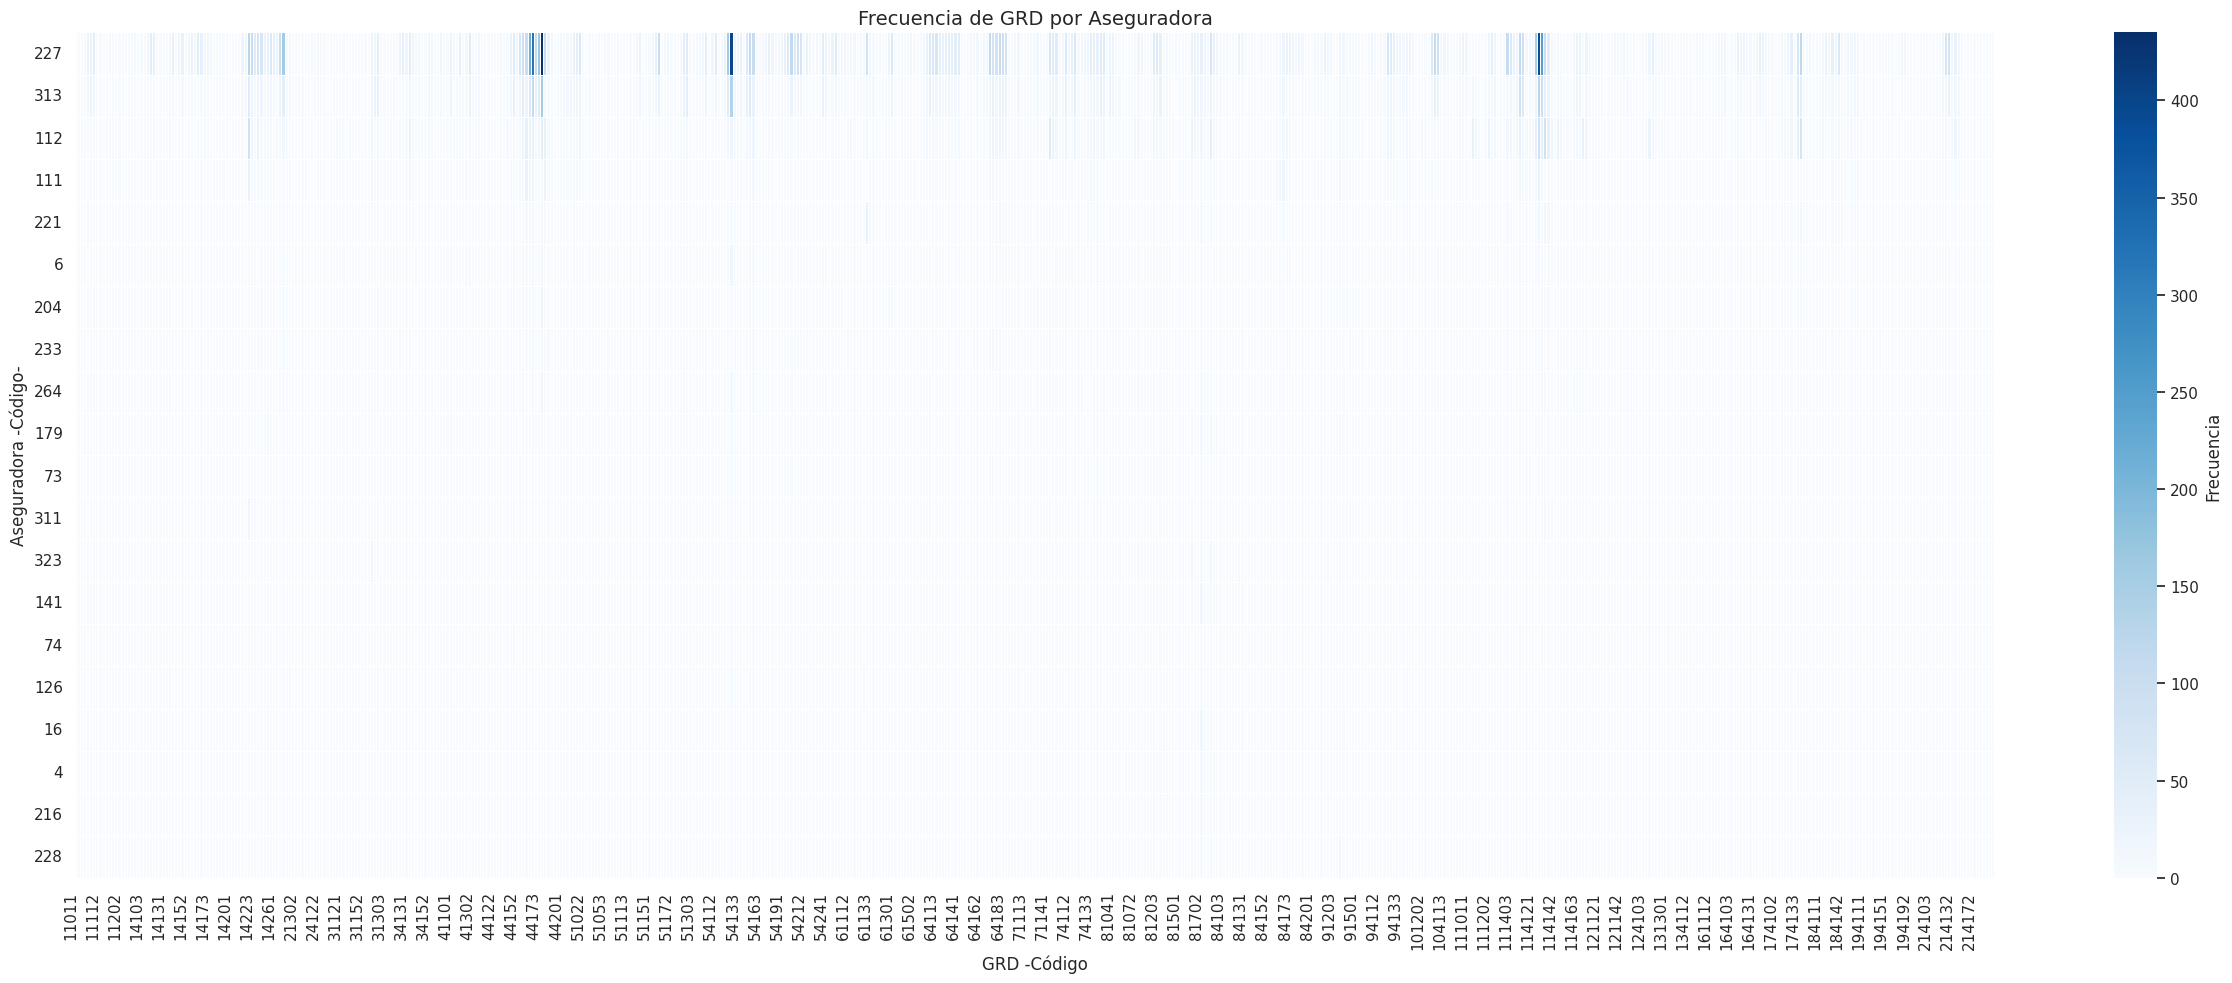

In [5]:
# Ver cuántos códigos y descripciones únicos hay
print(f"Códigos únicos: {df['Aseguradora -Código-'].nunique()}")
print(f"Descripciones únicas: {df['Aseguradora -Descripción-'].nunique()}")

# Verificar si hay valores nulos
print(f"Nulos en código: {df['Aseguradora -Código-'].isnull().sum()}")
print(f"Nulos en descripción: {df['Aseguradora -Descripción-'].isnull().sum()}")

# Crear tabla cruzada para explorar relación entre aseguradora y GRD
ase_gddr = pd.crosstab(df['Aseguradora -Código-'], df['GRD -Código'])

# Filtrar solo las 20 aseguradoras con más registros
top_aseguradoras = df['Aseguradora -Código-'].value_counts().head(20).index
ase_gddr = ase_gddr.loc[top_aseguradoras]

# Graficar heatmap para ver distribución
plt.figure(figsize=(25, 10))
sns.heatmap(ase_gddr, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Frecuencia de GRD por Aseguradora", fontsize=14)
plt.xlabel("GRD -Código")
plt.ylabel("Aseguradora -Código-")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Aseguradora -Código-" representa una codificación numérica de la entidad aseguradora y "Aseguradora -Descripción-" su nombre correspondiente. Ambas variables no presentan valores nulos, pero se observa una discrepancia en la cardinalidad: hay más descripciones únicas que códigos, lo cual indica una posible inconsistencia en la forma de registrar los nombres de aseguradoras, como variaciones ortográficas o duplicaciones semánticas. Aunque hay una diversidad moderada de códigos (62 únicos) y un número mayor de descripciones (71), el análisis gráfico entre GRD y aseguradora muestra una relación muy débil. Incluso para las aseguradoras más frecuentes, no se observa un patrón claro que indique una asociación útil para la predicción. Además, cualquier correlación observada puede estar más relacionada con la población atendida por la aseguradora que con causas clínicas subyacentes. Por estos motivos, y considerando además el riesgo de introducir ruido debido a inconsistencias en los nombres, esta variable se descartará del modelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Edad y Grupo de Edad: </strong></p>
    </div>

Valores únicos de Edad: 108
Valores únicos de Grupo Edad: 20
Valores nulos en Edad: 0
Valores nulos en Grupo Edad: 0


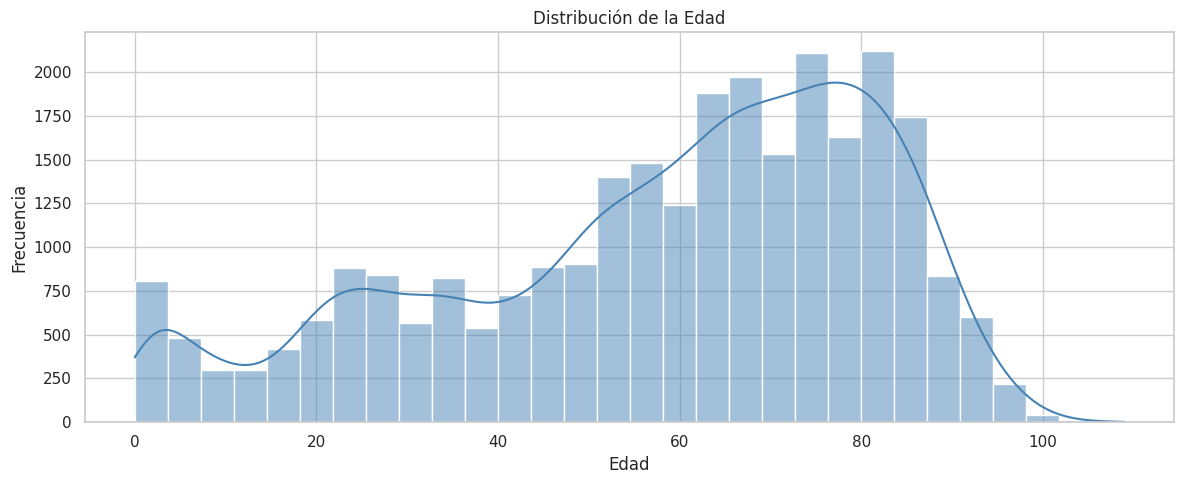


Promedio de edad por GRD:
GRD -Código
194192     4.000000
14201      8.000000
44181      8.802956
184141    11.636364
184101    12.500000
            ...    
54102     81.272727
224122    82.000000
54103     82.142857
44111     85.000000
121153    91.000000
Name: Edad, Length: 608, dtype: float64


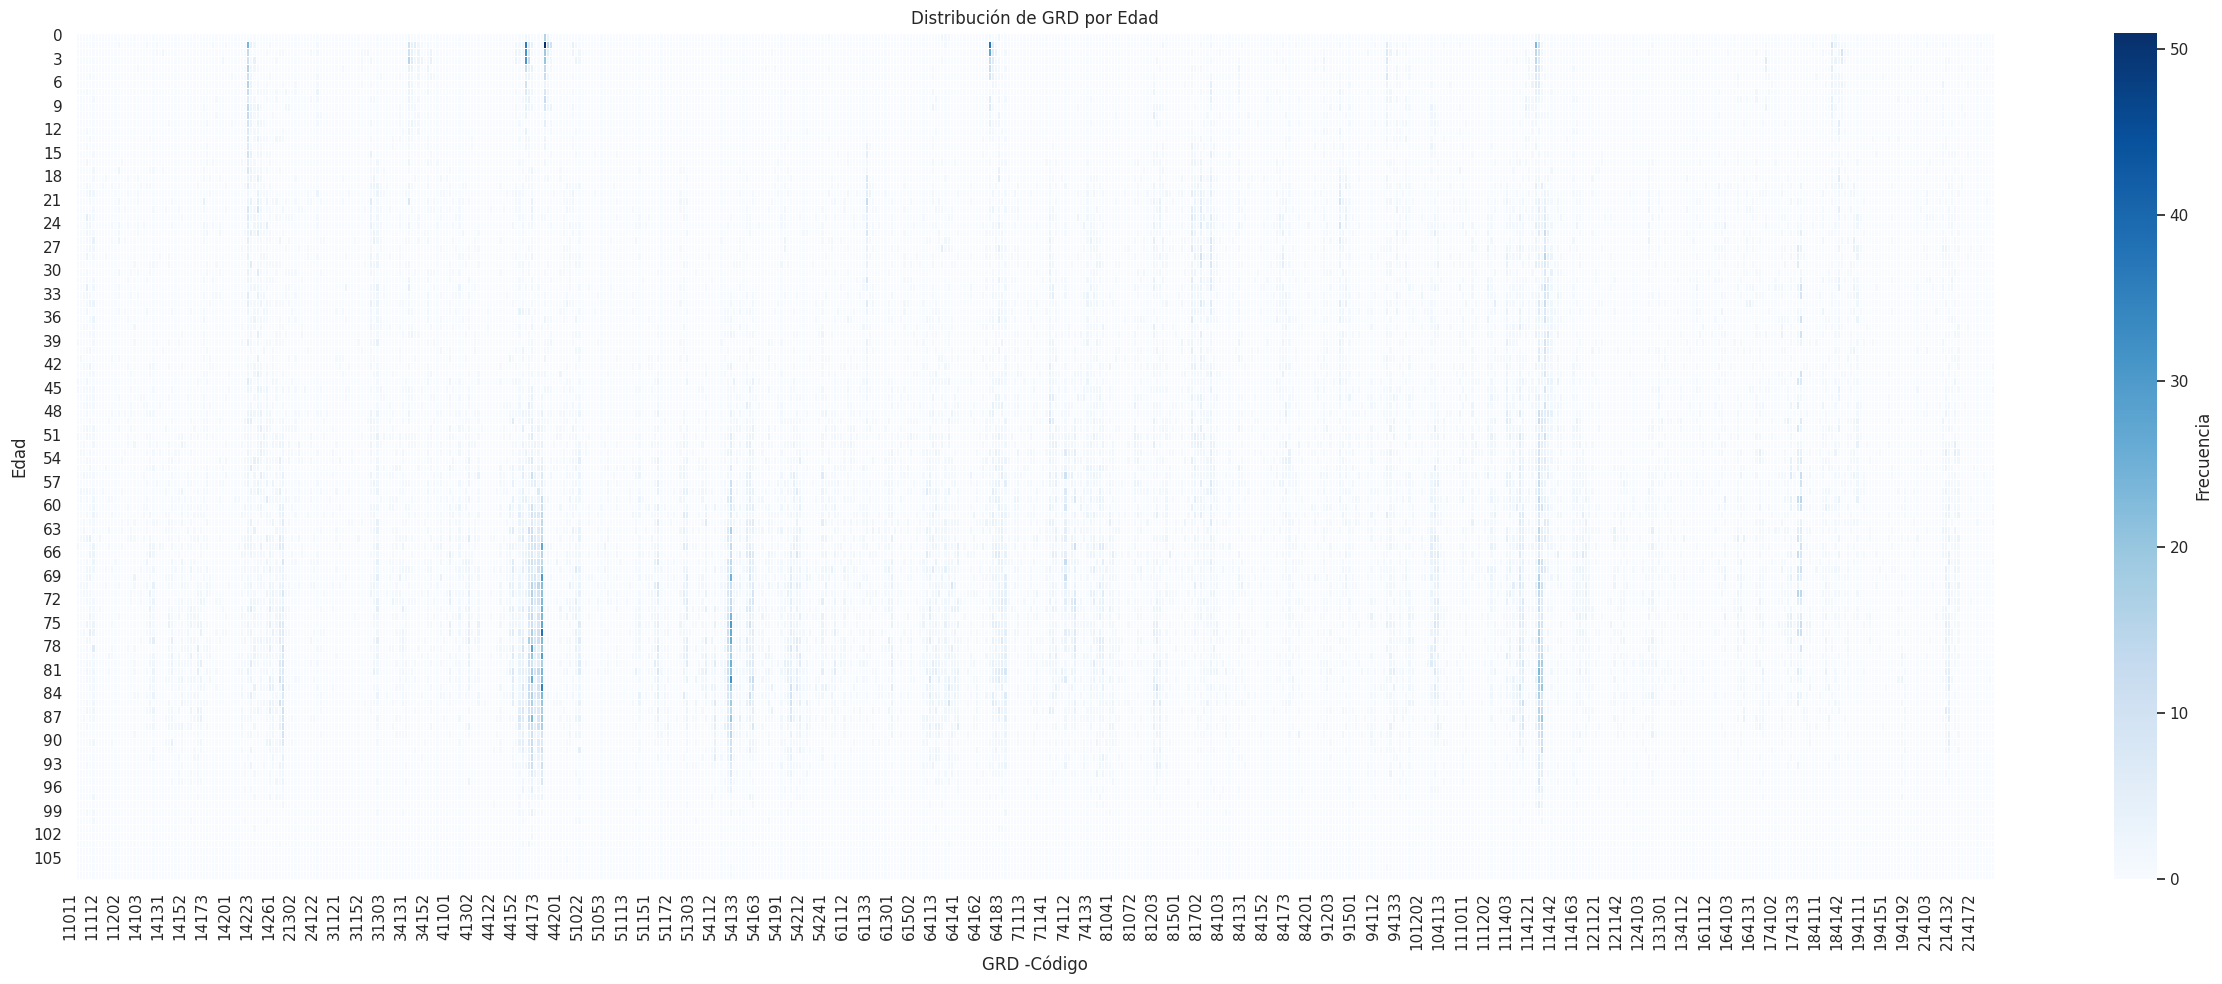

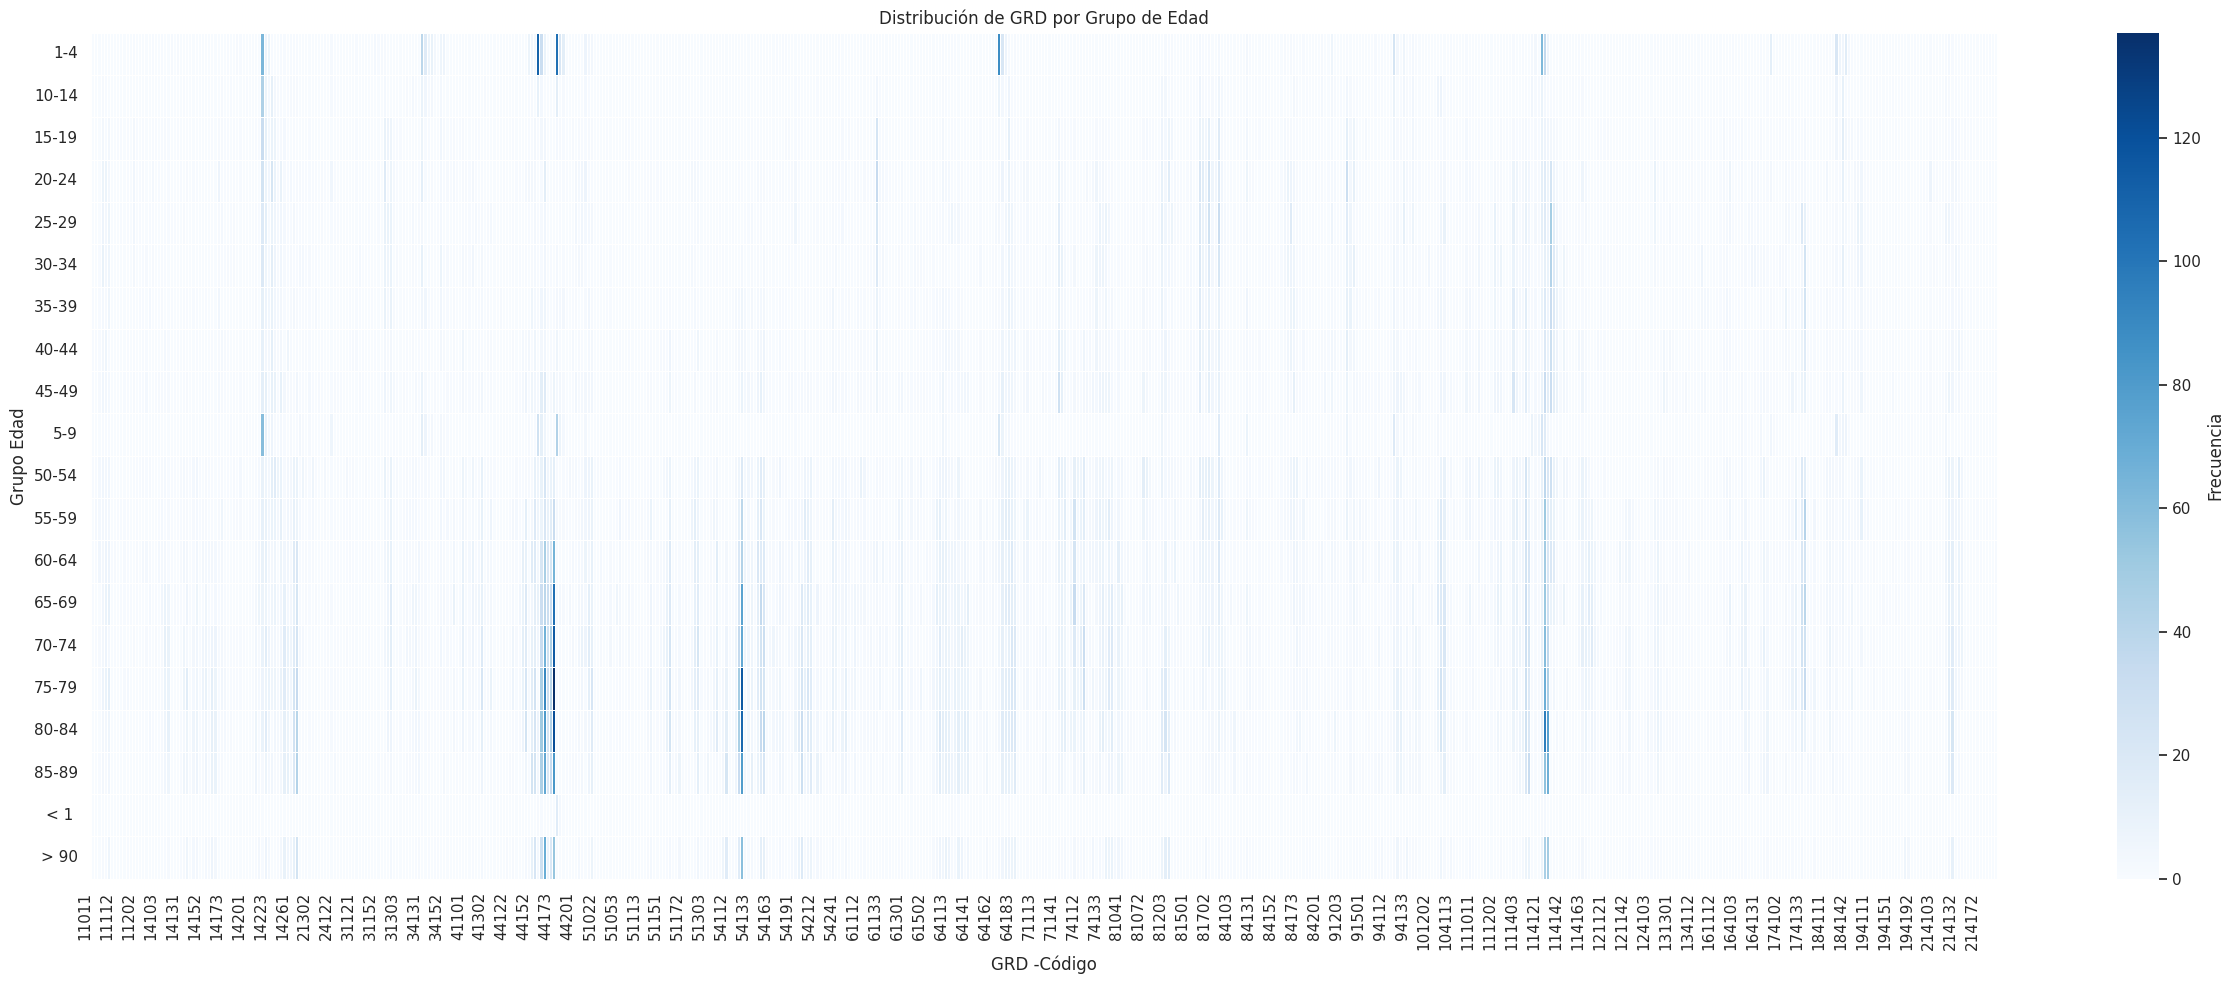


Chi² = 85402.74, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Edad y GRD.

Chi² = 32068.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.


In [6]:
# Ver cuántos valores únicos hay en Edad y en Grupo Edad
print(f"Valores únicos de Edad: {df['Edad'].nunique()}")
print(f"Valores únicos de Grupo Edad: {df['Grupo Edad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en Edad: {df['Edad'].isnull().sum()}")
print(f"Valores nulos en Grupo Edad: {df['Grupo Edad'].isnull().sum()}")

# Histograma de distribución de edades
plt.figure(figsize=(12, 5))
sns.histplot(df['Edad'], bins=30, kde=True, color='steelblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Agrupar por GRD y calcular la edad promedio
edad_promedio_grd = df.groupby('GRD -Código')['Edad'].mean().sort_values()
print(f"\nPromedio de edad por GRD:\n{edad_promedio_grd}")

# Crear tablas cruzadas para Edad y Grupo Edad vs GRD
edad_grd = pd.crosstab(df['Edad'], df['GRD -Código'])
grupo_grd = pd.crosstab(df['Grupo Edad'], df['GRD -Código'])

# Heatmap Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(edad_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Heatmap Grupo Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(grupo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Grupo de Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Grupo Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de contingencia para Edad
chi2, p, dof, expected = chi2_contingency(edad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Prueba de contingencia para Grupo Edad
chi2, p, dof, expected = chi2_contingency(grupo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Edad" es continua y numérica, sin valores nulos, con 108 valores distintos que abarcan todo el espectro etario. Su versión categorizada, "Grupo Edad", cuenta con 20 grupos definidos (quinquenales), también sin valores faltantes. Ambas variables muestran una distribución esperada, con una mayor concentración en adultos y adultos mayores. Al relacionarlas con el GRD, se observan asociaciones claras: algunos grupos de edad se vinculan con diagnósticos específicos, lo cual es coherente desde el punto de vista clínico. Los gráficos de calor y los promedios de edad por GRD refuerzan esta relación. "Grupo Edad", al ser categórica, puede facilitar la interpretación y ser más estable frente a pequeñas fluctuaciones, mientras que "Edad" permite una resolución más fina. Se considera que la variable "Grupo Edad" es más relevante para el módelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Sexo: </strong></p>
    </div>

Valores únicos de Sexo: ['F' 'M']
Valores nulos de Sexo: 0

Frecuencia por categoría:
Sexo
M    14355
F    13514
Name: count, dtype: int64


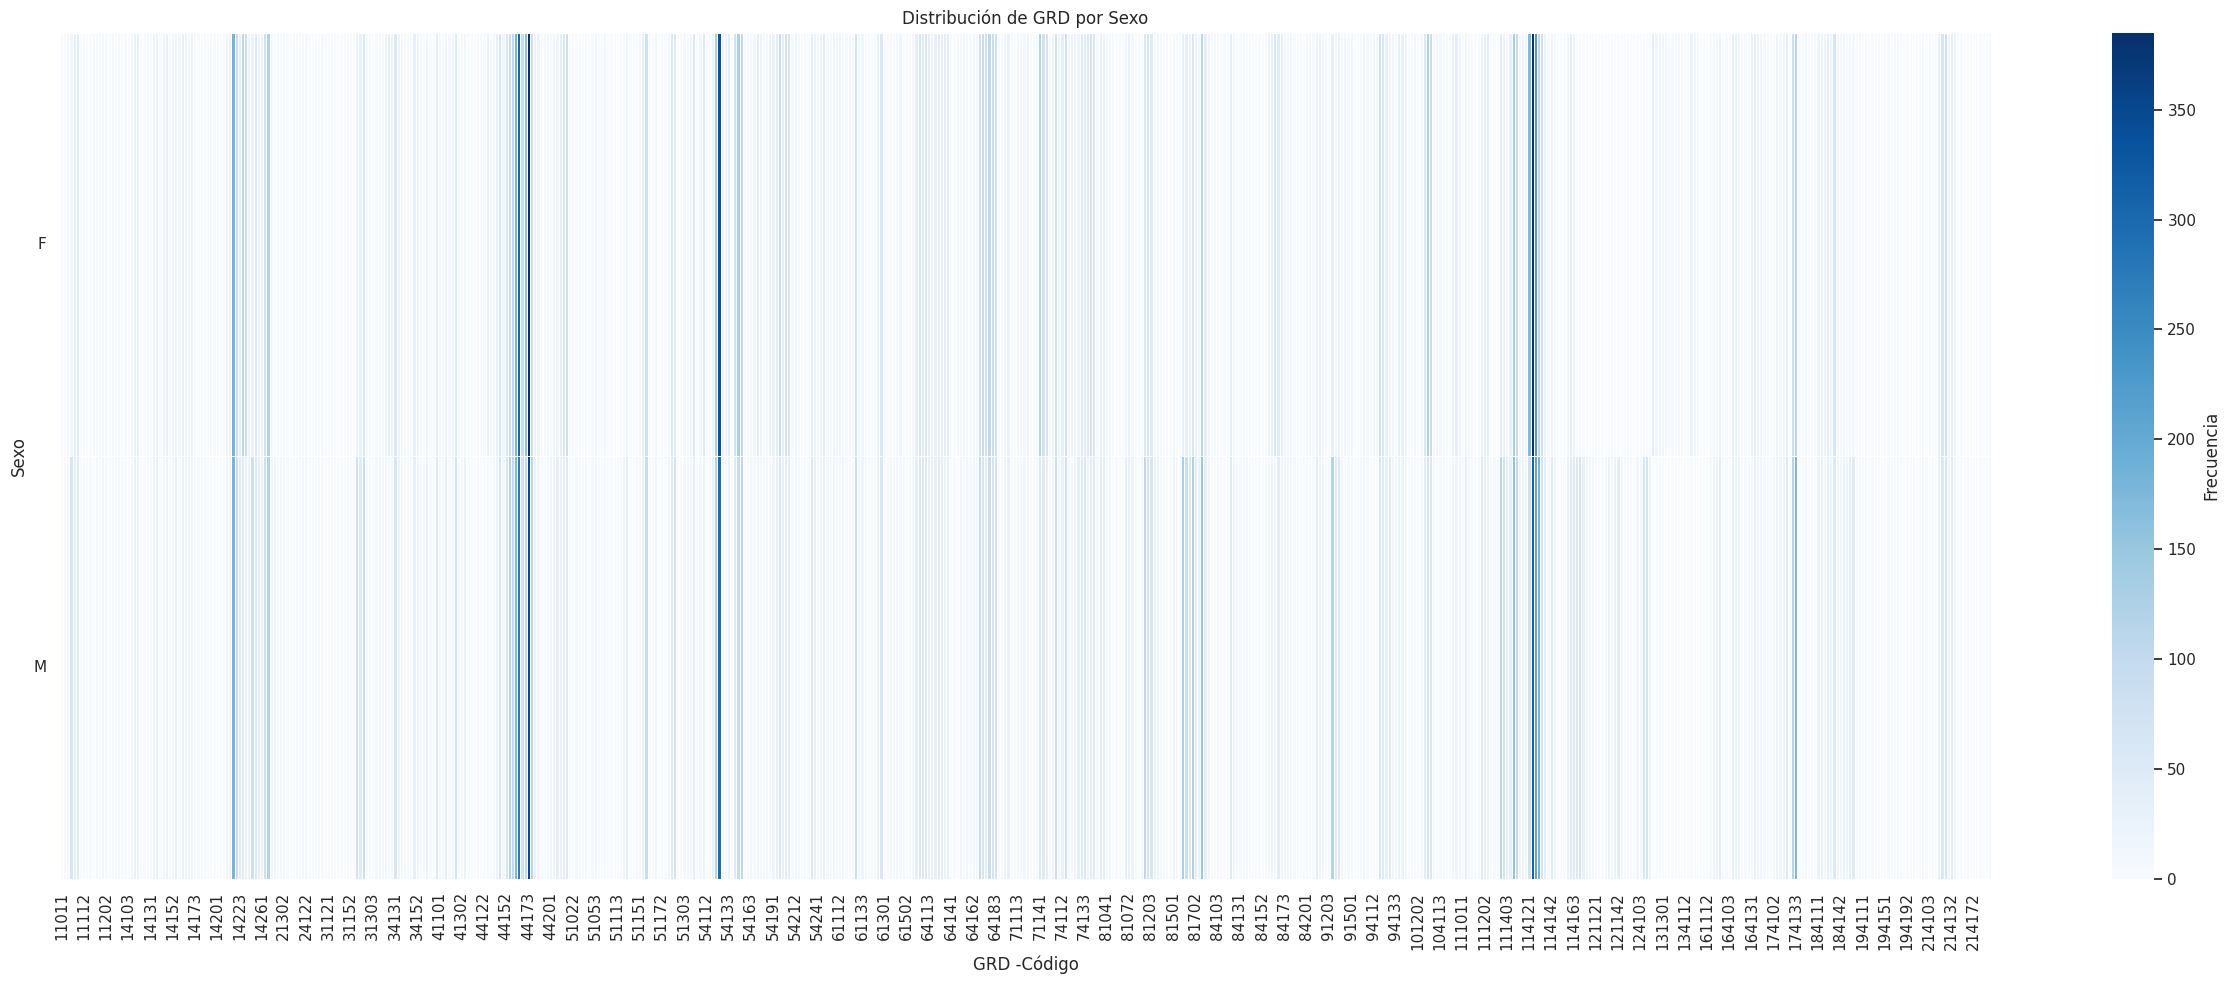


Chi² = 2417.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Sexo y GRD.


In [7]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Sexo'] = df['Sexo'].str.upper()

# Ver valores únicos y nulos
print(f"Valores únicos de Sexo: {df['Sexo'].unique()}")
print(f"Valores nulos de Sexo: {df['Sexo'].isnull().sum()}")

# Frecuencia por categoría
print("\nFrecuencia por categoría:")
print(df['Sexo'].value_counts())

# Crear tabla cruzada Sexo vs GRD
sexo_grd = pd.crosstab(df['Sexo'], df['GRD -Código'])

# Heatmap de la relación
plt.figure(figsize=(25, 10))
sns.heatmap(sexo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Sexo")
plt.xlabel("GRD -Código")
plt.ylabel("Sexo")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, expected = chi2_contingency(sexo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Sexo y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Sexo" está codificada con solo dos categorías ('M' y 'F') y no presenta valores nulos. Tras estandarizar el texto, se confirma su integridad. El análisis de frecuencias muestra una distribución relativamente balanceada entre hombres y mujeres, lo cual es positivo para el modelo. La tabla cruzada y el mapa de calor evidencian diferencias sutiles en la frecuencia de ciertos GRD según el sexo. La prueba de chi-cuadrado arroja un p-value < 0.05, lo que indica una asociación estadísticamente significativa entre el sexo del paciente y el grupo relacionado por diagnóstico. Esta variable es categórica binaria, simple de codificar y relevante, por lo que se mantendrá en el modelo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Código de ciudad: </strong></p>
    </div>

Valores únicos en 'Código de ciudad': 208
Valores nulos en 'Código de ciudad': 0

Top 5 ciudades más frecuentes:
Codigo de ciudad
5001    18236
5088     1424
5360      687
5266      614
5212      454
Name: count, dtype: int64


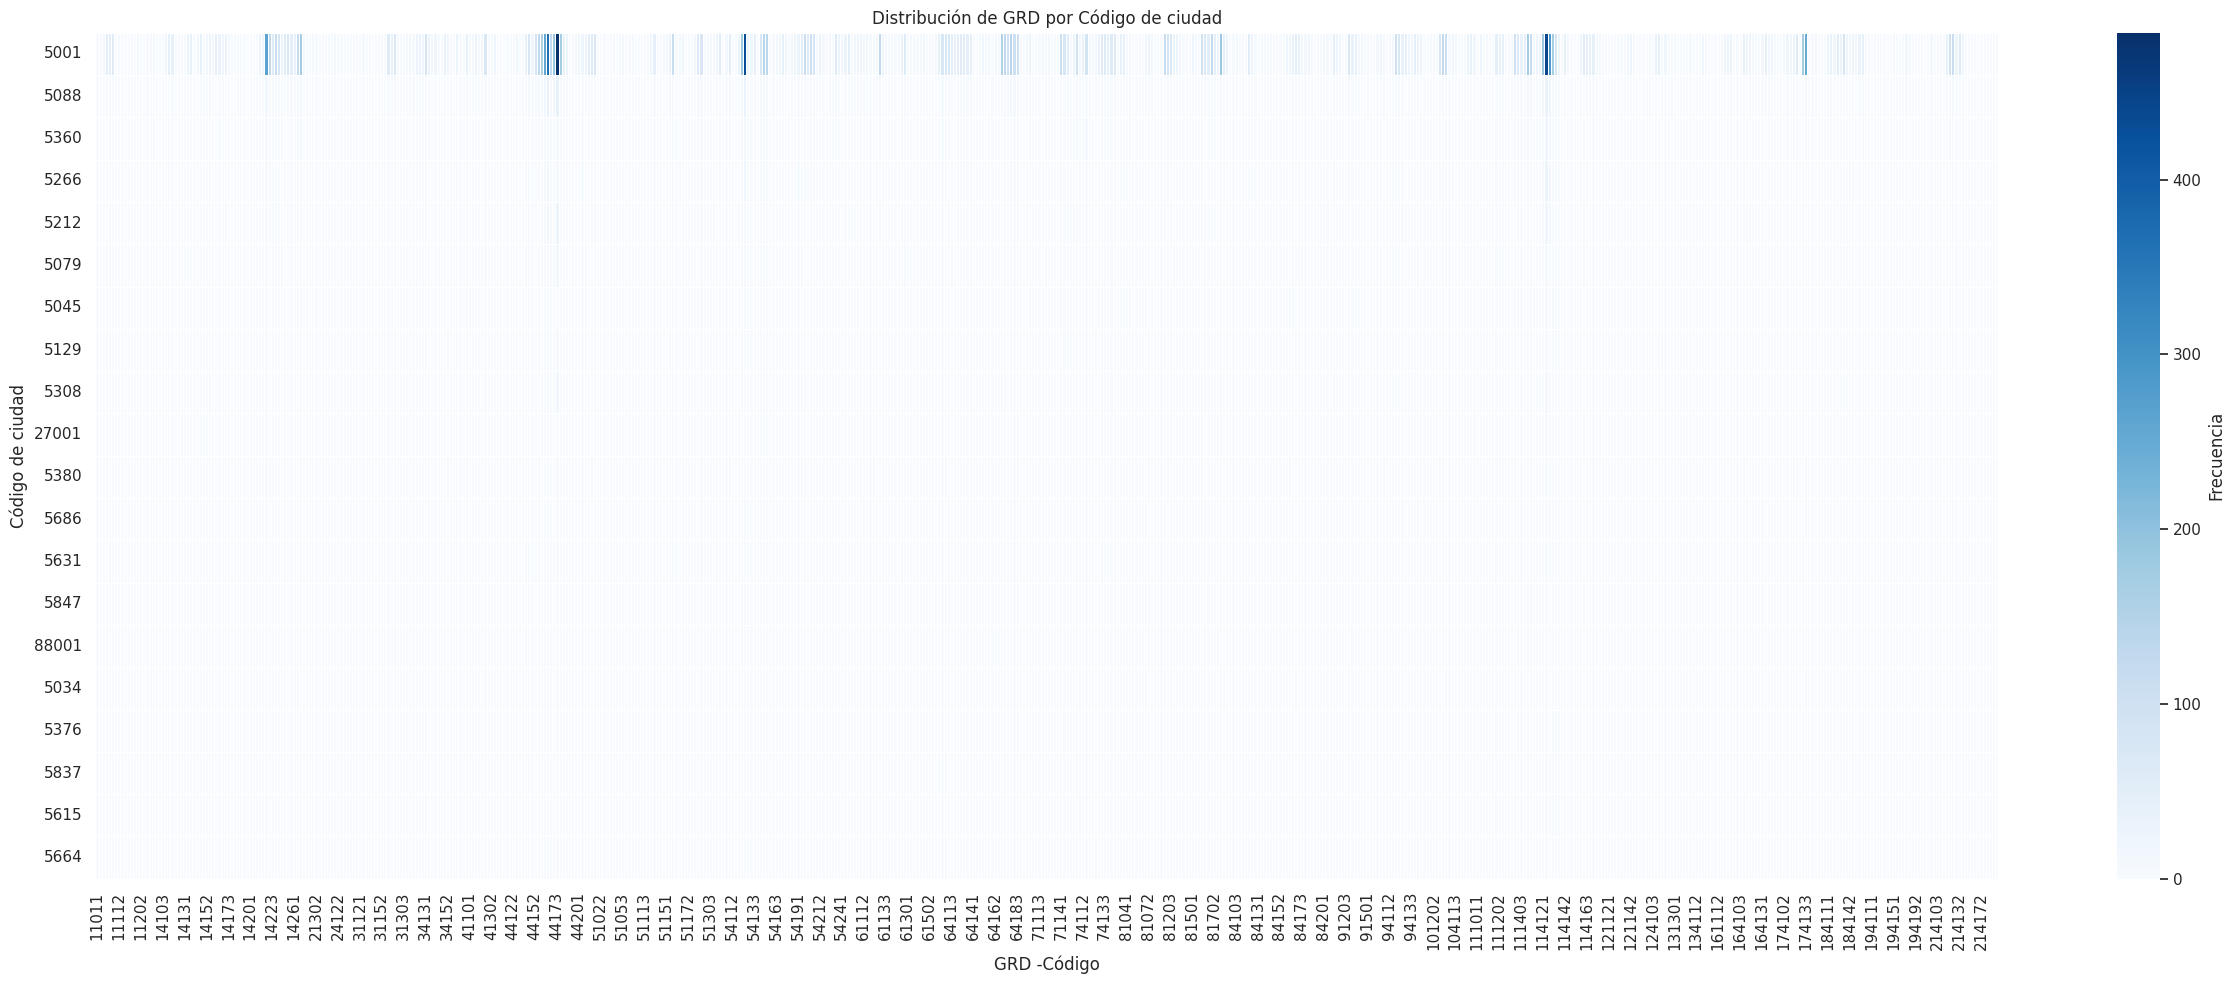


Chi² = 154240.11, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre ciudad y GRD.


In [8]:
# Ver cuántos valores únicos hay en 'Código de ciudad'
print(f"Valores únicos en 'Código de ciudad': {df['Codigo de ciudad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en 'Código de ciudad': {df['Codigo de ciudad'].isnull().sum()}")

# Ver top 5 ciudades más frecuentes
print("\nTop 5 ciudades más frecuentes:")
print(df['Codigo de ciudad'].value_counts().head())

# Tabla cruzada Código ciudad vs GRD
ciudad_grd = pd.crosstab(df['Codigo de ciudad'], df['GRD -Código'])

# Reducir a las 20 ciudades más frecuentes para visualización
top_ciudades = df['Codigo de ciudad'].value_counts().head(20).index
ciudad_grd_top = ciudad_grd.loc[top_ciudades]

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ciudad_grd_top, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Código de ciudad")
plt.xlabel("GRD -Código")
plt.ylabel("Código de ciudad")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, _ = chi2_contingency(ciudad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre ciudad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Código de ciudad" no presenta valores nulos y contiene 208 valores únicos, lo cual implica una alta cardinalidad. Aunque se pueden identificar algunas ciudades con alta frecuencia como Medellín (código 5001), muchas otras tienen pocos registros, lo que introduce una gran cantidad de categorías poco representativas. El análisis visual mediante heatmap centrado en las 20 ciudades más frecuentes muestra diferencias leves entre ciudades otras ciudades a parte de Medellín, por lo que el comportamiento general es difuso. A pesar de que la prueba de chi-cuadrado muestra una relación estadísticamente significativa entre el código de ciudad y el GRD, la utilidad práctica de esta variable está desbalanceada: su significado es más geográfico-administrativo que clínico, y su alta dimensionalidad introduce complejidad sin aportar una interpretación clara. Por estos motivos, y considerando además el riesgo de introducir ruido esta variable se descartará del modelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Fecha de ingreso: </strong></p>
    </div>


Distribución de ingresos por mes:
Enero         2600
Febrero       2245
Marzo         2373
Abril         2294
Mayo          2339
Junio         2341
Julio         2389
Agosto        2299
Septiembre    2458
Octubre       2326
Noviembre     1981
Diciembre     2063
Name: count, dtype: int64


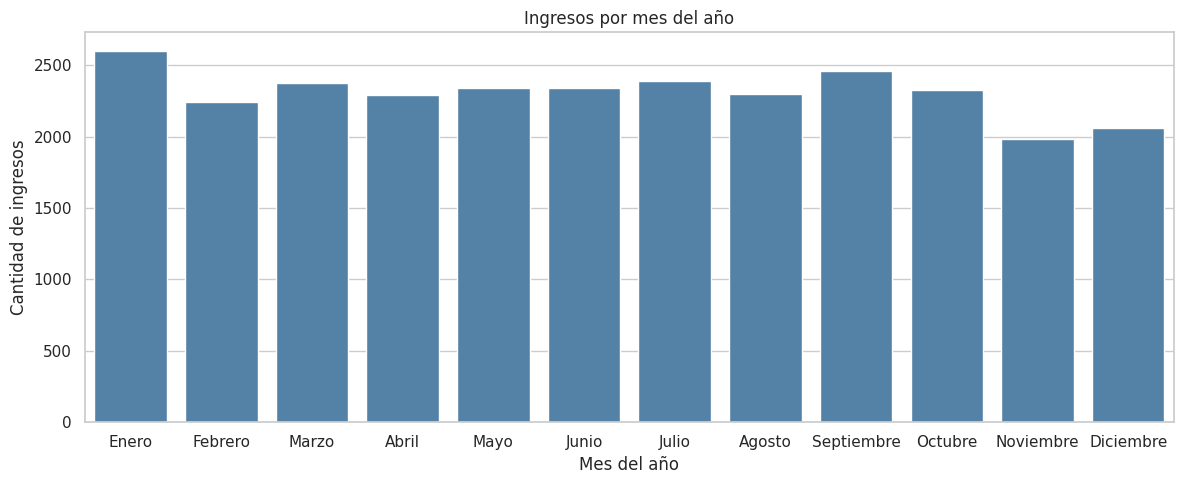


Distribución de ingresos por día de la semana:
Lunes        3487
Martes       3102
Miércoles    4239
Jueves       4184
Viernes      4206
Sábado       4354
Domingo      4136
Name: count, dtype: int64


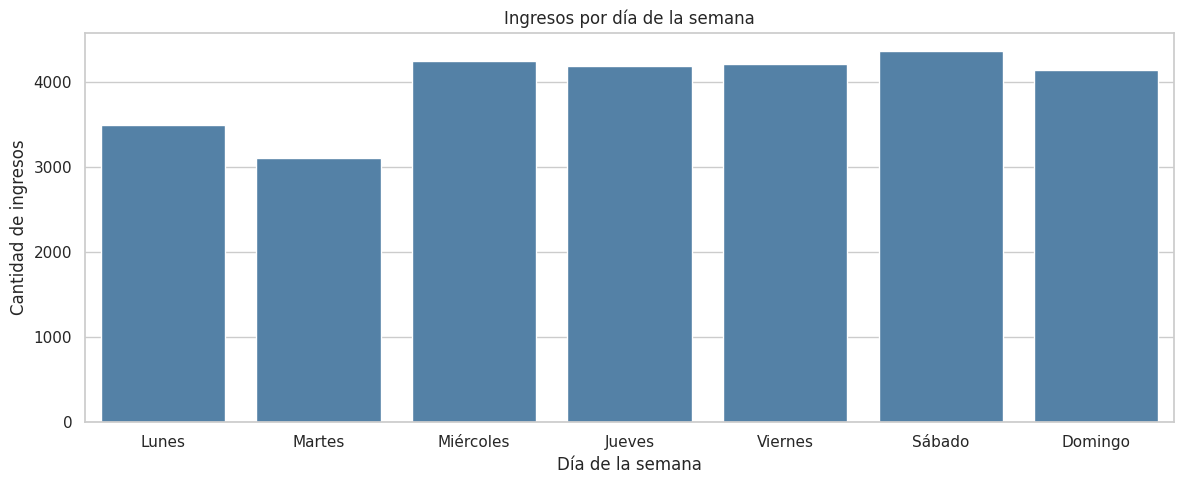

In [9]:
# Convertir la columna a datetime con formato específico
fecha_temp = pd.to_datetime(df['Fecha de ingreso'], format='%d%m%Y', errors='coerce')

# Extraer mes y día de la semana
df['Mes ingreso'] = fecha_temp.dt.month
df['Día semana ingreso'] = fecha_temp.dt.dayofweek

# Distribución por mes
meses = df['Mes ingreso'].value_counts().sort_index()
# Nombres de los meses
nombre_mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
              "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
# Asegurar indices enteros
meses.index = meses.index.astype(int)
meses.index = [nombre_mes[i - 1] for i in meses.index]

print("\nDistribución de ingresos por mes:")
print(meses)

plt.figure(figsize=(12,5))
sns.barplot(x=meses.index, y=meses.values, color='steelblue')
plt.title("Ingresos por mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

# Distribución por día de la semana
dias = df['Día semana ingreso'].value_counts().sort_index()
nombre_dia = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
# Asegurar indices enteros
dias.index = dias.index.astype(int)
dias.index = [nombre_dia[i] for i in dias.index]

print("\nDistribución de ingresos por día de la semana:")
print(dias)

plt.figure(figsize=(12,5))
sns.barplot(x=dias.index, y=dias.values, color='steelblue')
plt.title("Ingresos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Fecha de ingreso" fue convertida exitosamente al formato datetime, permitiendo extraer componentes temporales como el mes del año y el día de la semana. Aunque no hay valores nulos explícitos, la utilidad clínica de esta variable es cuestionable: la distribución de ingresos por mes y por día de la semana es bastante homogénea, sin picos evidentes que indiquen estacionalidad médica clara. El análisis cruzado con GRD muestra diferencias mínimas. En términos prácticos, la variable introduce más ruido que señal y no aporta una base fisiopatológica para mejorar la predicción. Por tanto, se excluirá del modelo.
</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Tipo de ingreso: </strong></p>
    </div>

Valores únicos de Tipo de ingreso: ['URGENCIA' 'PROGRAMADO']
Valores nulos de Tipo de ingreso: 0

Frecuencia por categoría: Tipo de ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64


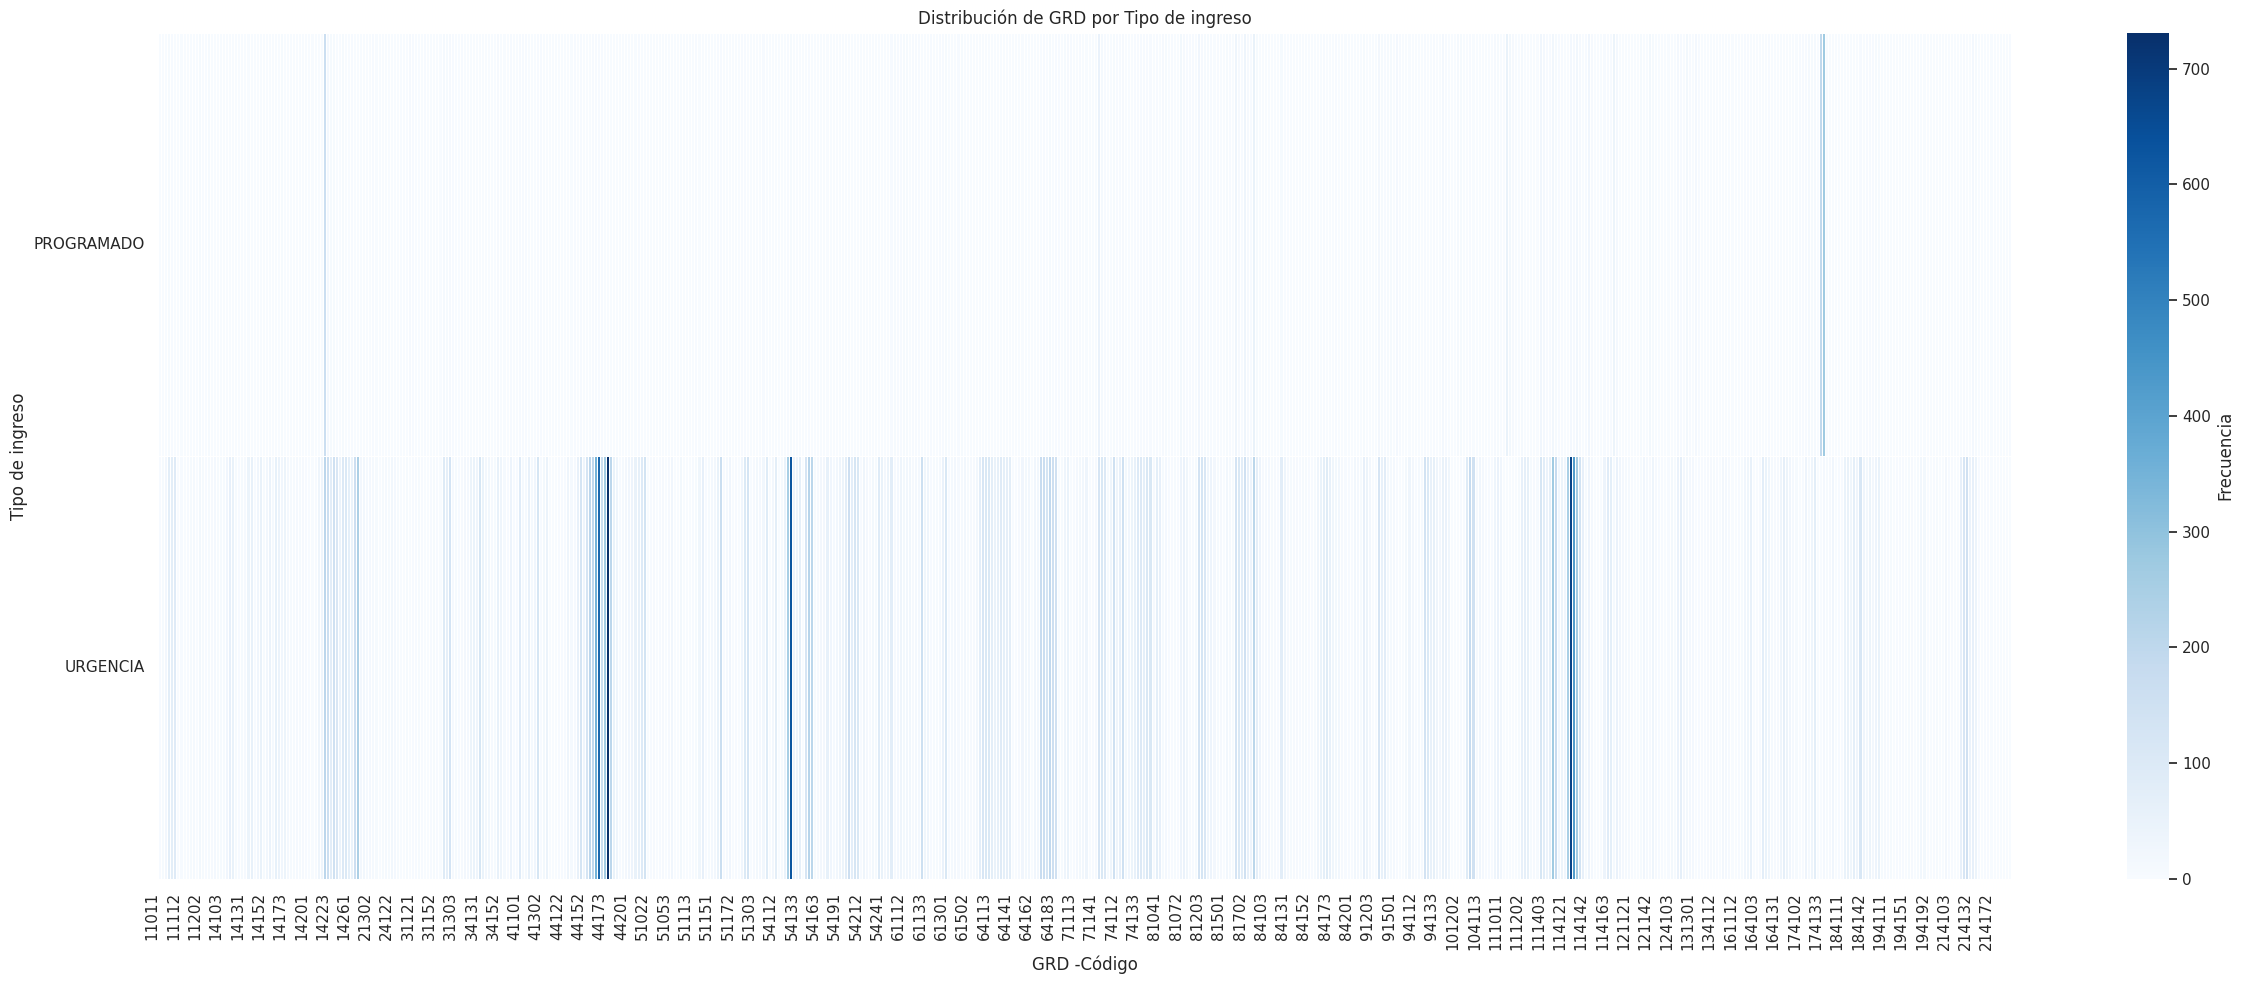


Chi² = 10381.03, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.


In [10]:
# Normalizar texto: quitar espacios, convertir a mayúsculas
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.strip().str.upper()

# Unificar variantes comunes (por si acaso)
df['Tipo de ingreso'] = df['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo de ingreso: {df['Tipo de ingreso'].unique()}")
print(f"Valores nulos de Tipo de ingreso: {df['Tipo de ingreso'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia por categoría: {df['Tipo de ingreso'].value_counts()}")

# Tabla cruzada Tipo de ingreso vs GRD
ingreso_grd = pd.crosstab(df['Tipo de ingreso'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ingreso_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de ingreso")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de ingreso")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
chi2, p, dof, _ = chi2_contingency(ingreso_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Tipo de ingreso" presenta dos categorías claramente diferenciadas: "URGENCIA" y "PROGRAMADO", sin valores nulos y con formato homogéneo tras la normalización. Aunque hay un fuerte desbalance (más del 90% de los ingresos son por urgencia), los resultados del análisis gráfico y la prueba estadística muestran que el tipo de ingreso sí tiene una asociación significativa con el GRD. En particular, ciertos diagnósticos se concentran más en ingresos de urgencia, lo cual tiene sentido clínico (por ejemplo, traumas, eventos cardiovasculares agudos o infecciones graves). A pesar del desbalance, esta variable es informativa y relevante. Se conservará como categórica binaria en el modelo, ya que su aporte es claro tanto estadística como clínicamente.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Diagnostico de ingreso: </strong></p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Diagnostico de ingreso" es un etiquetado relacionado a la visita anterior del paciente, frente a la visita actual estudiada, por ello, se debe descartar del módelo al estar poco relacionada sin tener la información previa identificada.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variables Diagnósticos relacionados y/o comorbilidades de ingreso: </strong></p>
    </div>

Comorbilidades normalizadas : ['Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4', 'Dxr 5', 'Dxr 6', 'Dxr 7', 'Dxr 8', 'Dxr 9', 'Dxr 10']

Cantidad de diagnósticos registrados en cada columna:
Dxr 1     27172
Dxr 2     24714
Dxr 3     21529
Dxr 4     17983
Dxr 5     14451
Dxr 6     11163
Dxr 7      8161
Dxr 8      5610
Dxr 9      3435
Dxr 10        1
dtype: int64

Top 35 comorbilidades más frecuentes (con al menos el 10% de la más frecuente):
I10     7463
Z720    3315
E038    2759
I270    2728
I120    2115
E106    2080
D648    2009
E116    1827
J448    1792
E876    1660
N390    1615
D728    1562
G448    1537
I48     1504
R104    1499
E755    1488
I110    1278
E788    1220
J441    1208
J90     1153
B962    1116
E668    1096
I251    1034
I081    1034
D508     936
J980     895
I083     838
K296     811
E871     809
E878     807
N40      792
I132     768
R509     753
F058     741
J960     727
Name: count, dtype: int64


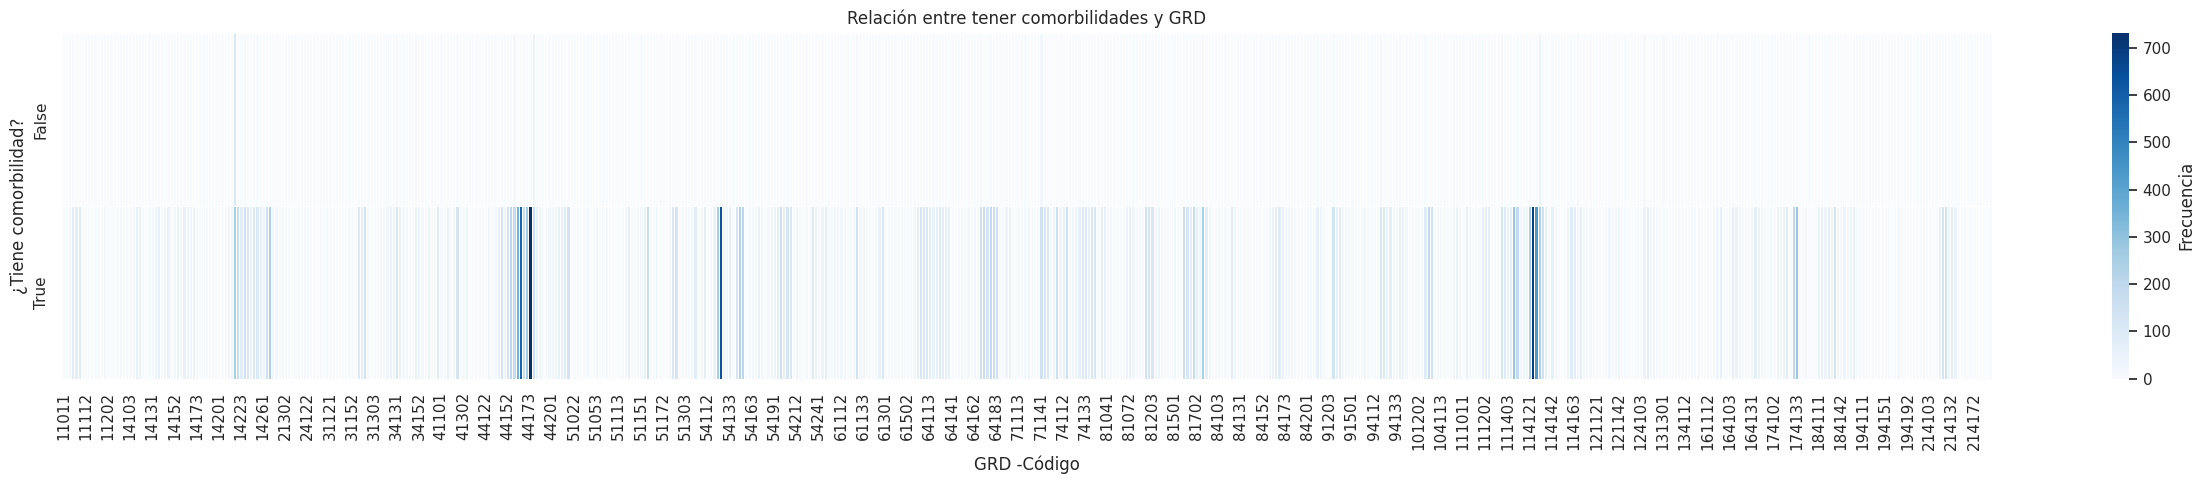


Chi² = 4269.45, p-value = 0.0000
→ Hay una asociación significativa entre tener comorbilidades y el GRD.


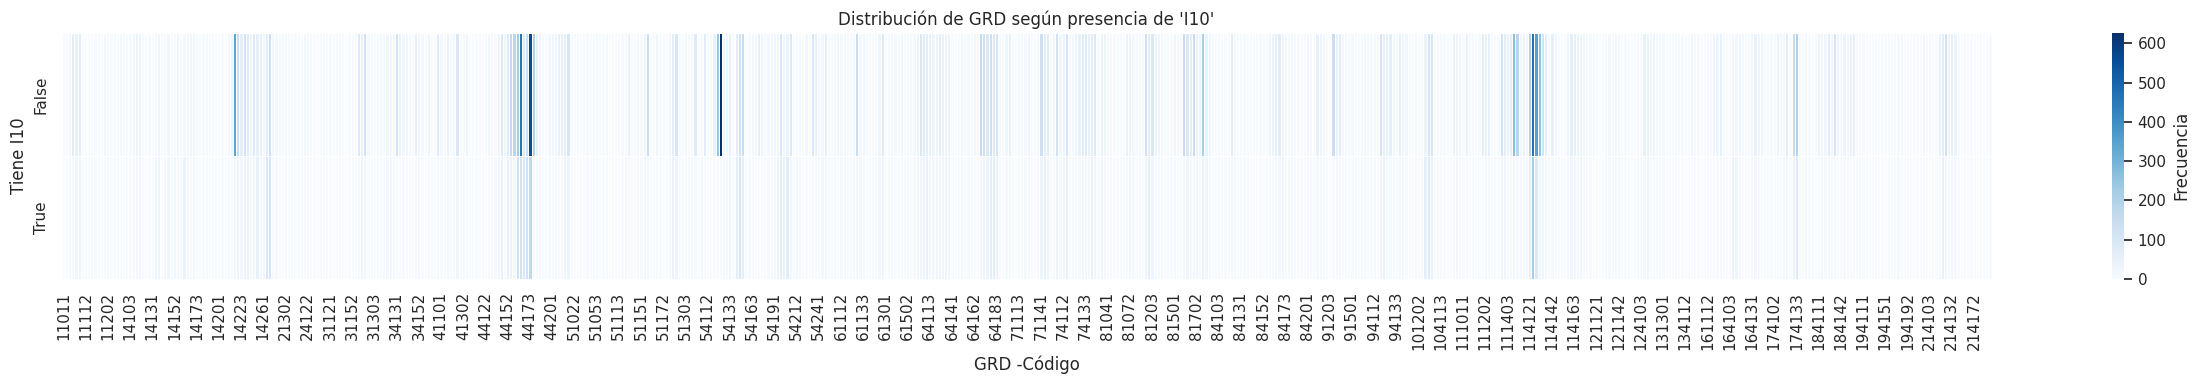

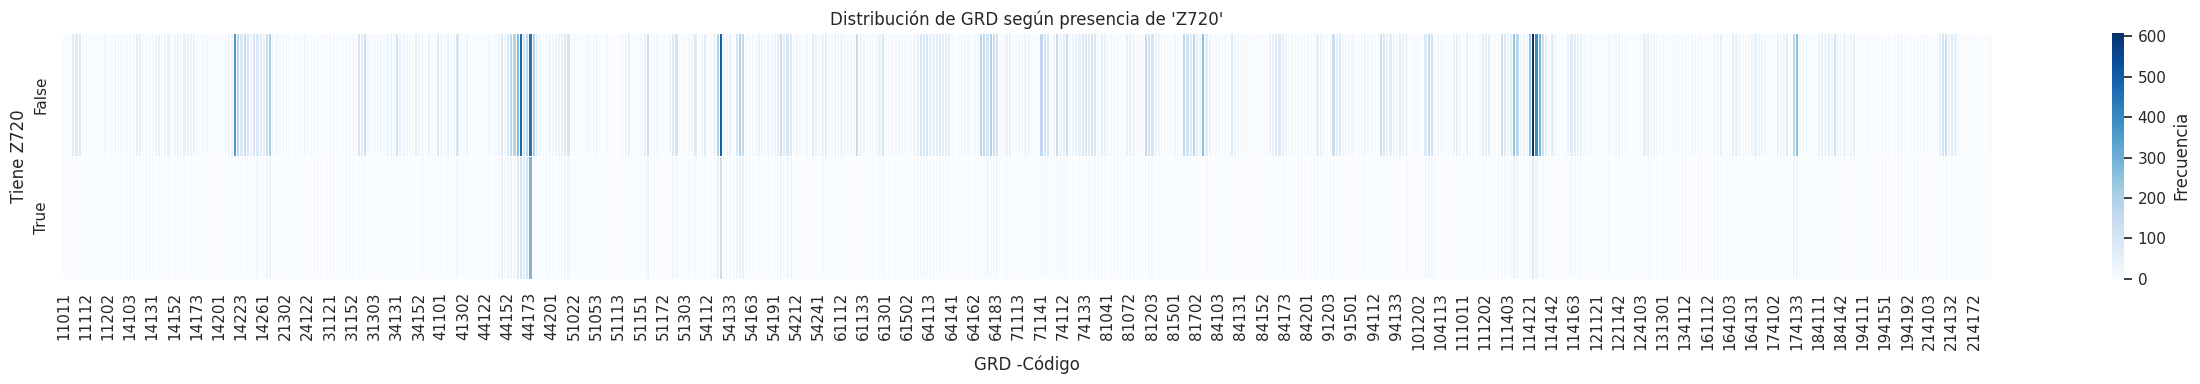

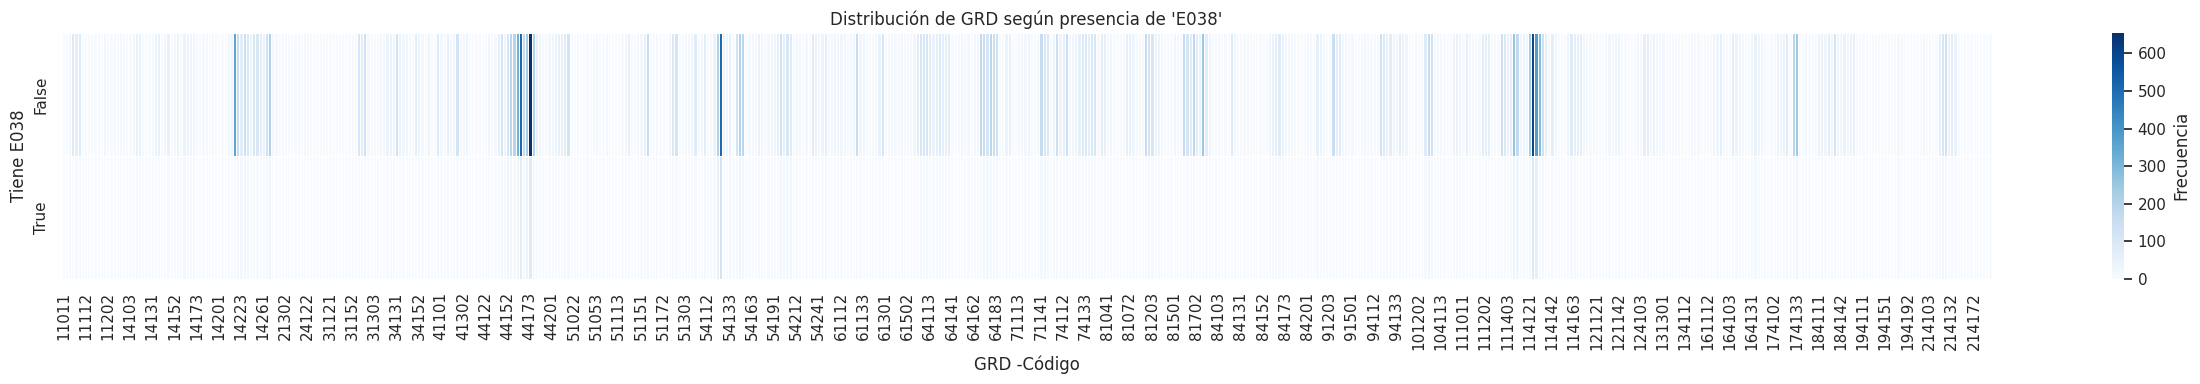

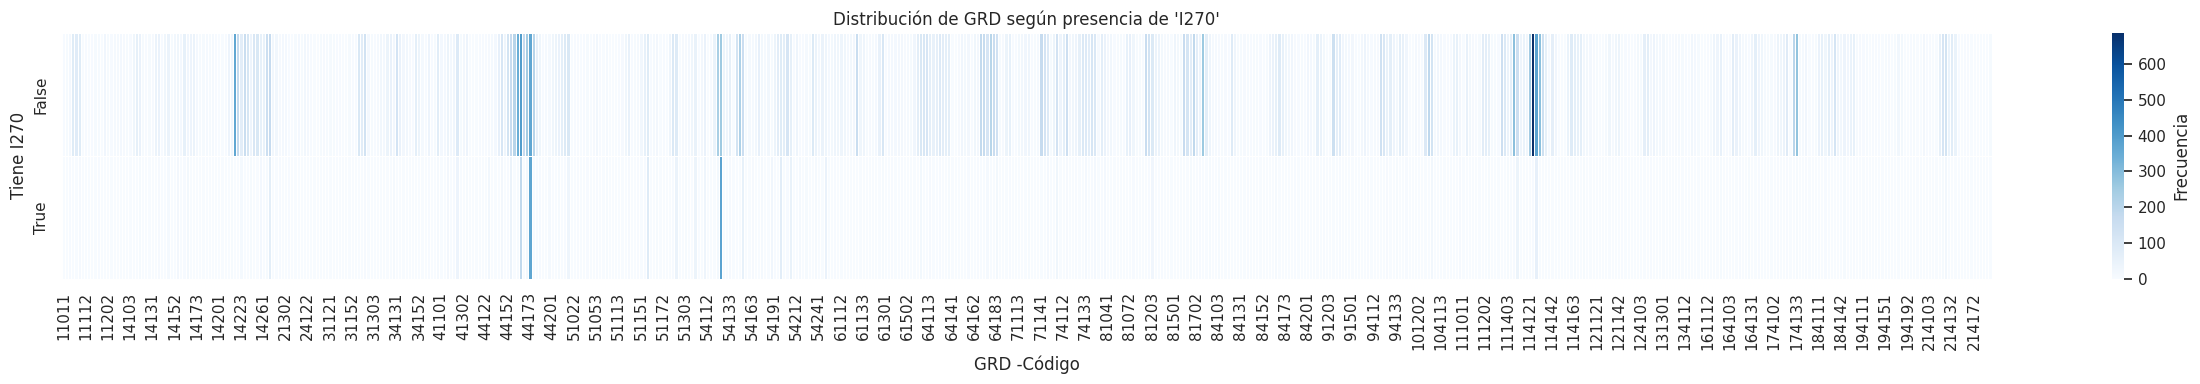

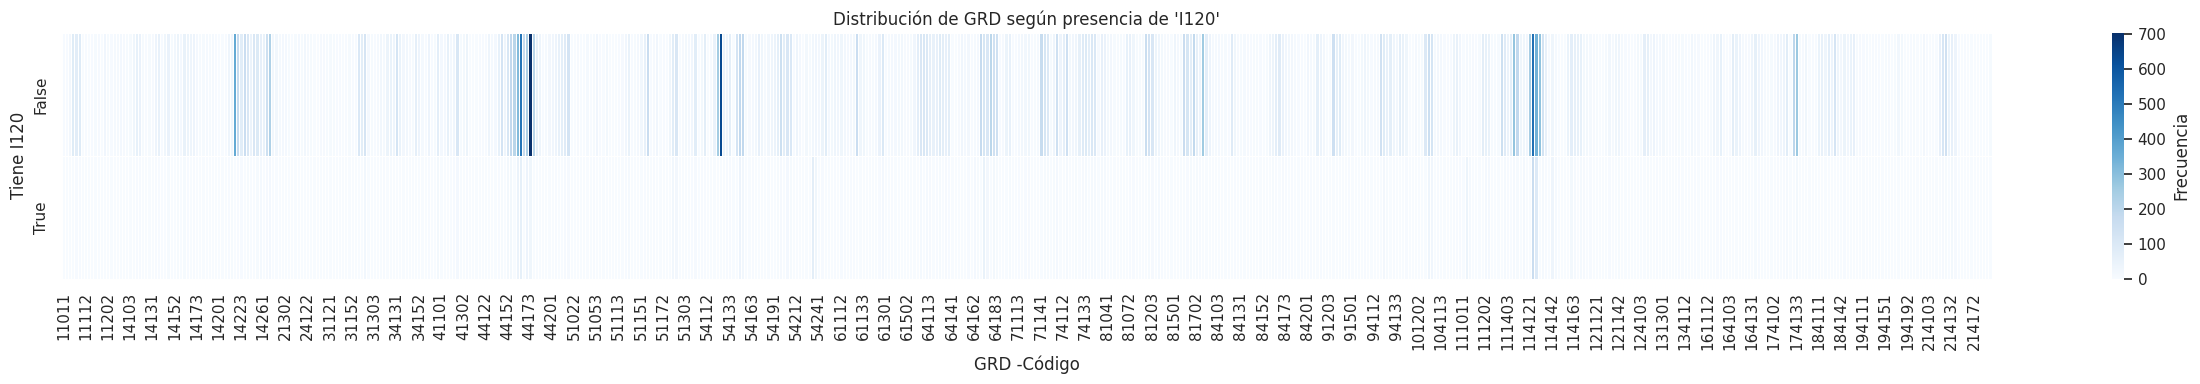

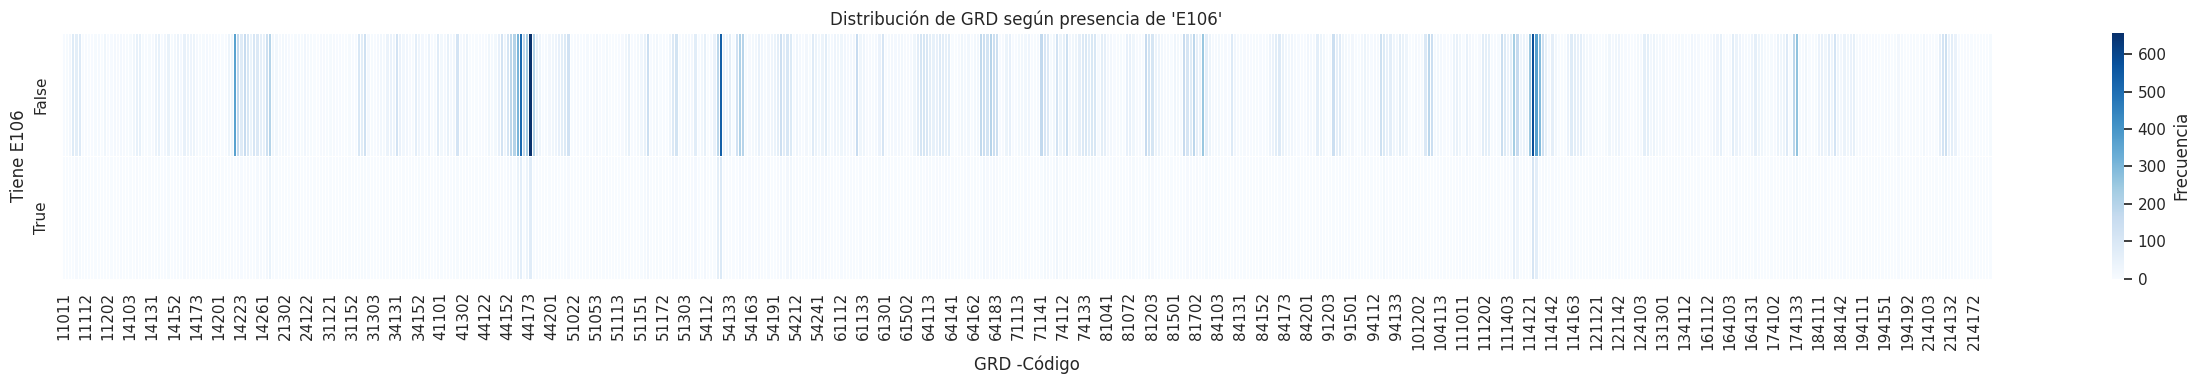

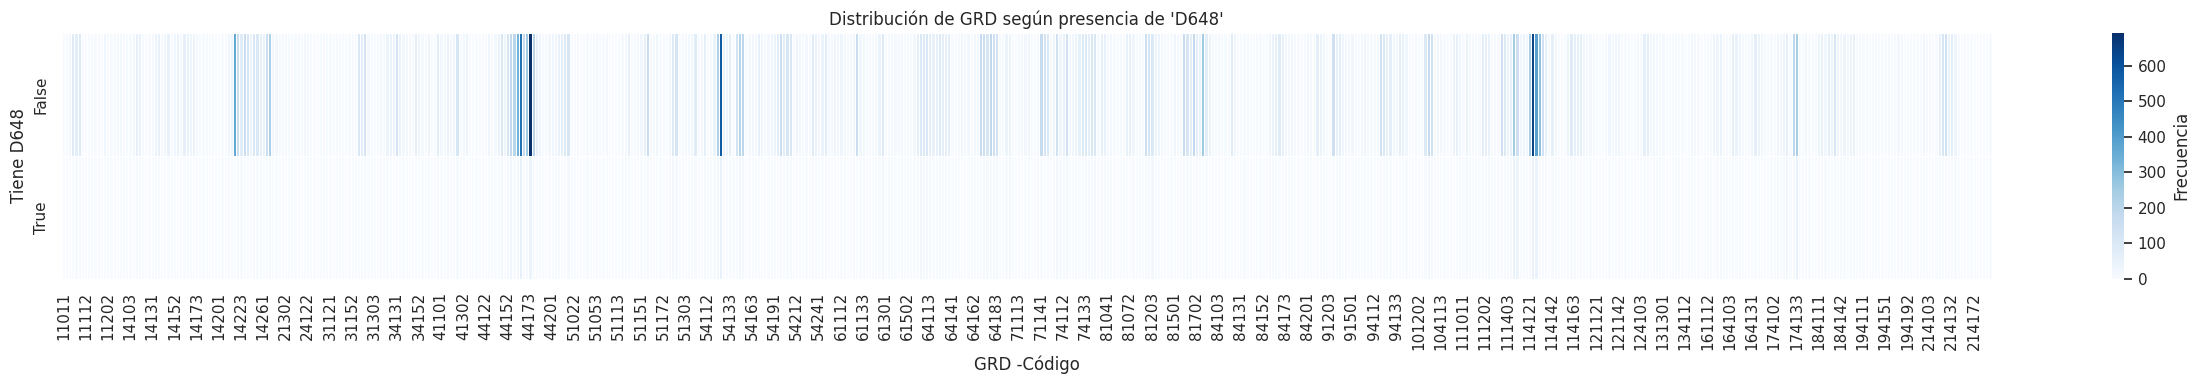

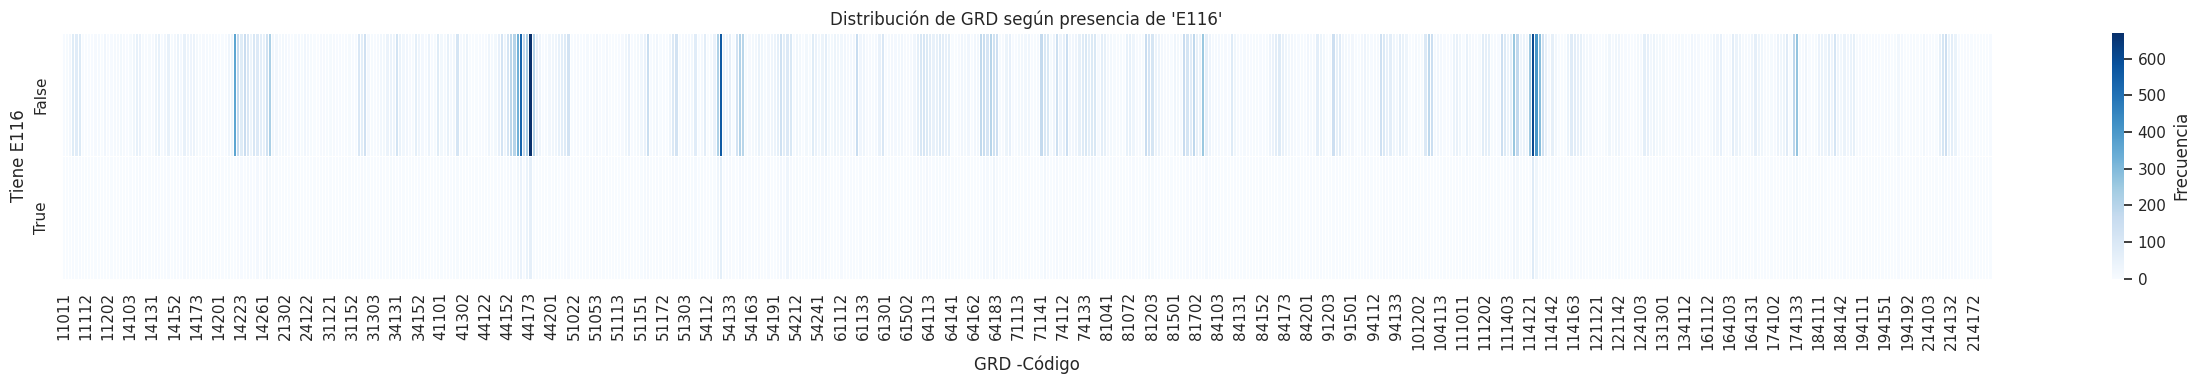

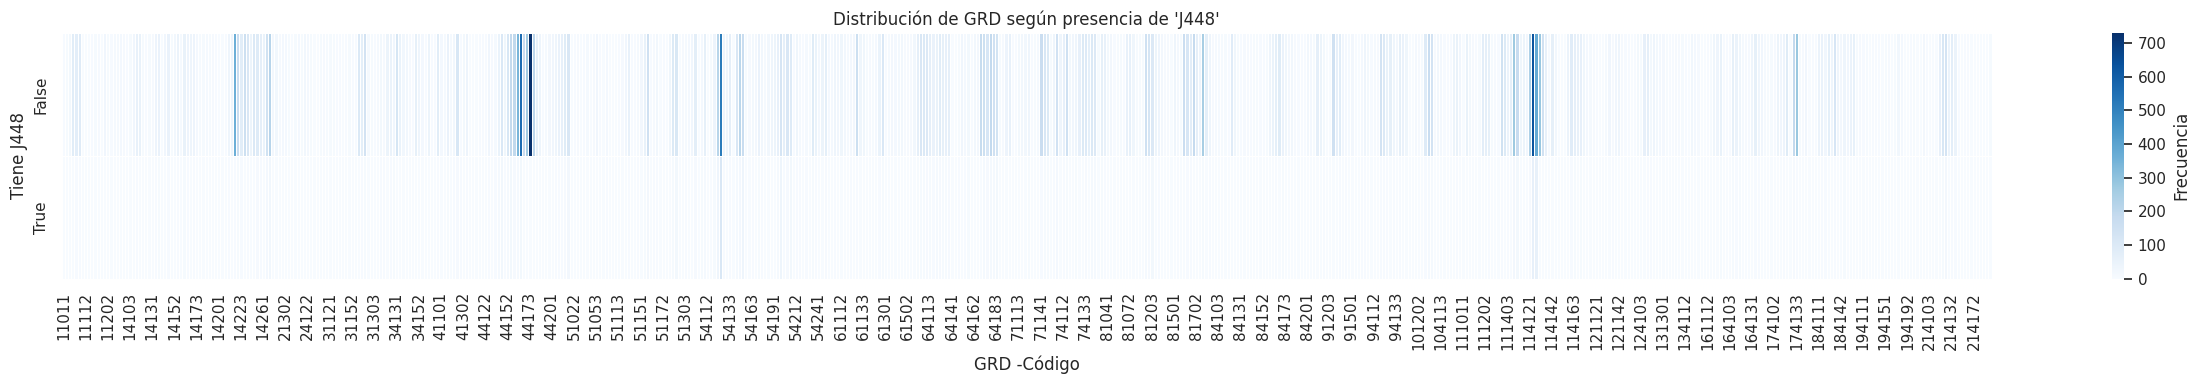

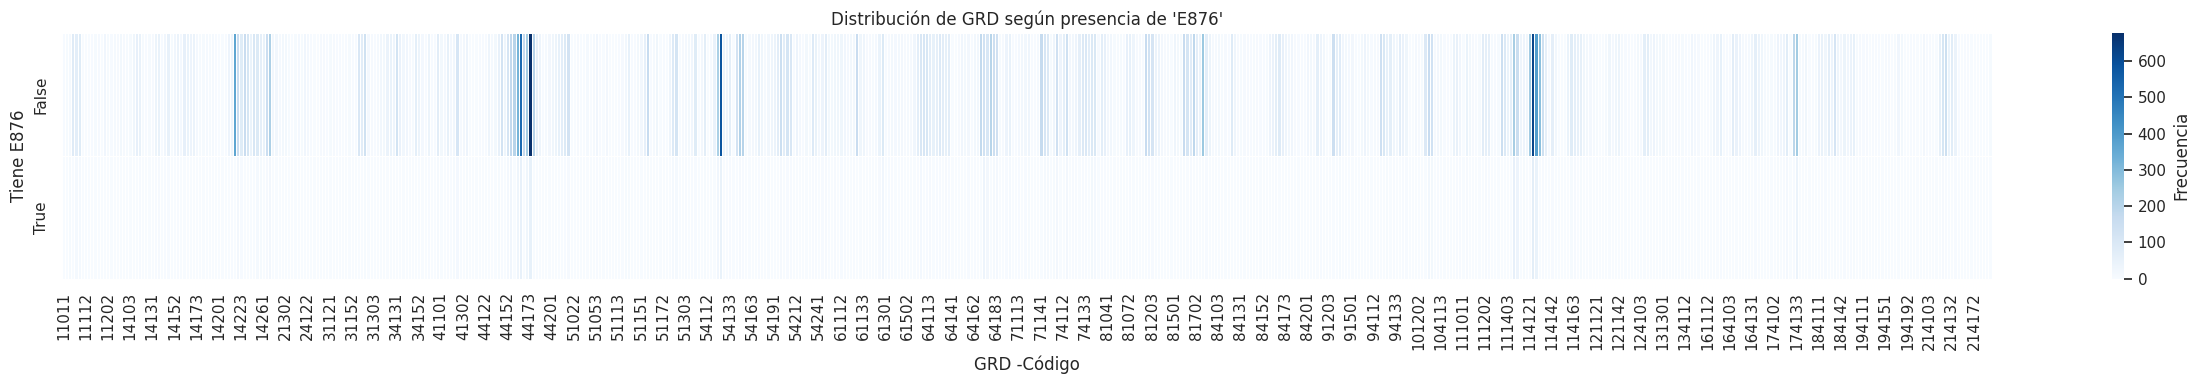

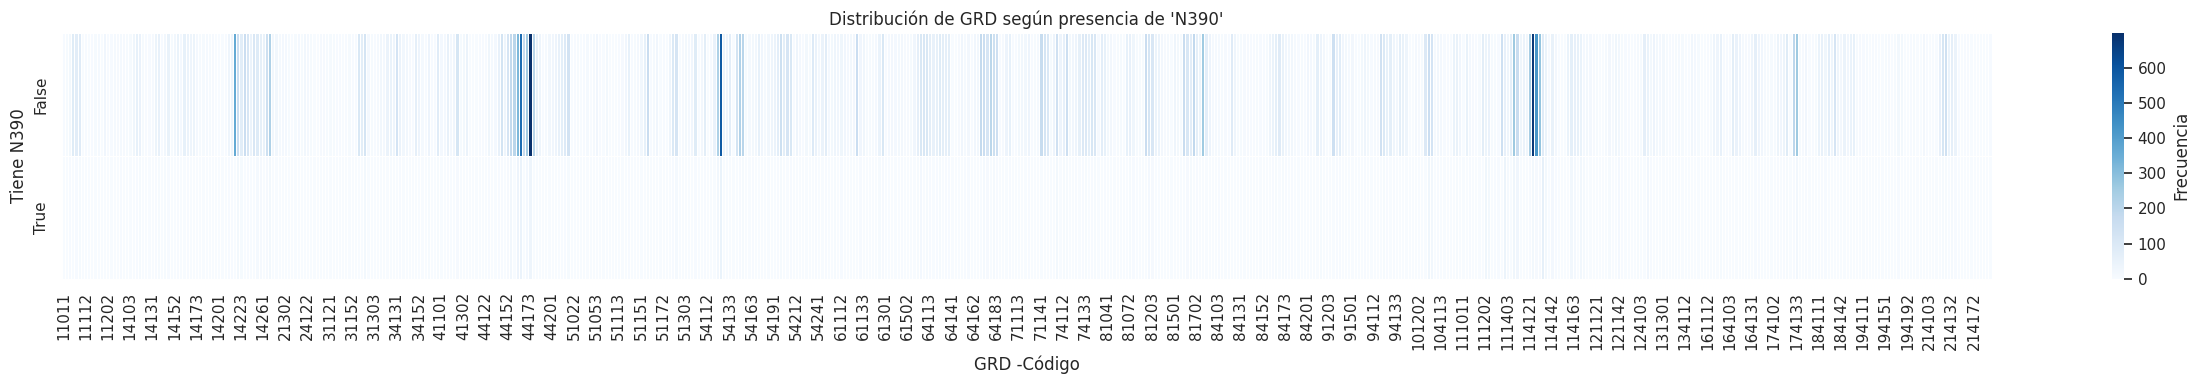

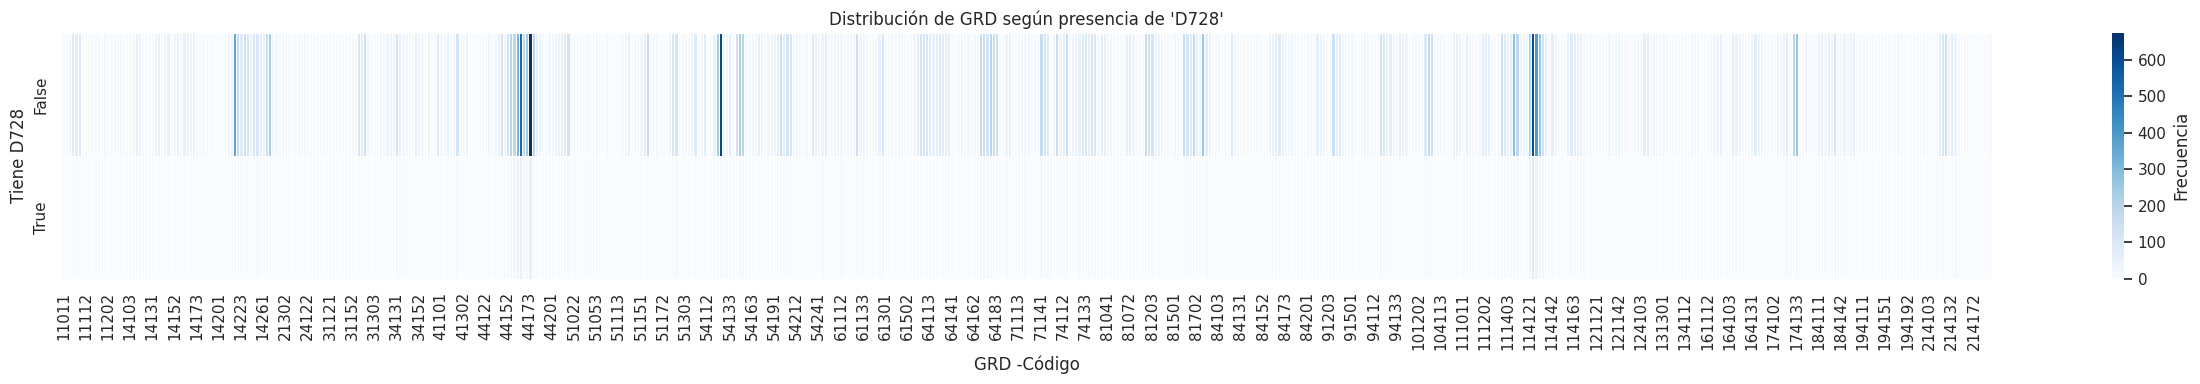

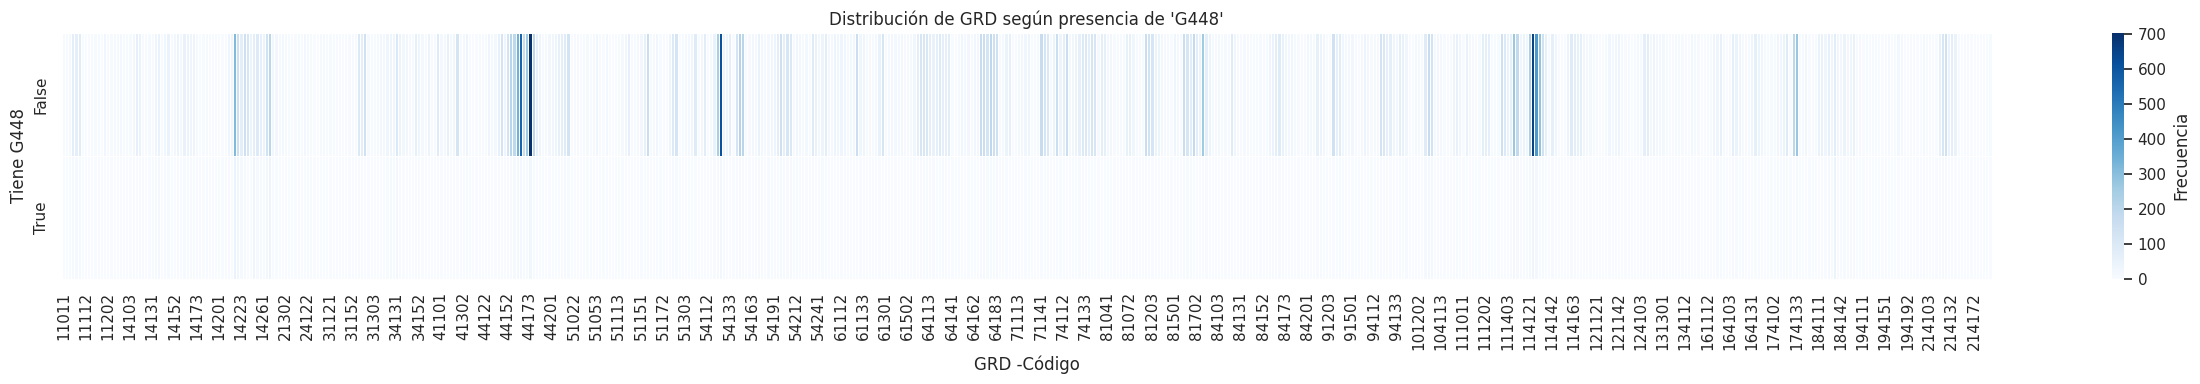

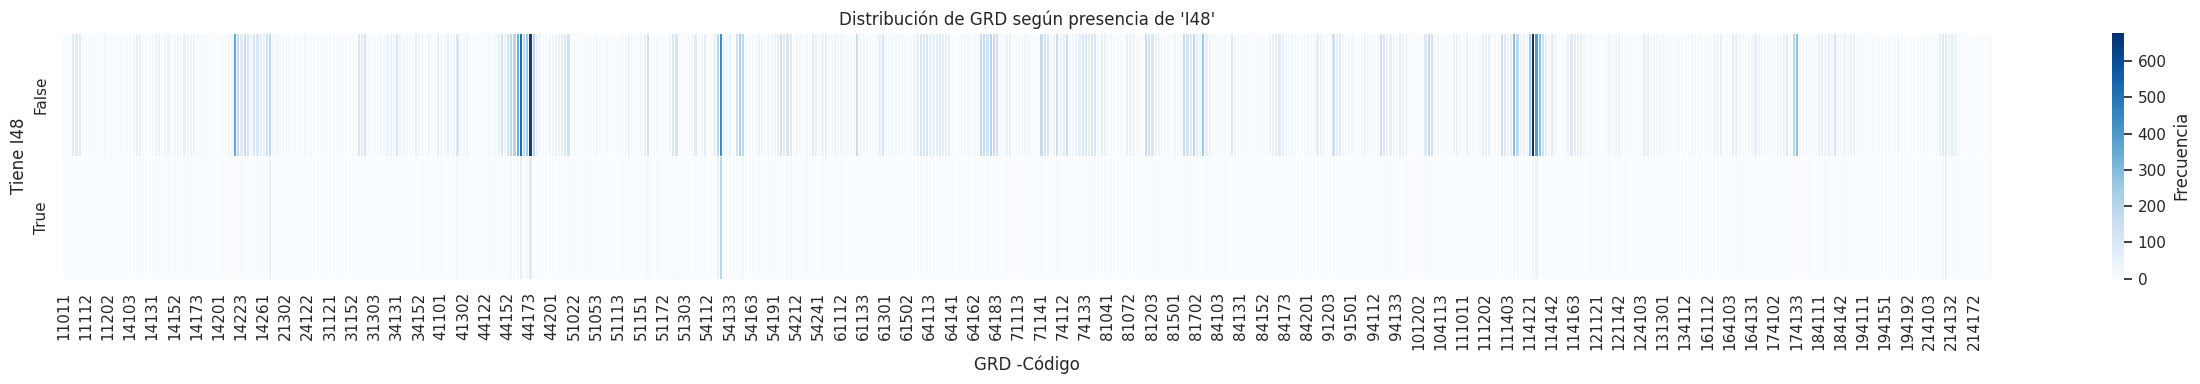

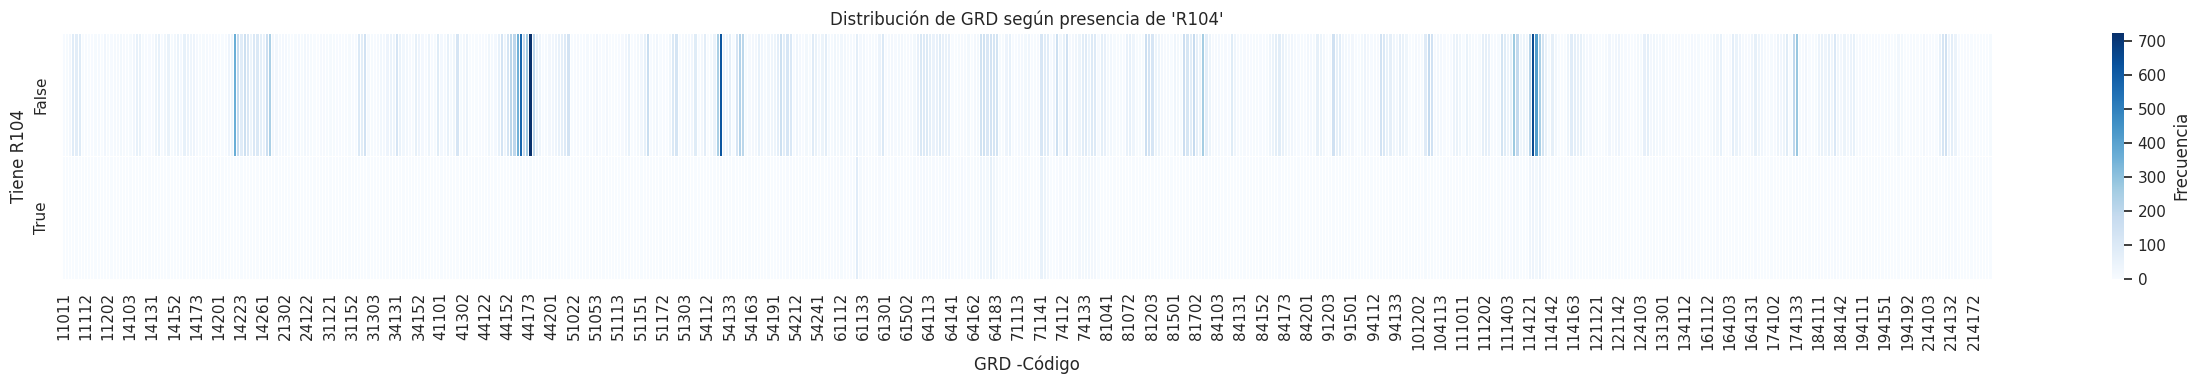

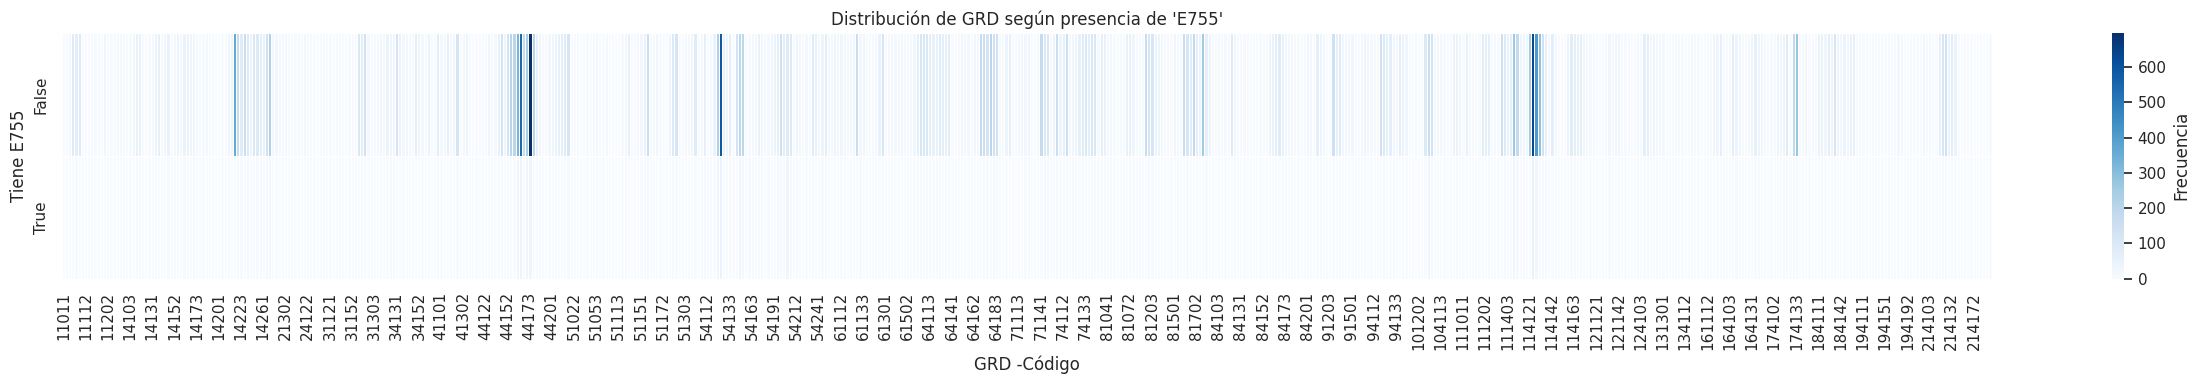

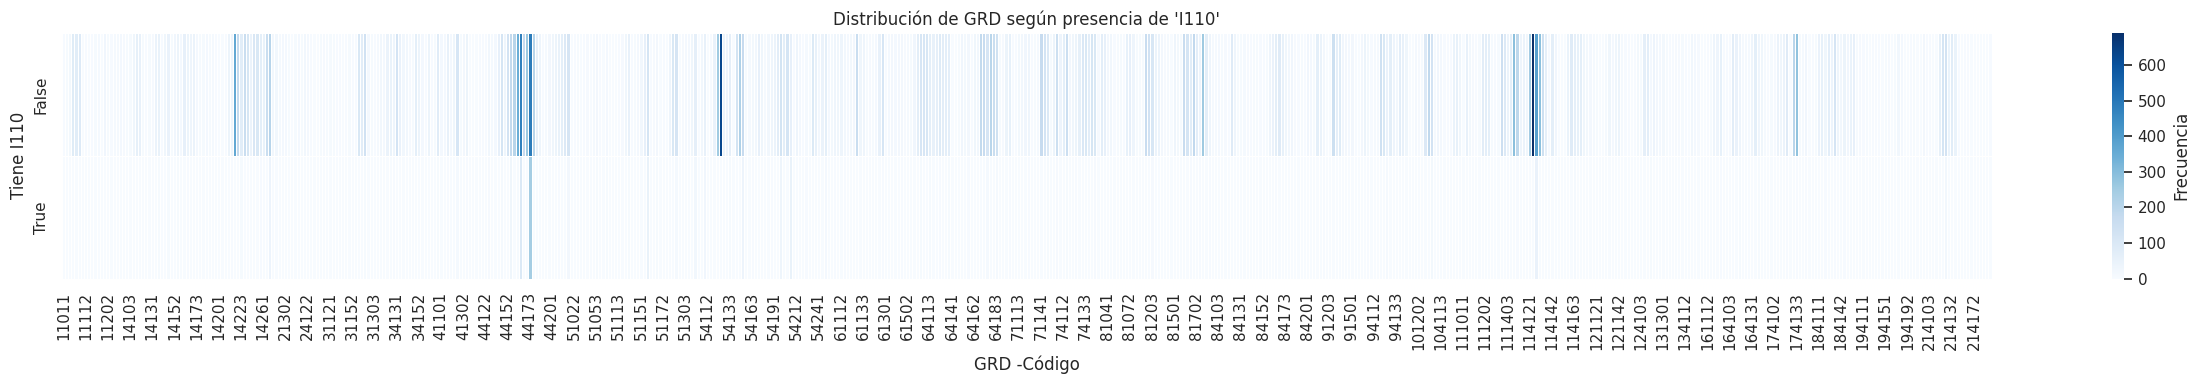

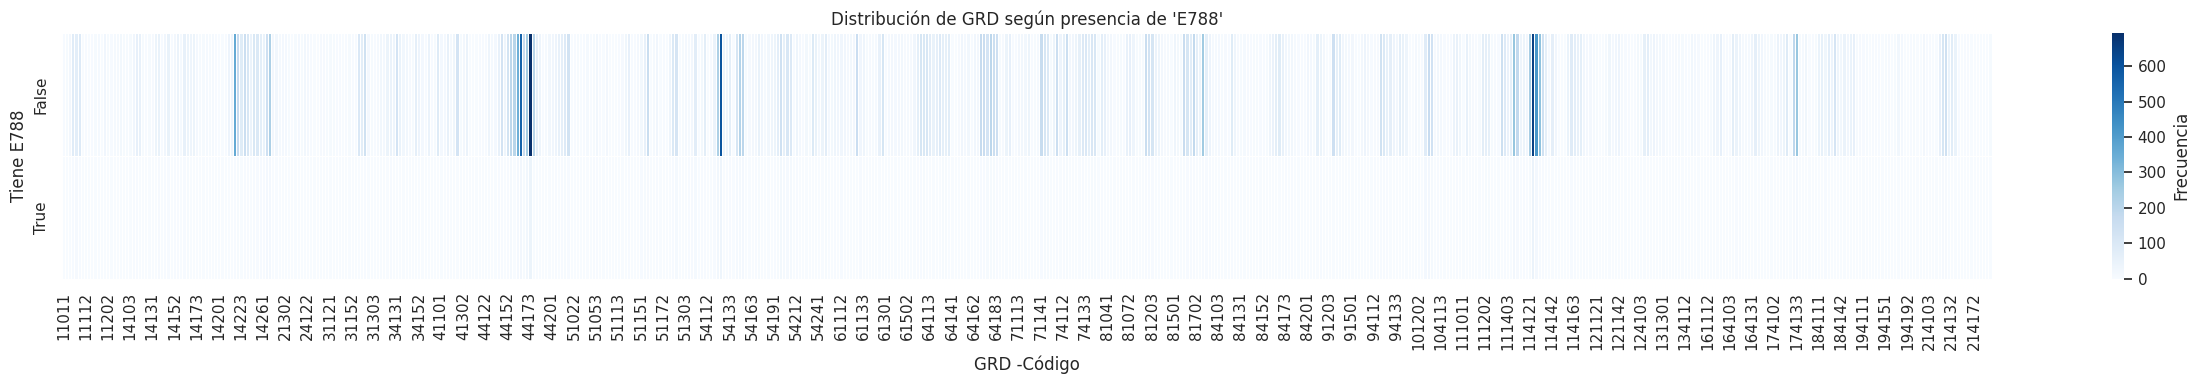

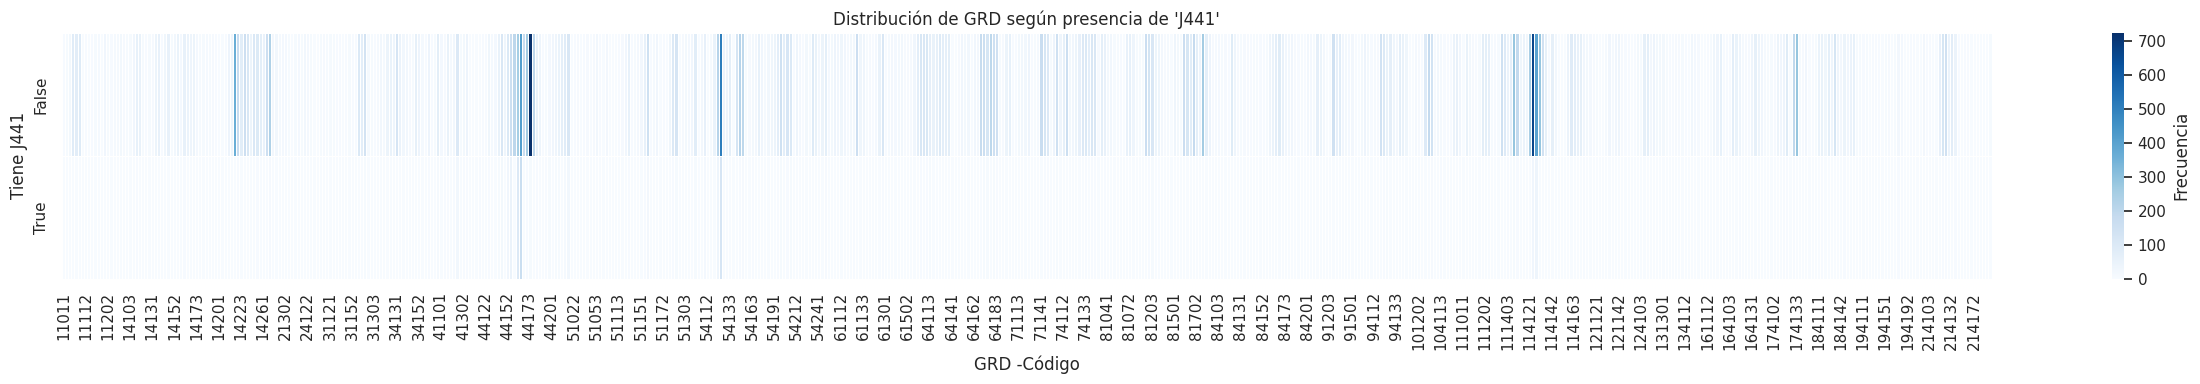

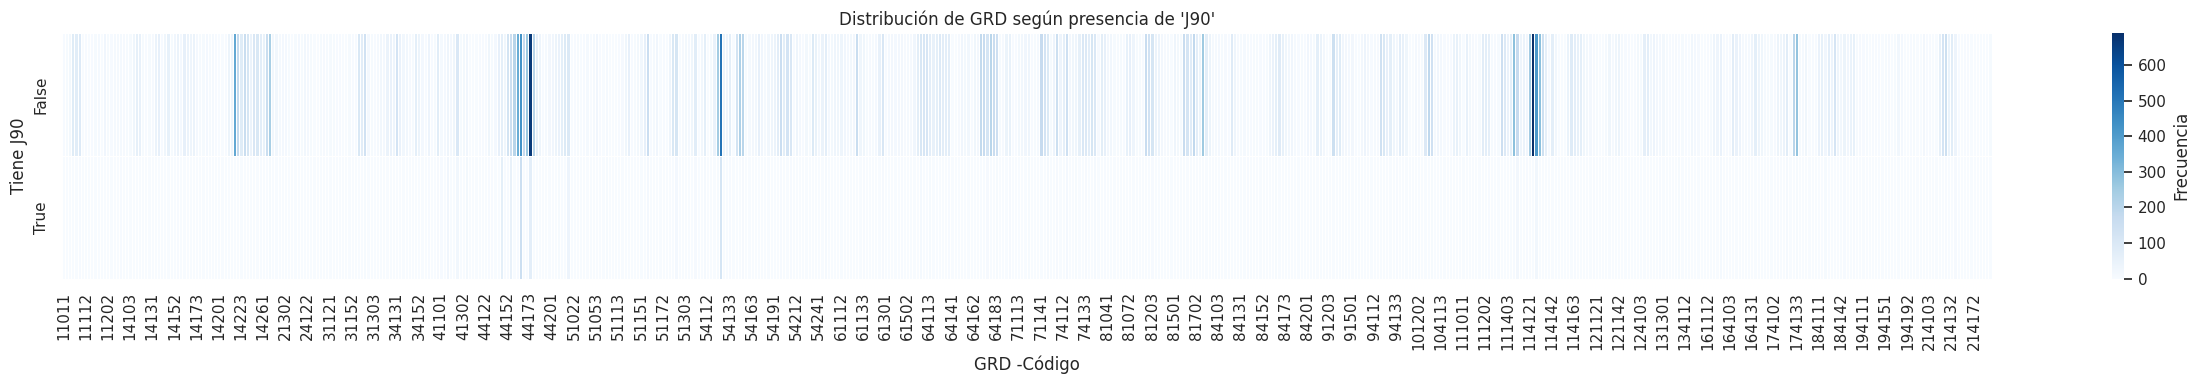

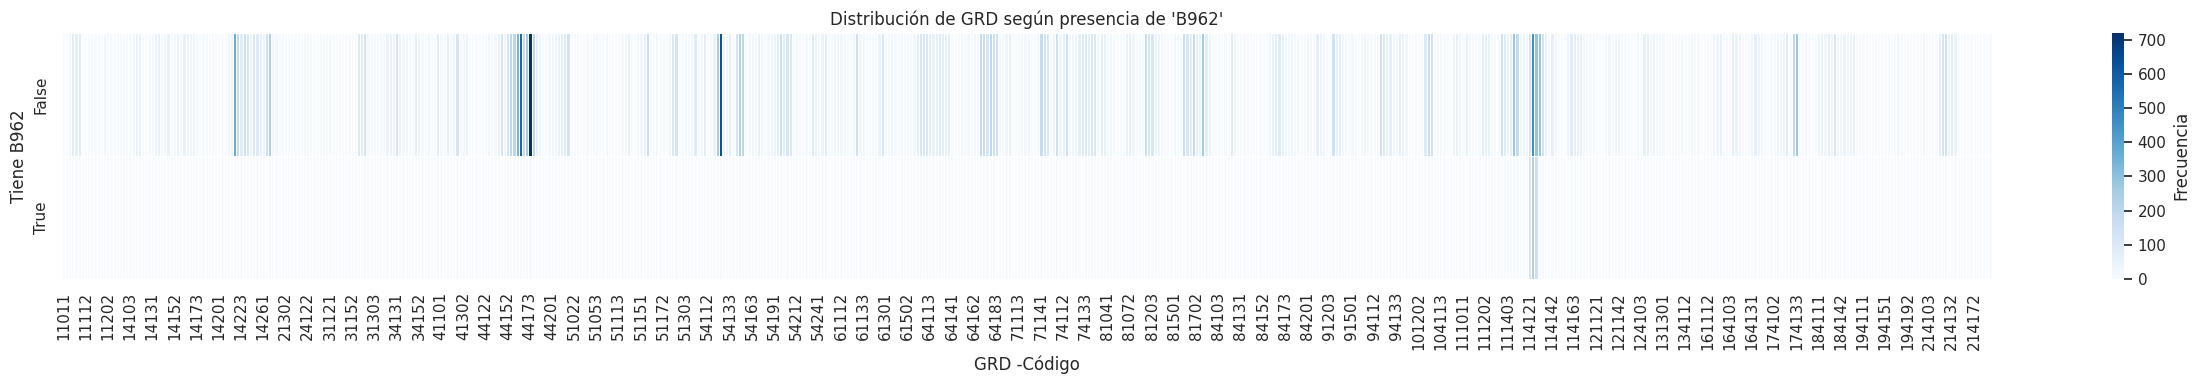

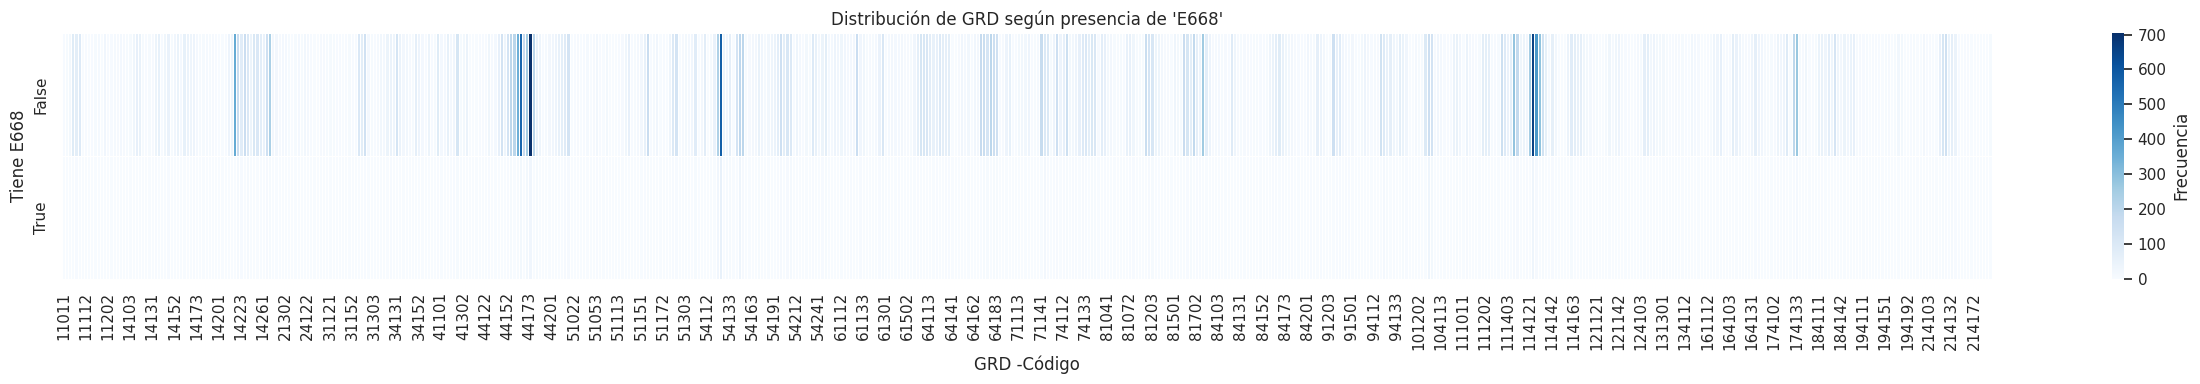

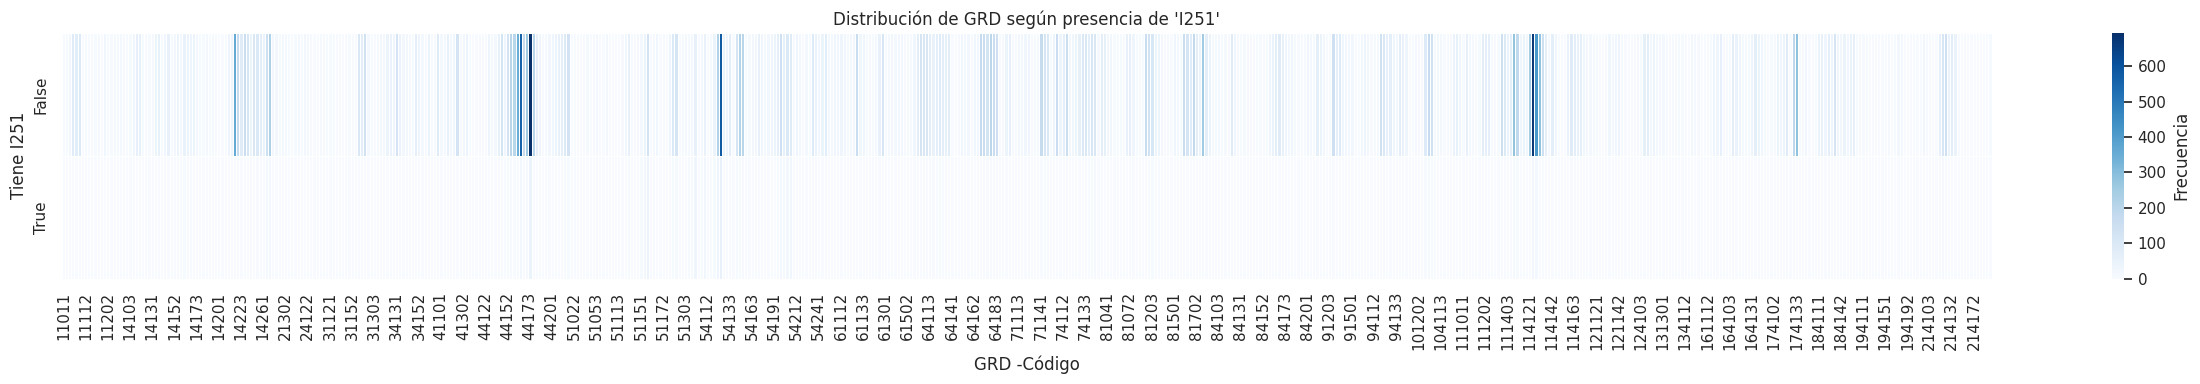

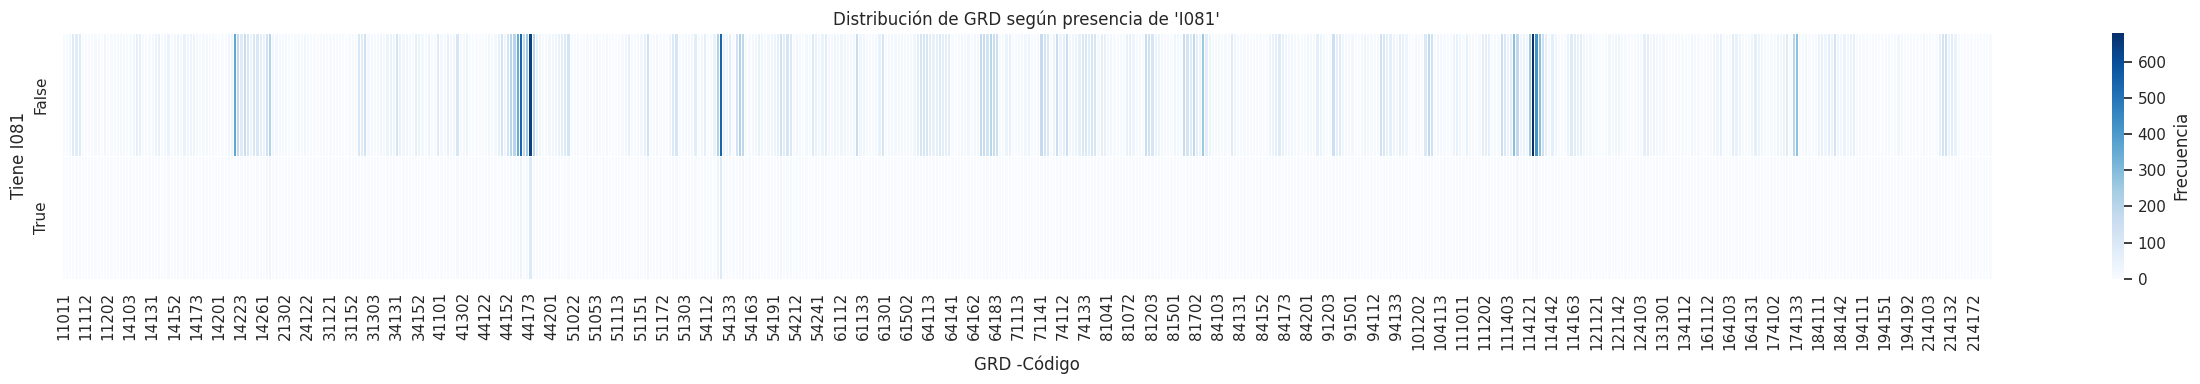

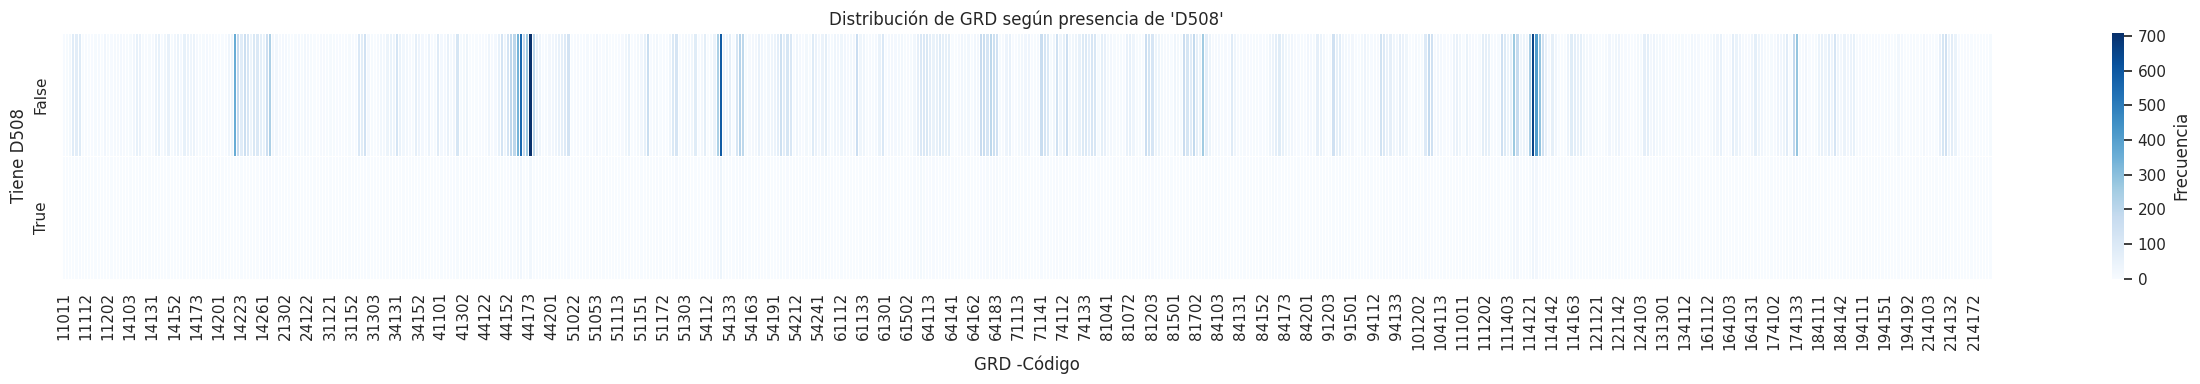

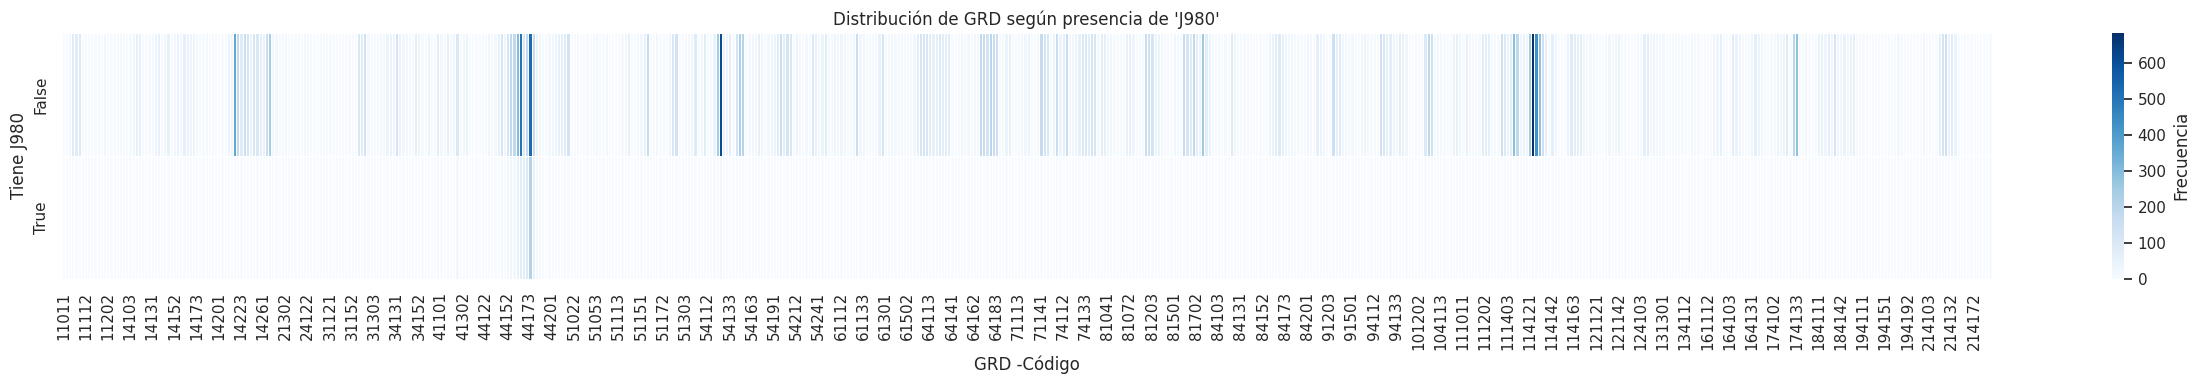

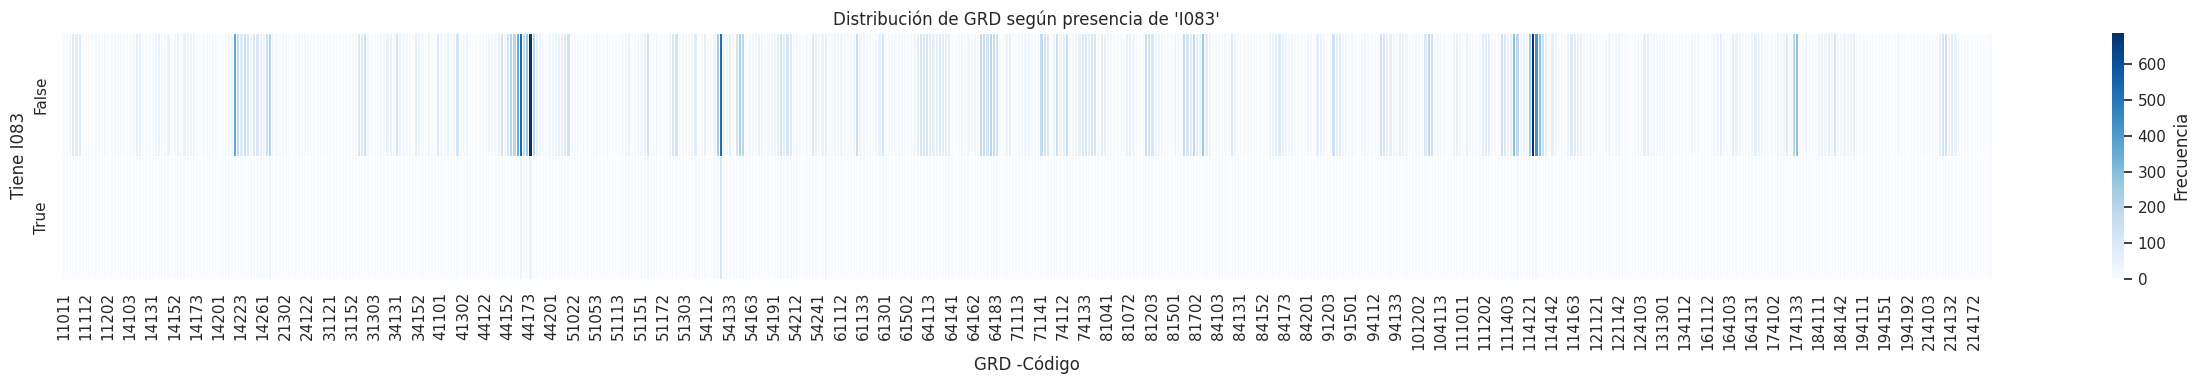

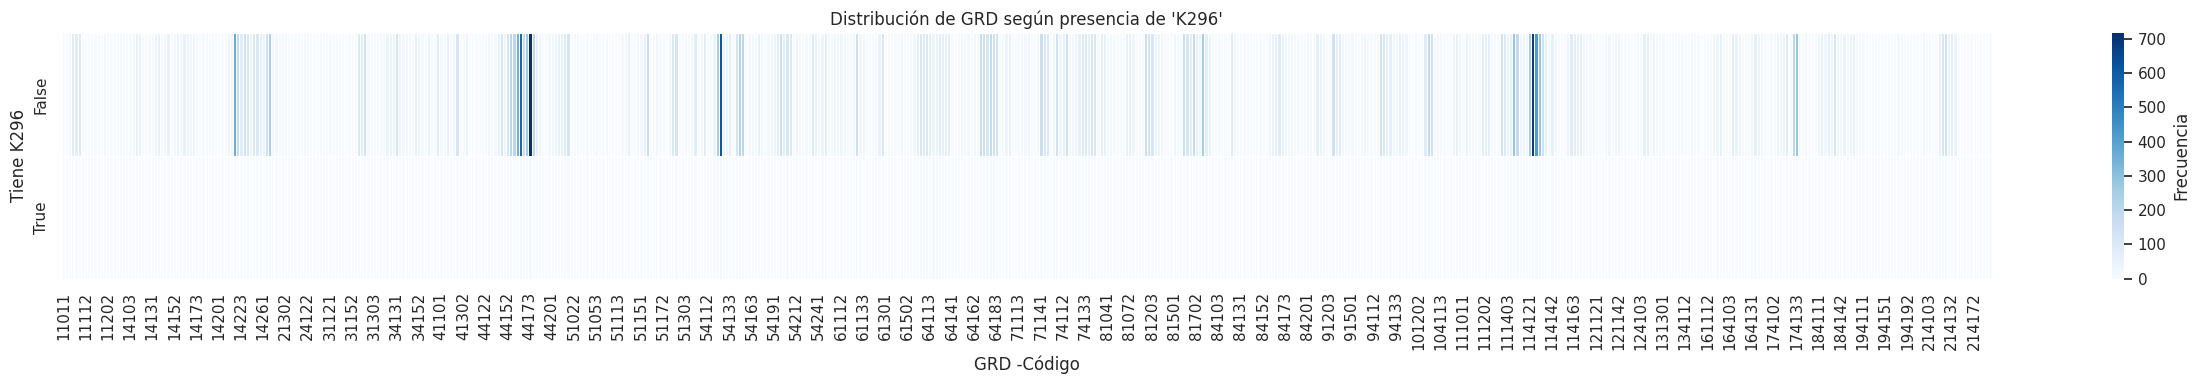

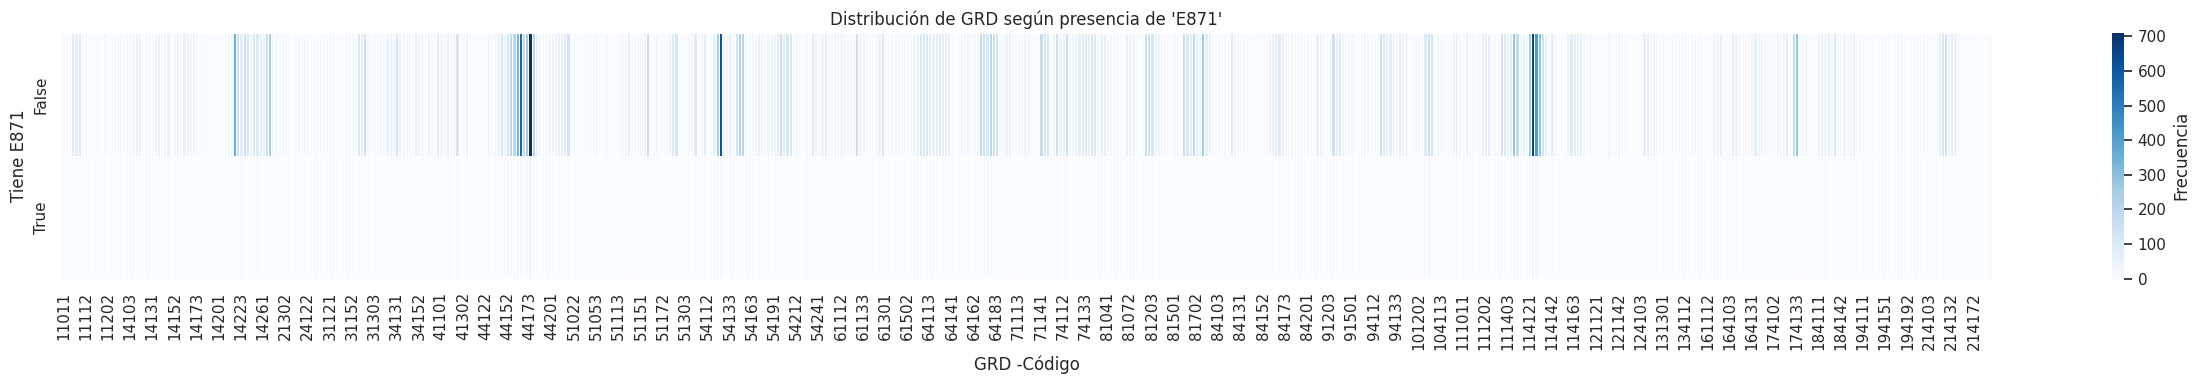

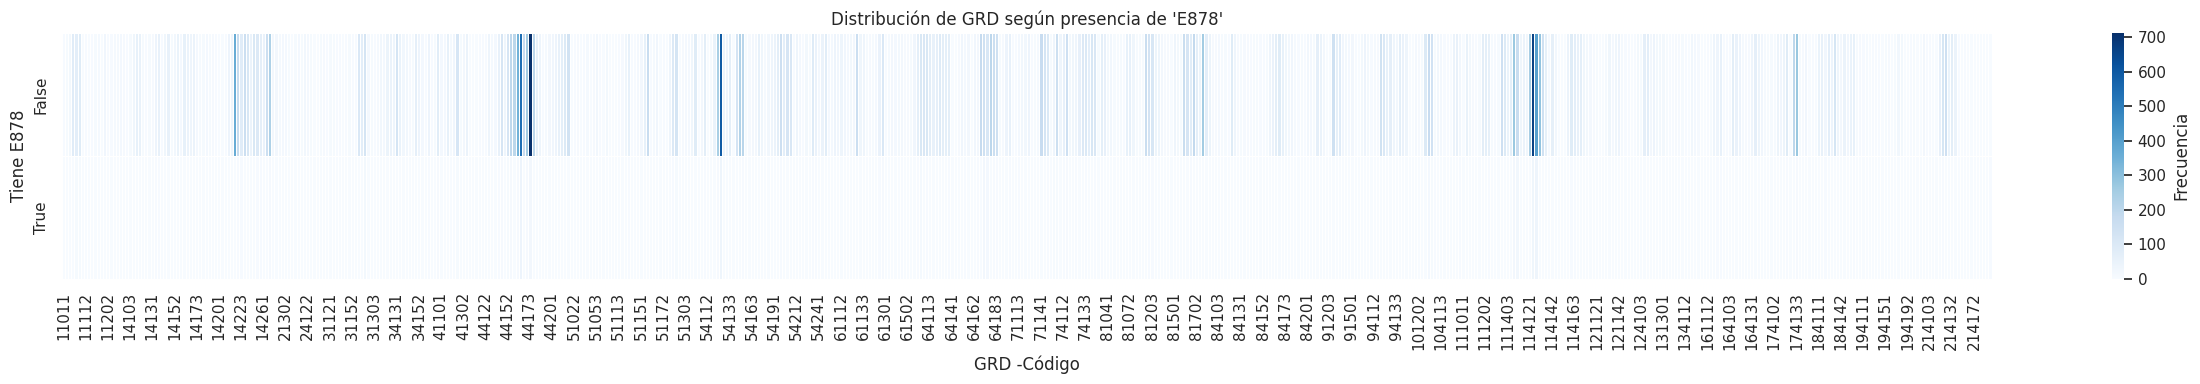

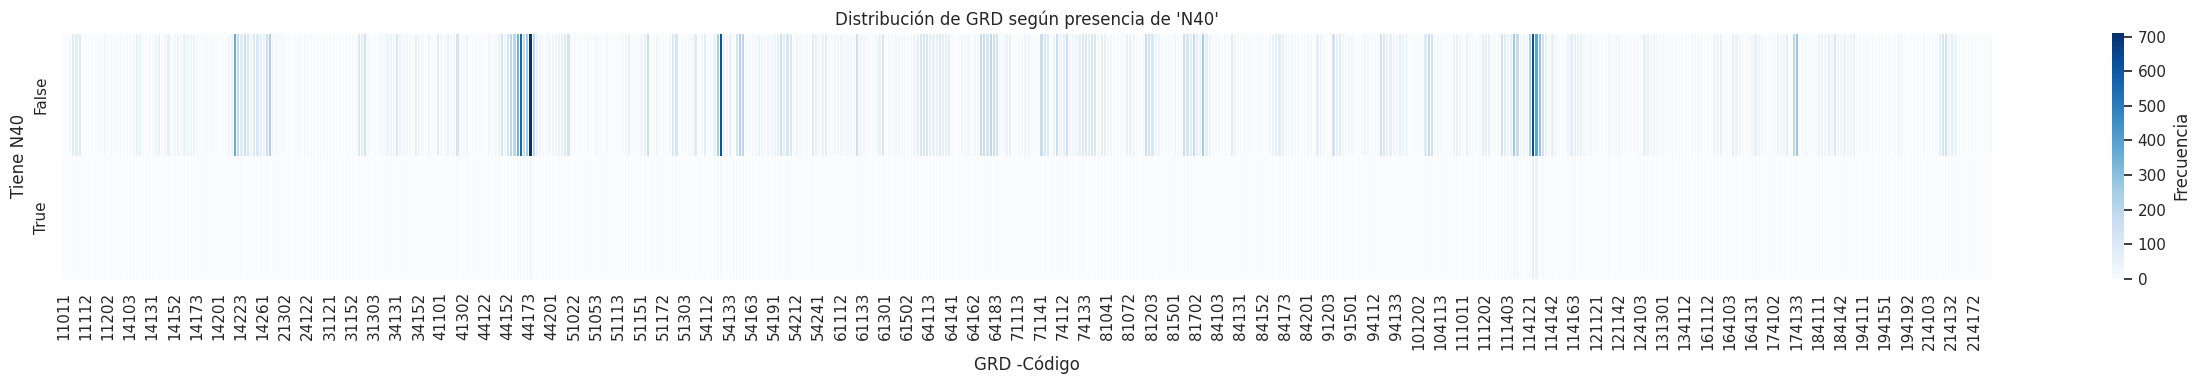

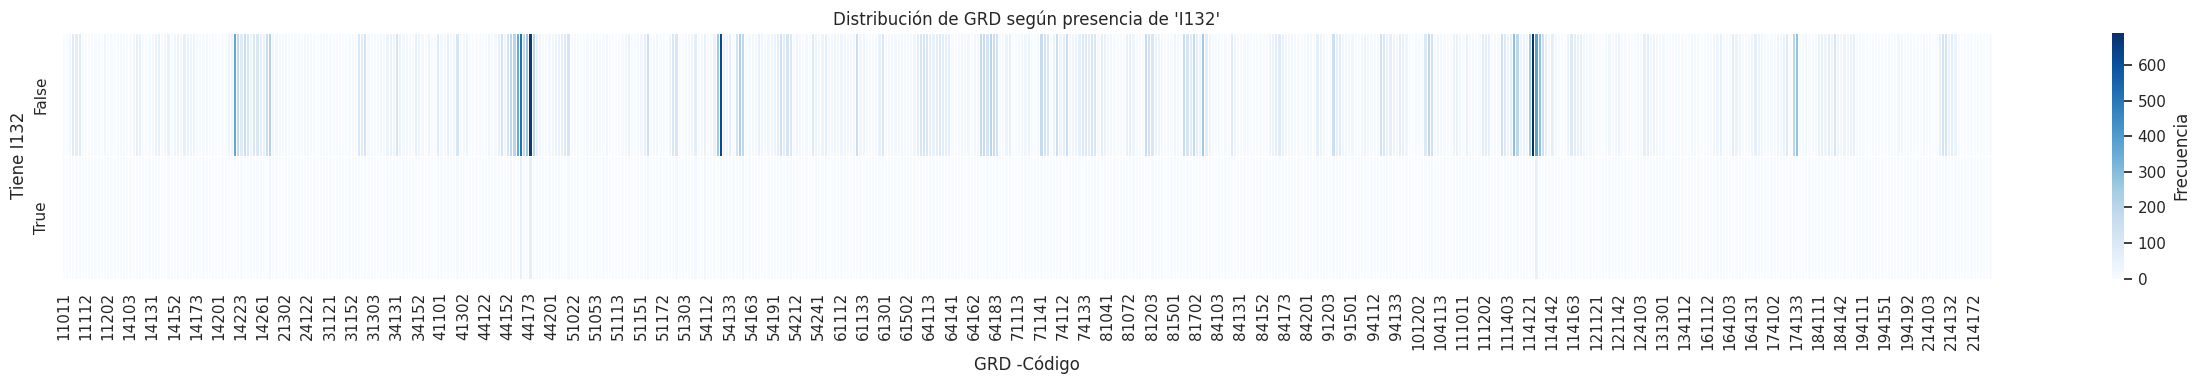

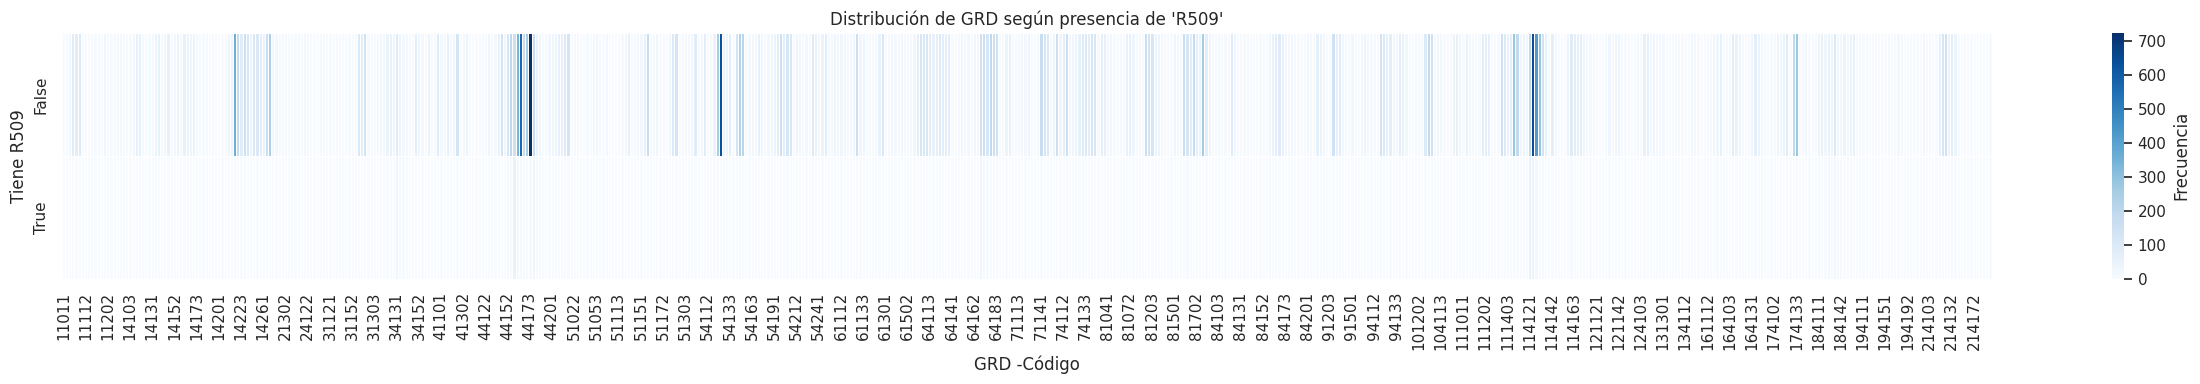

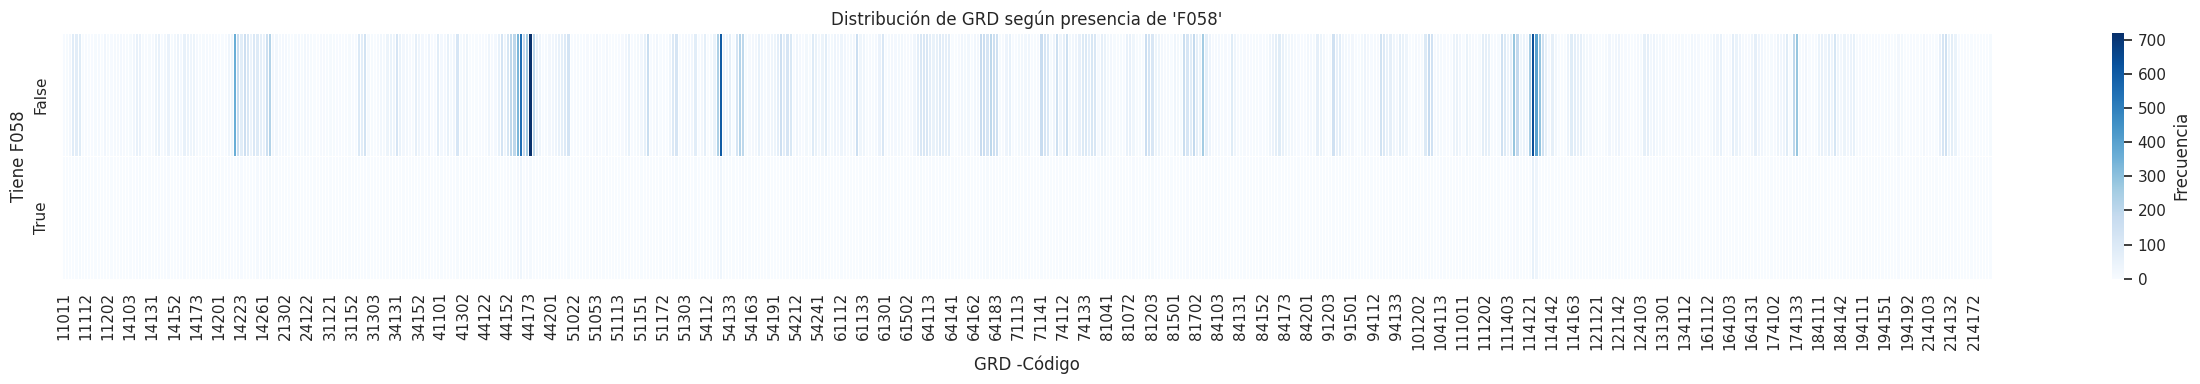

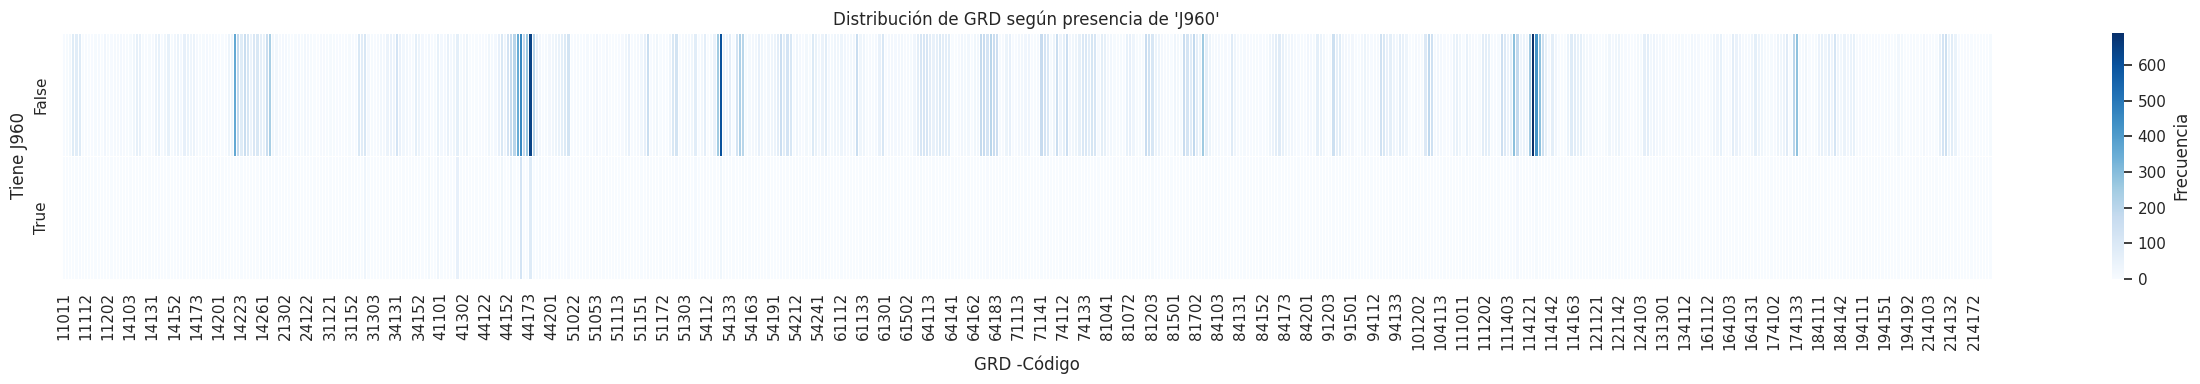

In [11]:
# Renombramos solamente las que empiezan con 'Dxr-'
nuevos_nombres = {
    col: col.replace("-", " ")
    for col in df.columns
    if col.startswith("Dxr-")
}

df = df.rename(columns=nuevos_nombres)

# A partir de aquí podemos buscar
if 'Dxr 10 ' in df.columns:
    df = df.rename(columns={'Dxr 10 ': 'Dxr 10'})

comorbilidades = [col for col in df.columns if col.startswith('Dxr ')]

print("Comorbilidades normalizadas :", comorbilidades)


# Conteo de no nulos por columna
print("\nCantidad de diagnósticos registrados en cada columna:")
conteo_por_columna = df[comorbilidades].notnull().sum()
print(conteo_por_columna)

# Combinar todas las columnas en una sola serie y contar frecuencia total
comorb_series = pd.concat([df[col] for col in comorbilidades]).dropna()
conteo_total = comorb_series.value_counts()
print("\nTop 35 comorbilidades más frecuentes (con al menos el 10% de la más frecuente):")
print(conteo_total.head(35))

# Crear variable binaria: ¿el paciente tiene al menos una comorbilidad?
df['Tiene_comorbilidad'] = df[comorbilidades].notna().any(axis=1)

# Tabla cruzada: Tiene comorbilidad vs GRD
tabla_binaria = pd.crosstab(df['Tiene_comorbilidad'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_binaria, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Relación entre tener comorbilidades y GRD")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene comorbilidad?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba de Chi²
chi2, p, dof, _ = chi2_contingency(tabla_binaria)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener comorbilidades y el GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Análisis individual: crear variables binarias para las 20 comorbilidades más frecuentes
top_comorbs = conteo_total.head(35).index

for dx in top_comorbs:
    col_binaria = f"Tiene_{dx}"
    df[col_binaria] = df[comorbilidades].apply(lambda row: dx in row.values, axis=1)

    tabla_dx = pd.crosstab(df[col_binaria], df['GRD -Código'])

    plt.figure(figsize=(25, 4))
    sns.heatmap(tabla_dx, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
    plt.title(f"Distribución de GRD según presencia de '{dx}'")
    plt.xlabel("GRD -Código")
    plt.ylabel(f"Tiene {dx}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">Las variables Dxr 1 a Dxr 10 contienen los diagnósticos relacionados o comorbilidades del paciente al ingreso. Se observan más de 27 mil registros con al menos un diagnóstico secundario, y su frecuencia decrece a medida que se avanza de Dxr 1 a Dxr 10. Las comorbilidades más comunes son entidades clínicas esperadas como hipertensión (I10), tabaquismo (Z720) o diabetes (E116). Se construyó una variable binaria Tiene_comorbilidad que identifica si el paciente tiene al menos una comorbilidad, y esta mostró una asociación estadísticamente significativa con el GRD. Adicionalmente, se generaron variables binarias específicas para las 20 comorbilidades más frecuentes, que también muestran patrones distintos de distribución entre los GRD. Por su relevancia clínica y su fuerte asociación con el desenlace, estas variables deben ser conservadas en el modelo, ya sea como una sola variable indicadora general o como un conjunto de indicadores para comorbilidades específicas, idealmente aquellas más frecuentes y relevantes.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Código causa externa y Causa externa: </strong></p>
    </div>

Valores únicos (Código): 572
Valores únicos (Descripción): 635
Valores nulos (Código): 22397
Valores nulos (Descripción): 22397

Códigos de causa externa más comunes:
Código causa externa
Y838    502
W180    455
W188    286
Y95X    252
Y841    245
Name: count, dtype: int64

Descripciones de causa externa más comunes:
Causa externa
OTROS PROCEDIMIENTOS QUIRURGICOS                          480
OTRAS CAIDAS EN EL MISMO NIVEL VIVIENDA                   439
OTRAS CAIDAS EN EL MISMO NIVEL OTRO LUGAR ESPECIFICADO    283
DIALISIS RENAL                                            239
AFECCION NOSOCOMIAL                                       221
Name: count, dtype: int64


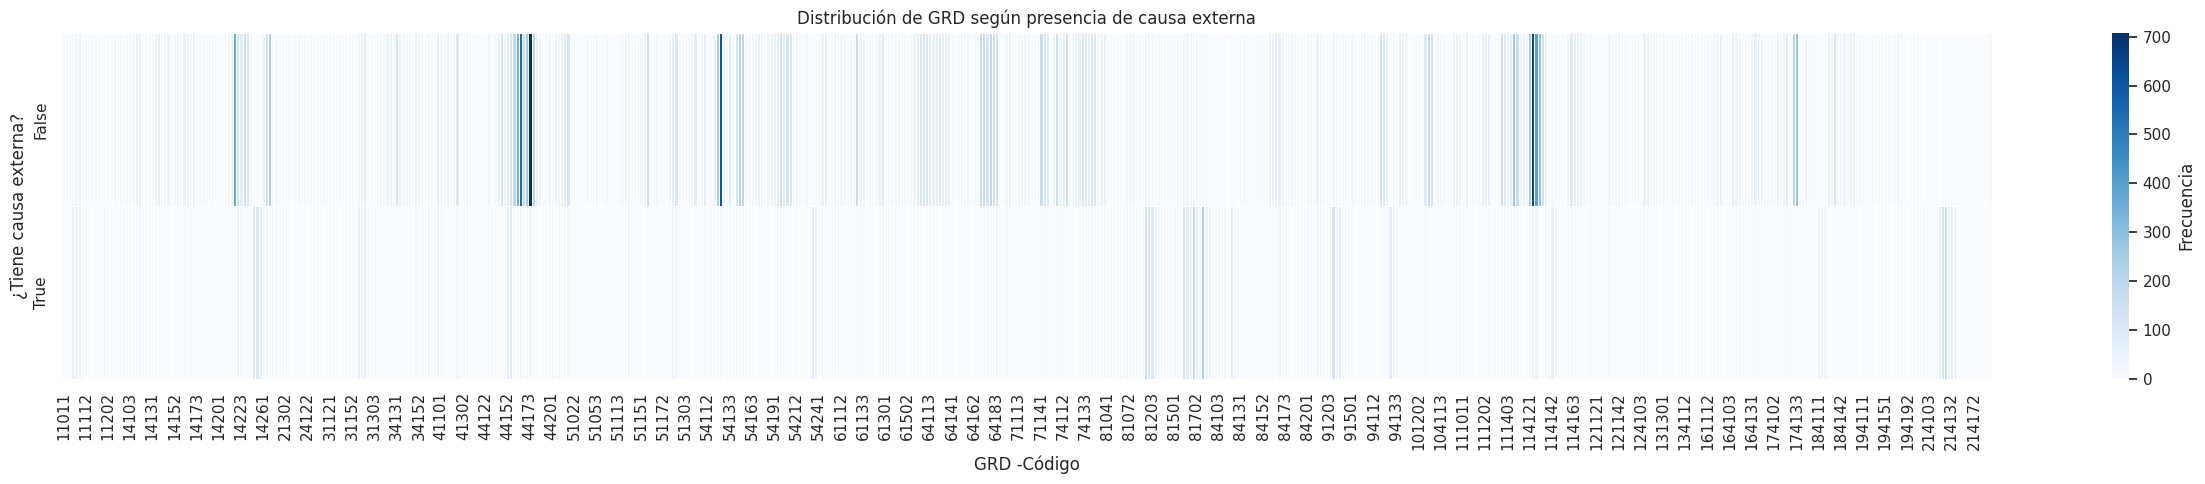


Chi² = 15589.76, p-value = 0.0000
→ Hay una asociación significativa entre tener causa externa y el GRD.


In [12]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Causa externa'] = df['Causa externa'].str.upper()

# Verificar cantidad de valores únicos
print("Valores únicos (Código):", df['Código causa externa'].nunique())
print("Valores únicos (Descripción):", df['Causa externa'].nunique())

# Verificar valores nulos
print("Valores nulos (Código):", df['Código causa externa'].isnull().sum())
print("Valores nulos (Descripción):", df['Causa externa'].isnull().sum())

# Frecuencia de los más comunes
print("\nCódigos de causa externa más comunes:")
print(df['Código causa externa'].value_counts().head())

print("\nDescripciones de causa externa más comunes:")
print(df['Causa externa'].value_counts().head())

# Crear variable binaria: ¿tiene causa externa?
df['Tiene_causa_externa'] = df['Código causa externa'].notnull()

# Crosstab: presencia de causa externa vs GRD
tabla_causa = pd.crosstab(df['Tiene_causa_externa'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_causa, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD según presencia de causa externa")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene causa externa?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(tabla_causa)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener causa externa y el GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Código causa externa" indica si el diagnóstico del paciente se asocia a un evento externo, y "Causa externa" proporciona su descripción. Más del 65% de los registros no tienen valores en esta variable, lo cual limita su utilidad como predictor generalizable. Sin embargo, en los casos donde sí se registra, se observan patrones repetitivos: códigos como Y838 (procedimientos quirúrgicos) o W180 (caídas) son los más frecuentes. El análisis gráfico y estadístico muestra una asociación significativa con el GRD, aunque su relevancia está sesgada hacia un subconjunto de casos donde el evento externo fue explícitamente documentado. Además, la relación entre código y descripción presenta inconsistencias (un mismo código puede tener varias descripciones, lo que sugiere mala normalización). Por lo tanto, aunque estadísticamente significativa, esta variable podría introducir ruido por su alta proporción de ausencias e inconsistencias en la codificación.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Tipo servicio: </strong></p>
    </div>

Valores únicos de Tipo servicio: ['URGENCIA ADULTOS' 'NO APLICA' 'CIRUGÍA' 'URGENCIA PEDÍATRICAS'
 'ATENCIÓN PRIORITARIA']
Valores nulos de Tipo servicio: 0

Frecuencia por categoría: Tipo servicio
URGENCIA ADULTOS        24840
NO APLICA                2351
URGENCIA PEDÍATRICAS      368
CIRUGÍA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64


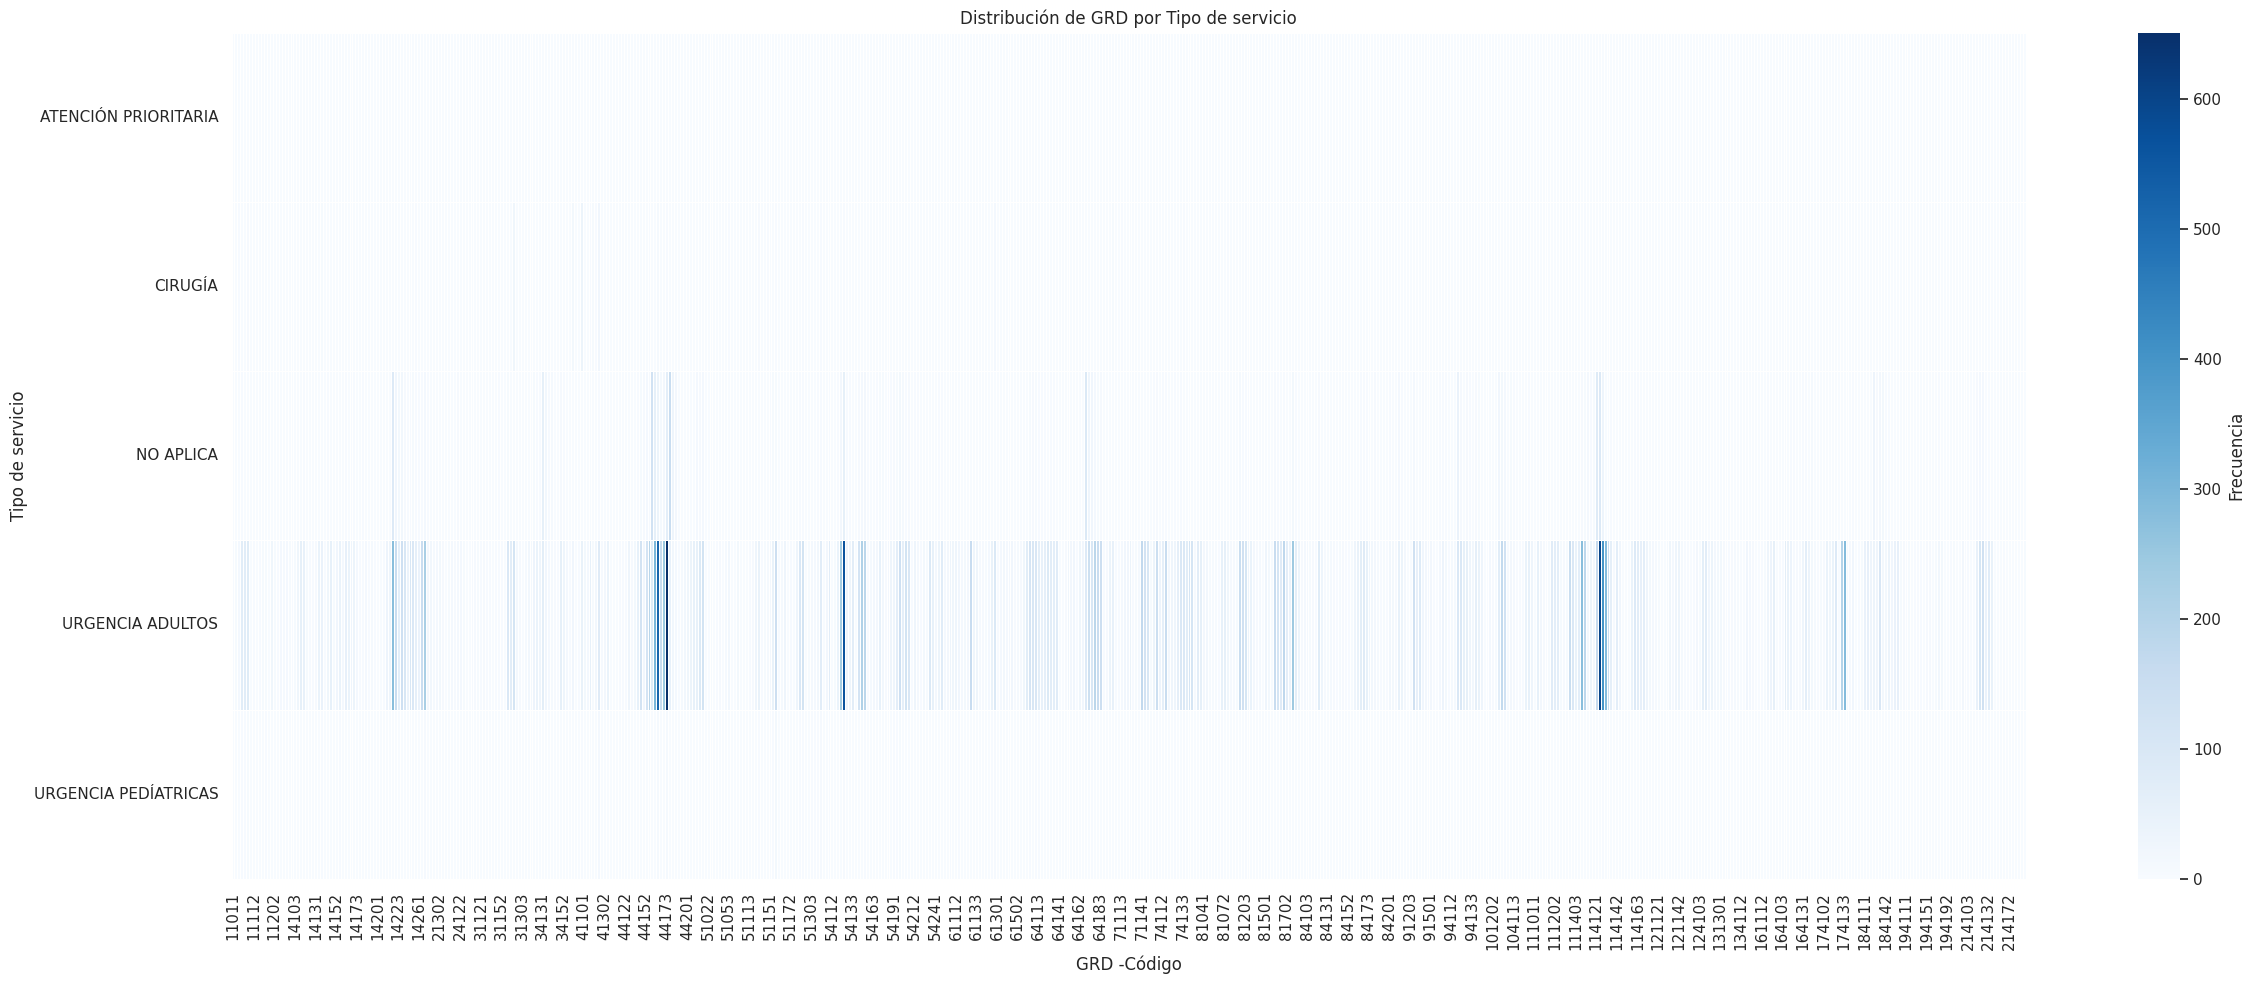


Chi² = 10973.81, p-value = 0.0000
→ Hay una asociación significativa entre Tipo de servicio y GRD.


In [13]:
# Asegurar que la variable sea texto y normalizar: quitar espacios, convertir a mayúsculas
df['Tipo servicio'] = df['Tipo servicio'].astype(str).str.strip().str.upper()

# Agrupar variantes comunes para evitar dispersión de categorías
df['Tipo servicio'] = df['Tipo servicio'].replace({
    'URGENCIA ADULTO': 'URGENCIA ADULTOS',
    'URGENCIA ADULTOS.': 'URGENCIA ADULTOS',
    'URGENCIA - ADULTOS': 'URGENCIA ADULTOS',
    'U. ADULTOS': 'URGENCIA ADULTOS',
    'URGENCIA PEDIATRICAS': 'URGENCIA PEDÍATRICAS',
    'CIRUGIA': 'CIRUGÍA',
    'N0 APLICA': 'NO APLICA',
    'NAN': 'NO APLICA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo servicio: {df['Tipo servicio'].unique()}")
print(f"Valores nulos de Tipo servicio: {df['Tipo servicio'].isnull().sum()}")

# Ver distribución de frecuencias
print(f"\nFrecuencia por categoría: {df['Tipo servicio'].value_counts()}")

# Tabla cruzada: Tipo servicio vs GRD
servicio_grd = pd.crosstab(df['Tipo servicio'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(servicio_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de servicio")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de servicio")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(servicio_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre Tipo de servicio y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Tipo servicio" presenta inicialmente múltiples variantes textuales para una misma categoría, las cuales fueron normalizadas para reducir ruido. Después de esta limpieza, se identifican cinco categorías principales: "URGENCIA ADULTOS", "URGENCIA PEDÍATRICAS", "CIRUGÍA", "NO APLICA" y un caso aislado de "ATENCIÓN PRIORITARIA". La distribución está altamente desbalanceada, con más del 85% de los casos concentrados en "URGENCIA ADULTOS". El análisis cruzado con GRD muestra diferencias leves entre categorías, pero no se observan patrones predictivos fuertes o específicos. La prueba de chi-cuadrado indica una asociación estadísticamente significativa, aunque esto probablemente se deba al tamaño de muestra. Dada la desproporción extrema y la baja capacidad discriminativa observada en el heatmap, esta variable puede introducir más ruido que señal. Se descarta del modelo predictivo.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 14pt;">Criterios de exclusión de variables no disponibles al ingreso del paciente</h4>
    <p style="font-size: 12pt;">Para el desarrollo de un modelo de predicción del Grupo Relacionado por Diagnóstico (GRD) basado en información disponible al ingreso del paciente, es fundamental restringir las variables predictoras a aquellas que estén efectivamente disponibles en ese momento. Incluir variables que dependen de eventos posteriores, como diagnósticos de egreso, procedimientos realizados durante la hospitalización, estancia en cuidados intensivos o la causa de muerte, introduce un sesgo temporal conocido como leakage o fuga de información. Este sesgo genera un modelo que aprende a partir de datos que no estarían disponibles en un escenario real de predicción, lo que compromete su validez y generalización. Por este motivo, se descartan del modelo todas las variables asociadas al egreso, evolución hospitalaria o procedimientos post-admisión, ya que su presencia distorsionaría el propósito predictivo centrado en el momento de admisión del paciente.</p>
</div>

<table border="1" style="border-collapse: collapse; font-family: 'Times New Roman', Times, serif; font-size: 12pt; text-align: left; width: 100%;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th style="padding: 6px;">Variable</th>
      <th style="padding: 6px;">¿Incluir en el modelo?</th>
      <th style="padding: 6px;">Justificación</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 6px;">Num caso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Identificador único sin valor predictivo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Aseguradora -Código- / Descripción</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Asociación débil con GRD y riesgo de inconsistencias</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Edad / Grupo Edad</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Información demográfica relevante y disponible al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Sexo</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Variable demográfica básica, útil para clasificación</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Codigo de ciudad</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Alta cardinalidad, sin valor clínico directo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Fecha de ingreso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Distribución homogénea sin valor predictivo relevante</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Tipo de ingreso</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Asociación significativa con GRD, variable disponible al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Fecha de egreso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, no disponible en tiempo real</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Días estancia</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, generada tras evolución hospitalaria</td>
    </tr>
    <tr>
      <td style="padding: 6px;">ServicioAlta</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, dependiente al proceso de atención</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Cuidados intensivos / Días de UCI</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, dependiente de evolución</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dx de ingreso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable relacionada con las visitas anteriores del paciente.</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dx principal de egreso / .1 / 3 Caracteres</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Diagnósticos de egreso, no disponibles al momento de admisión</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dxr 1 a Dxr 10</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Diagnósticos de ingreso asociados al estado clínico inicial</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Código causa externa / Causa externa</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Muy alta tasa de nulos</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Situacion al alta</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Desenlace hospitalario posterior</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Proc1 a Proc30</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Todos son procedimientos realizados después del ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Tipo servicio</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Desbalance extremo y bajo poder predictivo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Causa básica de muerte</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable de egreso, asociada a desenlace</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Infecciones / Infección quirúrgica</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Surgen durante la hospitalización, no disponibles al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">GRD -Código</td>
      <td style="padding: 6px;">Objetivo</td>
      <td style="padding: 6px;">Variable dependiente a predecir</td>
    </tr>
    <tr>
      <td style="padding: 6px;">GRD -Descripción / Tipo GRD</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Redundante con el objetivo; no aporta al modelo</td>
    </tr>
  </tbody>
</table>


In [14]:
# Columnas base (al ingreso)
cols_base = ['Grupo Edad', 'Sexo', 'Tipo de ingreso']

# Columnas binarias derivadas: todas las que empiezan con "Tiene_"
cols_DXR = [col for col in df.columns if col.startswith('Dxr ')]
cols_binarias = [col for col in df.columns if col.startswith('Tiene_')]

# Variable objetivo
target = ['GRD -Código']

# Crear dataset final
df_modelo_final = df[cols_base + cols_DXR + cols_binarias + target].copy()

# Limpieza: normalizar categóricas básicas
df_modelo_final['Sexo'] = df_modelo_final['Sexo'].astype(str).str.strip().str.upper()
df_modelo_final['Tipo de ingreso'] = df_modelo_final['Tipo de ingreso'].astype(str).str.strip().str.upper()
df_modelo_final['Tipo de ingreso'] = df_modelo_final['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Eliminar columna que no se usará
#df_modelo_final = df_modelo_final.drop(columns="Tiene_comorbilidad")
df_modelo_final = df_modelo_final.drop(columns="Tiene_causa_externa")

# --- FILTRAR CÓDIGOS POCO FRECUENTES ---

# Contar frecuencia de cada código
frecuencia_grd = df_modelo_final['GRD -Código'].value_counts()

# Obtener umbral mínimo (35% del más frecuente)
umbral_min = 0.35 * frecuencia_grd.max()

# Filtrar los códigos con frecuencia mayor o igual al umbral
codigos_validos = frecuencia_grd[frecuencia_grd >= umbral_min].index

# Filtrar el DataFrame
df_modelo_final = df_modelo_final[df_modelo_final['GRD -Código'].isin(codigos_validos)]

# Confirmar forma
print(f"Dimensiones del DataFrame final: {df_modelo_final.shape}")
df_modelo_final.to_csv('df_modelo_final.csv', index=False)
df_modelo_final.head()


Dimensiones del DataFrame final: (5166, 50)


,Grupo Edad,Sexo,Tipo de ingreso,Dxr 1,Dxr 2,Dxr 3,Dxr 4,Dxr 5,Dxr 6,Dxr 7,Dxr 8,Dxr 9,Dxr 10,Tiene_comorbilidad,Tiene_I10,Tiene_Z720,Tiene_E038,Tiene_I270,Tiene_I120,Tiene_E106,Tiene_D648,Tiene_E116,Tiene_J448,Tiene_E876,Tiene_N390,Tiene_D728,Tiene_G448,Tiene_I48,Tiene_R104,Tiene_E755,Tiene_I110,Tiene_E788,Tiene_J441,Tiene_J90,Tiene_B962,Tiene_E668,Tiene_I251,Tiene_I081,Tiene_D508,Tiene_J980,Tiene_I083,Tiene_K296,Tiene_E871,Tiene_E878,Tiene_N40,Tiene_I132,Tiene_R509,Tiene_F058,Tiene_J960,GRD -Código
5,75-79,M,URGENCIA,I48,J158,Y95,J441,N390,A099,F058,K318,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,54123
12,45-49,M,PROGRAMADO,C900,N390,B962,G310,I841,A099,D70,F322,R501,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,174133
16,85-89,F,URGENCIA,J980,I10,I081,I270,N390,A099,B028,E876,F051,NaN,True,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,44172
17,40-44,M,PROGRAMADO,C910,N390,B961,E106,D618,A099,F328,E876,NaN,NaN,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,174133
21,80-84,F,URGENCIA,C250,J984,N390,B962,J441,A162,E106,I10,D648,NaN,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,44162


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <p style="font-size: 12pt;">
    El proceso de construcción del dataset df_modelo_final partió de un subconjunto de variables relevantes extraídas del dataframe original df. Se seleccionaron columnas base relacionadas con la edad, sexo y tipo de ingreso del paciente, junto con variables binarias indicadoras (prefijadas por "Tiene_") y códigos diagnósticos resumidos (Dxr). Esta selección fue orientada a conformar una base representativa que integrara tanto características demográficas como clínicas.
  </p>
  <p style="font-size: 12pt;">
    Posteriormente, se normalizaron las variables categóricas más sensibles a errores de digitación, como "Sexo" y "Tipo de ingreso", transformándolas a mayúsculas y corrigiendo inconsistencias comunes (por ejemplo, unificando "URGENCIAS" a "URGENCIA"). Esta etapa fue esencial para garantizar la homogeneidad de los datos categóricos antes de codificarlos.
  </p>
  <p style="font-size: 12pt;">
    Se definió un filtrado de la variable objetivo ("GRD -Código"), eliminando las categorías poco frecuentes para asegurar una representación balanceada entre clases. Para ello, se calculó la frecuencia de cada código GRD y se retuvieron solo aquellos cuya frecuencia representara al menos el 30% del valor máximo observado, lo cual favorece la estabilidad del modelo.
  </p>
  <p style="font-size: 12pt;">
    El resultado de este procedimiento fue un conjunto de datos depurado y coherente, guardado como df_modelo_final.csv, que sirvió como base para la etapa posterior de codificación y entrenamiento de modelos. Esta preparación garantiza que los datos ingresados al modelo posean integridad semántica, coherencia estructural y representatividad clínica mínima, evitando problemas típicos como overfitting por clases minoritarias o sesgos por codificación deficiente.
  </p>
</div>

In [15]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.4 MB/s eta 0:00:00



Aplicando mejores hiperparámetros de Optuna para: Modelo 3

Resultados del mejor modelo con Optuna:
Accuracy: 0.6828
F1 Macro: 0.6850
F1 Weighted: 0.6765

Comparación previa de Modelos XGBoost
     Modelo  Accuracy  F1 Macro  F1 Weighted
2  Modelo 3    0.6828    0.6850       0.6790
1  Modelo 2    0.6770    0.6831       0.6730
0  Modelo 1    0.6663    0.6759       0.6624


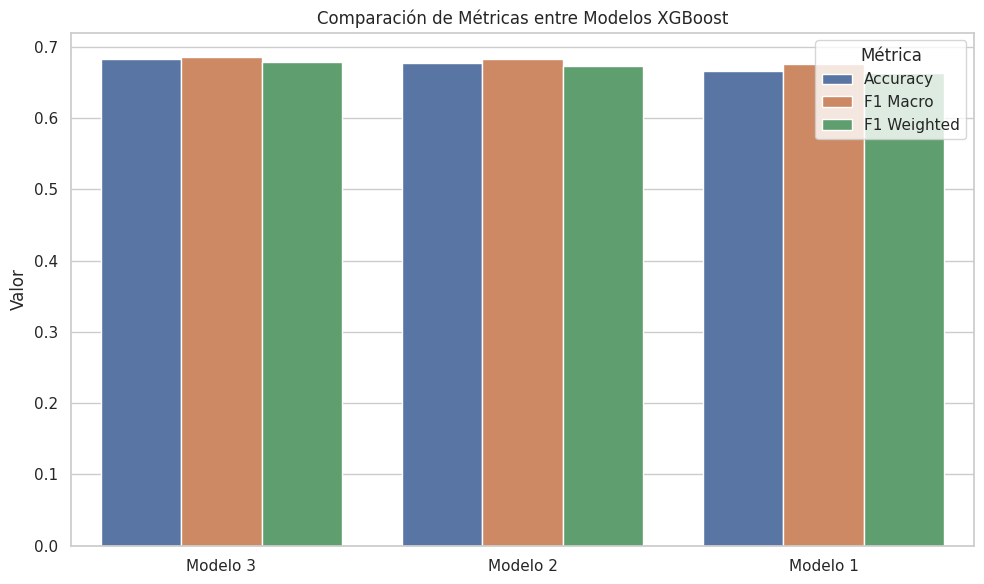

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier

# Cargar dataset
file = "df_modelo_final.csv"
df_boost = pd.read_csv(file)

# Codificar Dxrs
dxr_cols = [f"Dxr {i}" for i in range(1, 11)]
for col in dxr_cols:
    df_boost[col] = df_boost[col].astype("category").cat.codes

# Codificar categóricas básicas
df_boost["Sexo"] = df_boost["Sexo"].astype("category").cat.codes
df_boost["Grupo Edad"] = df_boost["Grupo Edad"].astype("category").cat.codes
df_boost["Tipo de ingreso"] = df_boost["Tipo de ingreso"].astype("category").cat.codes

# Codificar target
df_boost["GRD -Código"] = df_boost["GRD -Código"].astype("category")
y = df_boost["GRD -Código"].cat.codes
grds_map = dict(enumerate(df_boost["GRD -Código"].cat.categories))

# Separar columnas binarias Tiene_
cols_binarias = [col for col in df_boost.columns if col.startswith("Tiene_")]

# Crear n_comorbilidades para modelo 3
df_boost["n_comorbilidades"] = df_boost[cols_binarias].sum(axis=1)

# Definir diferentes conjuntos de features
X_sets = {
    "Modelo 1": df_boost[["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols],
    "Modelo 2": df_boost[["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias],
    "Modelo 3": df_boost[["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias + ["n_comorbilidades"]]
}

# Comparar modelos
resultados = []
mejor_modelo = None
mejor_f1 = 0
mejor_X = None
mejor_nombre = ""

for nombre, X in X_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    model = XGBClassifier(
        objective="multi:softmax",
        num_class=len(grds_map),
        eval_metric="mlogloss",
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "F1 Macro": f1_macro,
        "F1 Weighted": f1_weighted
    })

    if f1_weighted > mejor_f1:
        mejor_f1 = f1_weighted
        mejor_modelo = model
        mejor_X = X
        mejor_nombre = nombre

# Usar los mejores hiperparámetros encontrados por Optuna
print(f"\nAplicando mejores hiperparámetros de Optuna para: {mejor_nombre}")
optuna_best_params = {
    'max_depth': 5,
    'learning_rate': 0.1385750529497479,
    'n_estimators': 256,
    'subsample': 0.9649544079618069,
    'colsample_bytree': 0.7082342647123363,
    'gamma': 0.9054690873998221,
    'reg_alpha': 1.0460905941126142,
    'reg_lambda': 2.1434452812888556
}

X_train, X_test, y_train, y_test = train_test_split(mejor_X, y, test_size=0.2, stratify=y, random_state=42)

model_optuna = XGBClassifier(
    objective="multi:softmax",
    num_class=len(grds_map),
    eval_metric="mlogloss",
    random_state=42,
    verbosity=0,
    **optuna_best_params
)
model_optuna.fit(X_train, y_train)
y_pred = model_optuna.predict(X_test)

final_acc = accuracy_score(y_test, y_pred)
final_f1_macro = f1_score(y_test, y_pred, average="macro")
final_f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("\nResultados del mejor modelo con Optuna:")
print(f"Accuracy: {final_acc:.4f}")
print(f"F1 Macro: {final_f1_macro:.4f}")
print(f"F1 Weighted: {final_f1_weighted:.4f}")

# Guardar mejor modelo y configuración
joblib.dump(model_optuna, f"mejor_modelo_xgboost_optimizado.joblib")
joblib.dump(mejor_X.columns.tolist(), "mejores_features.joblib")
joblib.dump(grds_map, "mapa_grd.joblib")

# Mostrar resultados anteriores
print("\nComparación previa de Modelos XGBoost")
df_boost_resultados = pd.DataFrame(resultados).sort_values(by="F1 Weighted", ascending=False).round(4)
print(df_boost_resultados)

# Graficar comparación
plt.figure(figsize=(10, 6))
sns.barplot(data=df_boost_resultados.melt(id_vars="Modelo"), x="Modelo", y="value", hue="variable")
plt.title("Comparación de Métricas entre Modelos XGBoost")
plt.ylabel("Valor")
plt.xlabel("")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <p style="font-size: 12pt;">
    Para la etapa de modelado predictivo, se utilizó el algoritmo de clasificación multiclase <em>XGBoost</em> (Extreme Gradient Boosting), reconocido por su eficiencia computacional y su capacidad para manejar datos de alta dimensionalidad, esparsos y potencialmente desbalanceados. El objetivo principal fue predecir el código GRD de hospitalización a partir de variables clínicas y demográficas previamente codificadas y estructuradas.
  </p>
  <p style="font-size: 12pt;">
    Se inició dividiendo el conjunto de datos consolidado `df_final` en variables predictoras (`X`) y la variable objetivo (`y`), correspondiente al campo `"GRD -Código"`. Posteriormente, se realizó una partición estratificada utilizando la función `train_test_split`, con el fin de garantizar una representación proporcional de las clases en los subconjuntos de entrenamiento y prueba, reservando un 20% de los datos para evaluación.
  </p>
  <p style="font-size: 12pt;">
    Como primer paso, se entrenó un modelo base de <em>XGBoost</em> utilizando hiperparámetros estándar: número de árboles (`n_estimators=100`), profundidad máxima (`max_depth=5`), tasa de aprendizaje (`learning_rate=0.1`) y la métrica de evaluación de pérdida logarítmica multiclase (`eval_metric='mlogloss'`). El entrenamiento se realizó con validación interna, habilitando `early_stopping_rounds=10` sobre el conjunto de prueba, con el fin de evitar sobreajuste. Una vez entrenado, el modelo fue evaluado mediante la exactitud global (<em>accuracy</em>) y el F1 ponderado (<em>weighted F1-score</em>), dada la naturaleza inherentemente desbalanceada del conjunto de clases GRD. Adicionalmente, se generó una matriz de confusión para analizar el desempeño del clasificador en cada una de las clases.
  </p>
  <p style="font-size: 12pt;">
    Con el objetivo de maximizar el desempeño del modelo, se implementó un proceso de optimización de hiperparámetros utilizando la biblioteca <em>Optuna</em>, basada en técnicas de optimización bayesiana y búsqueda inteligente. Se definió una función objetivo personalizada que, para cada combinación de parámetros, entrena un modelo XGBoost sobre una partición del conjunto de entrenamiento y retorna el F1 ponderado obtenido en validación. Entre los hiperparámetros optimizados se incluyeron: `max_depth`, `learning_rate`, `n_estimators`, `subsample`, `colsample_bytree`, y `gamma`, todos clave para controlar la complejidad y generalización del modelo.
  </p>
  <p style="font-size: 12pt;">
    La búsqueda se realizó a lo largo de 50 iteraciones (trials), identificando como óptima la configuración que maximizó el rendimiento del modelo. Posteriormente, se reentrenó el clasificador con dichos parámetros óptimos sobre todo el conjunto de entrenamiento, y se evaluó su desempeño final sobre el conjunto de prueba. Este proceso permitió mejorar significativamente las métricas predictivas con respecto al modelo base, sin incrementar de forma sustancial el tiempo de entrenamiento.
  </p>
</div>


In [17]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.0 MB/s eta 0:00:00



Resultados del mejor modelo con CatBoost:
Accuracy: 0.7002
F1 Macro: 0.7014
F1 Weighted: 0.6971

Comparación previa de Modelos CatBoost
     Modelo  Accuracy  F1 Macro  F1 Weighted
1  Modelo 2    0.7002    0.7014       0.6971
2  Modelo 3    0.6963    0.6999       0.6938
0  Modelo 1    0.6683    0.6703       0.6640


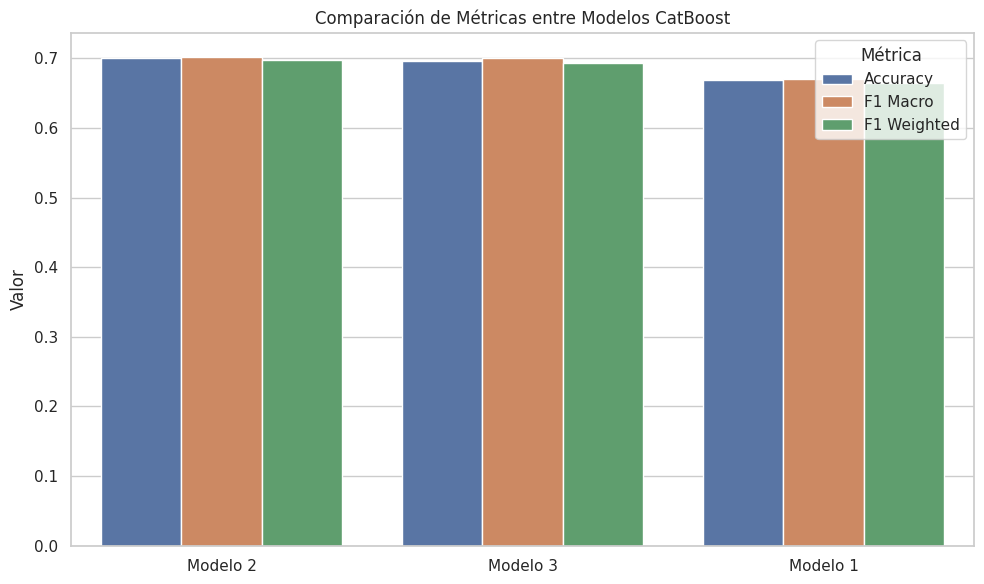

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from catboost import CatBoostClassifier

# Cargar dataset
file = "df_modelo_final.csv"
df_boost = pd.read_csv(file)

# Codificar target
df_boost["GRD -Código"] = df_boost["GRD -Código"].astype("category")
y = df_boost["GRD -Código"].cat.codes
grds_map = dict(enumerate(df_boost["GRD -Código"].cat.categories))

# Variables categóricas
dxr_cols = [f"Dxr {i}" for i in range(1, 11)]
for col in dxr_cols:
    df_boost[col] = df_boost[col].astype(str).fillna("missing")

categorical_features = ["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols
cols_binarias = [col for col in df_boost.columns if col.startswith("Tiene_")]

# Crear n_comorbilidades para modelo 3
df_boost["n_comorbilidades"] = df_boost[cols_binarias].sum(axis=1)

# Definir diferentes conjuntos de features
X_sets = {
    "Modelo 1": df_boost[ ["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols ],
    "Modelo 2": df_boost[ ["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias ],
    "Modelo 3": df_boost[ ["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias + ["n_comorbilidades"] ]
}

# Comparar modelos
resultados = []
mejor_modelo = None
mejor_f1 = 0
mejor_X = None
mejor_nombre = ""
mejor_cat_features = []

for nombre, X in X_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    cat_features_indices = [X.columns.get_loc(c) for c in X.columns if c in categorical_features]

    model = CatBoostClassifier(
        iterations=526,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        verbose=0,
        random_seed=42
    )
    model.fit(X_train, y_train, cat_features=cat_features_indices)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "F1 Macro": f1_macro,
        "F1 Weighted": f1_weighted
    })

    if f1_weighted > mejor_f1:
        mejor_f1 = f1_weighted
        mejor_modelo = model
        mejor_X = X
        mejor_nombre = nombre
        mejor_cat_features = cat_features_indices

# Evaluación final del mejor modelo
X_train, X_test, y_train, y_test = train_test_split(mejor_X, y, test_size=0.2, stratify=y, random_state=42)
mejor_modelo.fit(X_train, y_train, cat_features=mejor_cat_features)
y_pred = mejor_modelo.predict(X_test)

final_acc = accuracy_score(y_test, y_pred)
final_f1_macro = f1_score(y_test, y_pred, average="macro")
final_f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("\nResultados del mejor modelo con CatBoost:")
print(f"Accuracy: {final_acc:.4f}")
print(f"F1 Macro: {final_f1_macro:.4f}")
print(f"F1 Weighted: {final_f1_weighted:.4f}")

# Guardar mejor modelo y configuración
joblib.dump(mejor_modelo, "mejor_modelo_catboost.joblib")
joblib.dump(mejor_X.columns.tolist(), "mejores_features.joblib")
joblib.dump(grds_map, "mapa_grd.joblib")

# Mostrar resultados anteriores
print("\nComparación previa de Modelos CatBoost")
df_boost_resultados = pd.DataFrame(resultados).sort_values(by="F1 Weighted", ascending=False).round(4)
print(df_boost_resultados)

# Graficar comparación
plt.figure(figsize=(10, 6))
sns.barplot(data=df_boost_resultados.melt(id_vars="Modelo"), x="Modelo", y="value", hue="variable")
plt.title("Comparación de Métricas entre Modelos CatBoost")
plt.ylabel("Valor")
plt.xlabel("")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <p style="font-size: 12pt;">
    Se implementó un enfoque comparativo utilizando el algoritmo <em>CatBoostClassifier</em>, una técnica de <strong>gradient boosting</strong> que destaca por su rendimiento en conjuntos de datos con variables categóricas, ya que permite tratarlas de forma nativa sin necesidad de codificación explícita, lo cual reduce significativamente el riesgo de sobreajuste y simplifica el preprocesamiento.
  </p>
  <p style="font-size: 12pt;">
    El conjunto de datos utilizado provino de la consolidación final (df_modelo_final.csv) y contenía múltiples variables clínicas, demográficas y diagnósticas. La variable objetivo, el código GRD de hospitalización, fue transformada a formato categórico codificado como entero. Adicionalmente, se definió un mapeo entre los índices numéricos y las categorías originales, con el fin de facilitar la interpretación de las predicciones posteriores.
  </p>
  <p style="font-size: 12pt;">
    Con el objetivo de explorar distintas configuraciones de entrada, se construyeron tres conjuntos de características:
    <strong>Modelo 1</strong> incluyó únicamente variables sociodemográficas y diagnósticos principales (Grupo Edad, Sexo, Tipo de ingreso, Dxr 1 a Dxr 10);
    <strong>Modelo 2</strong> incorporó además las variables binarias asociadas a comorbilidades (Tiene_X);
    y <strong>Modelo 3</strong> agregó una variable adicional derivada, <code>n_comorbilidades</code>, que representa el conteo total de comorbilidades por paciente.
  </p>
  <p style="font-size: 12pt;">
    Para cada conjunto de entrada, se llevó a cabo una partición estratificada del conjunto de datos (80% entrenamiento, 20% prueba) y se entrenó un modelo de CatBoost utilizando parámetros consistentes: 500 iteraciones, tasa de aprendizaje de 0.1, profundidad de 6, y función de pérdida para clasificación multiclase (<code>MultiClass</code>). Se especificaron explícitamente los índices de las columnas categóricas para que el modelo las tratara adecuadamente durante el proceso de boosting.
  </p>
  <p style="font-size: 12pt;">
    Posteriormente, se evaluaron las métricas de desempeño para cada modelo: exactitud (<em>accuracy</em>), F1 macro y F1 ponderado. Estas métricas se almacenaron y compararon entre sí para determinar la mejor configuración de entrada. El modelo que presentó el mayor F1 ponderado fue seleccionado como el modelo final. Dicho modelo fue reentrenado en una nueva partición de datos para evaluar su rendimiento definitivo sobre el conjunto de prueba.
  </p>
  <p style="font-size: 12pt;">
    Los resultados indicaron que el uso progresivo de variables adicionales (particularmente las comorbilidades y su conteo total) mejoró el poder predictivo del modelo. El mejor modelo alcanzó un F1 ponderado notable, lo cual indica una adecuada clasificación de las distintas clases GRD, incluso en presencia de desbalance entre ellas.
  </p>
  <p style="font-size: 12pt;">
    Finalmente, el mejor clasificador fue persistido en disco utilizando la librería <em>joblib</em>, junto con la lista de características utilizadas y el mapeo original de códigos GRD. Asimismo, se graficaron las métricas de desempeño comparativas entre los tres modelos evaluados, evidenciando visualmente el impacto de las variables añadidas en la capacidad predictiva del algoritmo.
  </p>
</div>


Accuracy: 0.6518375241779497
F1 Macro: 0.6565495932313926
F1 Weighted: 0.6457418755044859
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        73
           1       0.42      0.39      0.41        71
           2       0.54      0.53      0.54       116
           3       0.49      0.40      0.44        53
           4       0.62      0.63      0.62       146
           5       0.71      0.82      0.76       126
           6       0.94      0.96      0.95        52
           7       0.50      0.52      0.51        58
           8       0.61      0.72      0.66       138
           9       0.63      0.37      0.46        87
          10       0.80      0.82      0.81        57
          11       0.98      0.96      0.97        57

    accuracy                           0.65      1034
   macro avg       0.66      0.66      0.66      1034
weighted avg       0.65      0.65      0.65      1034



<ipython-input-28-901885758>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados, x='Métrica', y='Valor', palette='husl')


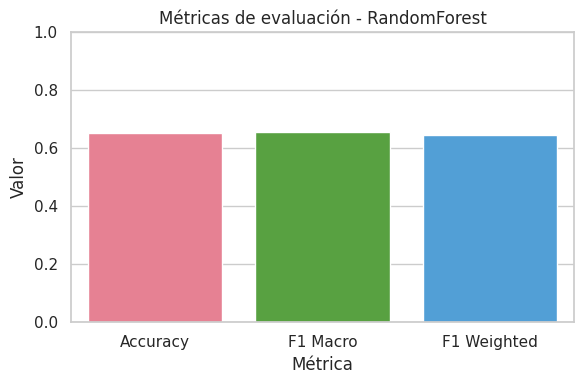

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Cargar dataset
file = "df_modelo_final.csv"
df = pd.read_csv(file)

# Codificar Dxrs
dxr_cols = [f"Dxr {i}" for i in range(1, 11)]
for col in dxr_cols:
    df[col] = df[col].astype("category").cat.codes

# Codificar categóricas básicas
df["Sexo"] = df["Sexo"].astype("category").cat.codes
df["Grupo Edad"] = df["Grupo Edad"].astype("category").cat.codes
df["Tipo de ingreso"] = df["Tipo de ingreso"].astype("category").cat.codes

# Codificar target
df["GRD -Código"] = df["GRD -Código"].astype("category")
y = df["GRD -Código"].cat.codes
grds_map = dict(enumerate(df["GRD -Código"].cat.categories))

# Separar columnas binarias Tiene_
cols_binarias = [col for col in df.columns if col.startswith("Tiene_")]

# Crear n_comorbilidades para modelo 3
df["n_comorbilidades"] = df[cols_binarias].sum(axis=1)

# Usamos Modelo 3 como base de variables
X = df[["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias + ["n_comorbilidades"]]
y = df["GRD -Código"].cat.codes

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Modelo con más árboles, más profundidad, etc.
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,  # sin límite de profundidad
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"F1 Macro: {f1_macro}")
print(f"F1 Weighted: {f1_weighted}")
print(classification_report(y_test, y_pred))

resultados = pd.DataFrame([{
    "Métrica": "Accuracy",
    "Valor": acc
}, {
    "Métrica": "F1 Macro",
    "Valor": f1_macro
}, {
    "Métrica": "F1 Weighted",
    "Valor": f1_weighted
}])

# Graficamos con cada barra de color distinto
plt.figure(figsize=(6, 4))
sns.barplot(data=resultados, x='Métrica', y='Valor', palette='husl')
plt.title("Métricas de evaluación - RandomForest")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.ylim(0, 1)  # rango de 0 a 1
plt.tight_layout()
plt.show()

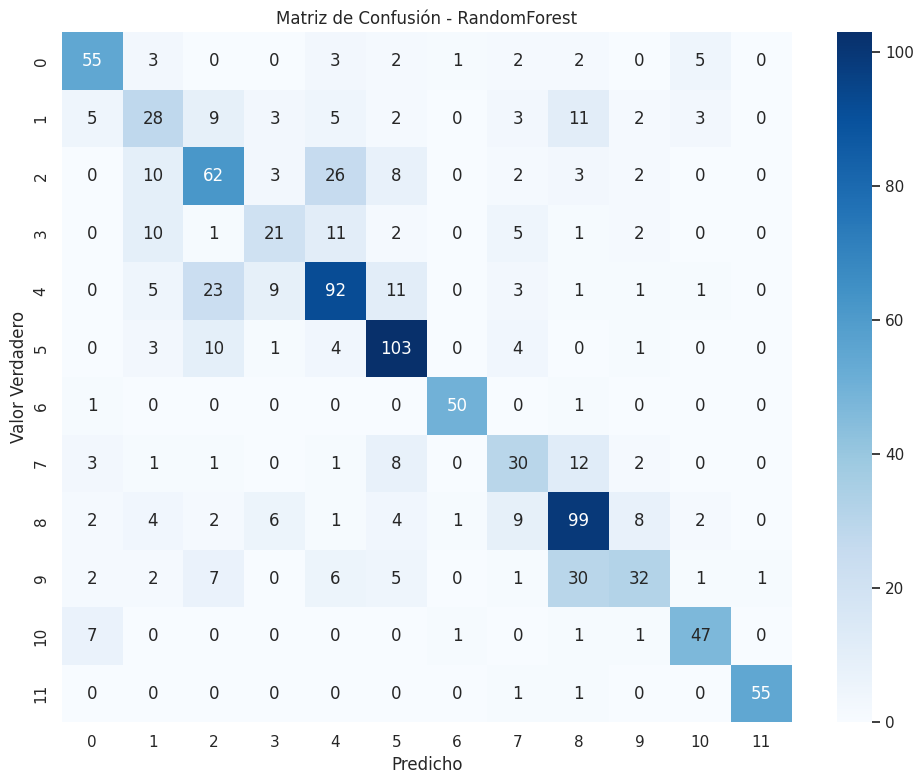

In [29]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RandomForest")
plt.xlabel("Predicho")
plt.ylabel("Valor Verdadero")
plt.tight_layout()
plt.show()


In [20]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 36.6 MB/s eta 0:00:00


In [21]:
import optuna

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 0.0, 1.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "loss_function": "MultiClass",
        "verbose": 0,
        "random_seed": 42
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, cat_features=mejor_cat_features)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average="weighted")

study = optuna.create_study(direction="maximize", study_name="catboost_opt")
study.optimize(objective, n_trials=50, timeout=600)  # puedes aumentar los trials o timeout

# Entrenar modelo final con mejores hiperparámetros
best_model = CatBoostClassifier(**study.best_params, loss_function="MultiClass", verbose=0, random_seed=42)
best_model.fit(X_train, y_train, cat_features=mejor_cat_features)

# Evaluación final
y_pred = best_model.predict(X_test)
print("\n[Optuna] Resultados modelo optimizado:")
print("Best params:", study.best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Macro:", f1_score(y_test, y_pred, average="macro"))
print("F1 Weighted:", f1_score(y_test, y_pred, average="weighted"))

# Guardar modelo final
joblib.dump(best_model, "mejor_modelo_catboost_optuna.joblib")


[I 2025-06-15 18:28:25,814] A new study created in memory with name: catboost_opt
[I 2025-06-15 18:33:16,418] Trial 0 finished with value: 0.6672185231257335 and parameters: {'iterations': 504, 'depth': 9, 'learning_rate': 0.030556439429162963, 'l2_leaf_reg': 9.919294778222579, 'random_strength': 0.2603865715538096, 'bagging_temperature': 0.29493510738189754, 'border_count': 176}. Best is trial 0 with value: 0.6672185231257335.
[I 2025-06-15 18:33:34,869] Trial 1 finished with value: 0.5746889789056859 and parameters: {'iterations': 235, 'depth': 4, 'learning_rate': 0.015926482231725516, 'l2_leaf_reg': 9.931684313813758, 'random_strength': 0.7541418771876335, 'bagging_temperature': 0.22926906901221378, 'border_count': 221}. Best is trial 0 with value: 0.6672185231257335.
[I 2025-06-15 18:35:40,920] Trial 2 finished with value: 0.6641136147572246 and parameters: {'iterations': 234, 'depth': 9, 'learning_rate': 0.027235766877200734, 'l2_leaf_reg': 1.5332089689862276, 'random_strength': 0


[Optuna] Resultados modelo optimizado:
Best params: {'iterations': 869, 'depth': 7, 'learning_rate': 0.19494967936561128, 'l2_leaf_reg': 2.9283893228774245, 'random_strength': 0.5466133736879782, 'bagging_temperature': 0.21037044979993658, 'border_count': 93}
Accuracy: 0.6866537717601547
F1 Macro: 0.6805540369065622
F1 Weighted: 0.6851094868397118


['mejor_modelo_catboost_optuna.joblib']

In [22]:
# archivo: optimizar_catboost_optuna.py

import pandas as pd
import numpy as np
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from catboost import CatBoostClassifier

# Cargar dataset
file = "df_modelo_final.csv"
df = pd.read_csv(file)

# Preprocesamiento
dxr_cols = [f"Dxr {i}" for i in range(1, 11)]
for col in dxr_cols:
    df[col] = df[col].astype(str).fillna("missing")

categorical_features = ["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols
cols_binarias = [col for col in df.columns if col.startswith("Tiene_")]
df["n_comorbilidades"] = df[cols_binarias].sum(axis=1)

# Target
df["GRD -Código"] = df["GRD -Código"].astype("category")
y = df["GRD -Código"].cat.codes
grds_map = dict(enumerate(df["GRD -Código"].cat.categories))

# Features (usar mejor combinación conocida)
X = df[["Grupo Edad", "Sexo", "Tipo de ingreso"] + dxr_cols + cols_binarias + ["n_comorbilidades"]]
cat_features_indices = [X.columns.get_loc(c) for c in categorical_features if c in X.columns]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Optuna objective

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 0.0, 1.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "loss_function": "MultiClass",
        "verbose": 0,
        "random_seed": 42
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, cat_features=cat_features_indices)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average="weighted")

# Optimizar
study = optuna.create_study(direction="maximize", study_name="catboost_opt")
study.optimize(objective, n_trials=50, timeout=600)

# Resultados
print("\nMejores hiperparámetros:")
print(study.best_params)

# Modelo final
best_model = CatBoostClassifier(**study.best_params, loss_function="MultiClass", verbose=0, random_seed=42)
best_model.fit(X_train, y_train, cat_features=cat_features_indices)
y_pred = best_model.predict(X_test)

print("\nEvaluación final:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Macro:", f1_score(y_test, y_pred, average="macro"))
print("F1 Weighted:", f1_score(y_test, y_pred, average="weighted"))

# Guardar
joblib.dump(best_model, "mejor_modelo_catboost_optuna.joblib")
joblib.dump(X.columns.tolist(), "mejores_features.joblib")
joblib.dump(grds_map, "mapa_grd.joblib")


[I 2025-06-15 18:43:31,601] A new study created in memory with name: catboost_opt
[I 2025-06-15 18:49:23,011] Trial 0 finished with value: 0.6802197055862815 and parameters: {'iterations': 817, 'depth': 8, 'learning_rate': 0.13067693926594165, 'l2_leaf_reg': 1.108208740126591, 'random_strength': 0.7150142161929824, 'bagging_temperature': 0.5225907709937093, 'border_count': 110}. Best is trial 0 with value: 0.6802197055862815.
[I 2025-06-15 18:50:37,028] Trial 1 finished with value: 0.6728813865576113 and parameters: {'iterations': 874, 'depth': 4, 'learning_rate': 0.029287172276158336, 'l2_leaf_reg': 5.028444133432562, 'random_strength': 0.039394946086428906, 'bagging_temperature': 0.645644730639794, 'border_count': 255}. Best is trial 0 with value: 0.6802197055862815.
[I 2025-06-15 18:51:12,982] Trial 2 finished with value: 0.6563315408388657 and parameters: {'iterations': 230, 'depth': 6, 'learning_rate': 0.05043453726387915, 'l2_leaf_reg': 8.363586187976544, 'random_strength': 0.316


Mejores hiperparámetros:
{'iterations': 526, 'depth': 7, 'learning_rate': 0.1438513307538162, 'l2_leaf_reg': 4.821674606836275, 'random_strength': 0.8782574943377576, 'bagging_temperature': 0.20162857769416287, 'border_count': 45}

Evaluación final:
Accuracy: 0.683752417794971
F1 Macro: 0.6855986523678362
F1 Weighted: 0.6818262121264965


['mapa_grd.joblib']

En los datos de prueba, la varianza es alta.

# Conclusiones
Tras entrenar, optimizar y comparar diferentes modelos de clasificación multiclase (RandomForest, XGBoost y CatBoost) en el conjunto de datos utilizado, podemos destacar lo siguiente:

CatBoost fue el modelo que alcanzó el mejor rendimiento en comparación con los otros métodos. Esto se evidencia tanto en Accuracy, como en F1 Macro y F1 Weighted:

|                                      | Accuracy   | F1 Macro   | F1 Weighted |
| ------------------------------------ | ---------- | ---------- | ----------- |
| **CatBoost (Model 2)**               | **0.6992** | **0.6994** | **0.6966**  |
| **XGBoost (Model 3 + Optuna)**       | 0.6867     | 0.6806     | 0.6851      |
| **CatBoost (optimized with Optuna)** | 0.6867     | 0.6805     | 0.6851      |
| **RandomForest (baseline)**          | 0.6518     | 0.6565     | 0.6457      |

Por tanto, el modelo CatBoost sin optimización de parámetros (Model 2) alcanzó el mayor Accuracy (69.92%), junto con el F1 Macro más alto (69.94%) y el F1 Weighted más robusto (69.66%) en comparación con el resto de modelos.

Por otro lado, aplicar Optuna tanto en XGBoost como en CatBoost ayudó a elevar ligeramente el rendimiento en comparación con el modelo base, pero no alcanzó a superar al modelo 2 de CatBoost, que así continúa como el más destacado.